# **Problem Statement**

## Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

## Objective

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description

The data provided is a transformed version of the original data which was collected using sensors.

- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.

Both the datasets consist of 40 predictor variables and 1 target variable.

# **Installing and Importing the necessary libraries**

In [ ]:
# Installing the libraries with the specified version
!pip install --no-deps tensorflow==2.18.0 scikit-learn==1.3.2 matplotlib===3.8.3 seaborn==0.13.2 numpy==1.26.4 pandas==2.2.2 -q --user --no-warn-script-location

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 22.1 MB/s eta 0:00:00


In [1]:
# Library for data manipulation and analysis.
#reading and manipulating data
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for imputing
from sklearn.impute import SimpleImputer

#metrics
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

#splitting datasets
from sklearn.model_selection import train_test_split

#neural network items
import time
import keras
from tensorflow.keras import optimizers
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# To supress warnings
import warnings

warnings.filterwarnings("ignore")


In [2]:
#a global random seed was set to 812 to ensure reproducibility
keras.utils.set_random_seed(812)

tf.config.experimental.enable_op_determinism()

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

# **Loading the Data**

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/renewind/Train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/renewind/Test.csv')


# **Data Overview**

In [ ]:
print('df.head for training data')
df.head()



df.head for training data


V1        V2        V3        V4        V5        V6        V7  \
0 -4.464606 -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870   
1  3.365912  3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600   
2 -3.831843 -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941   
3  1.618098  1.888342  7.046143 -1.147285  0.083080 -1.529780  0.207309   
4 -0.111440  3.872488 -3.758361 -2.982897  3.792714  0.544960  0.205433   

         V8        V9       V10  ...       V32       V33        V34       V35  \
0  0.050714 -1.522351  3.761892  ...  3.059700 -1.690440   2.846296  2.235198   
1 -4.332135  0.565695 -0.101080  ... -1.795474  3.032780  -2.467514  1.894599   
2 -3.173204 -2.081860  5.392621  ... -0.257101  0.803550   4.086219  2.292138   
3 -2.493629  0.344926  2.118578  ... -3.584425 -2.577474   1.363769  0.622714   
4  4.848994 -1.854920 -6.220023  ...  8.265896  6.629213 -10.068689  1.222987   

        V36       V37       V38       V39       V40  Target  
0  6.667486  0.443809 -2.369169  2.950578 -3.480324       0  
1 -2.297780 -1.731048  5.908837 -0.386345  0.616242       0  
2  5.360850  0.351993  2.940021  3.839160 -4.309402       0  
3  5.550100 -1.526796  0.138853  3.101430 -1.277378       0  
4 -3.229763  1.686909 -2.163896 -3.644622  6.510338       0  

[5 rows x 41 columns]

In [ ]:
print('df.head for test data')
df_test.head()

df.head for test data


V1        V2        V3        V4        V5        V6        V7  \
0 -0.613489 -3.819640  2.202302  1.300420 -1.184929 -4.495964 -1.835817   
1  0.389608 -0.512341  0.527053 -2.576776 -1.016766  2.235112 -0.441301   
2 -0.874861 -0.640632  4.084202 -1.590454  0.525855 -1.957592 -0.695367   
3  0.238384  1.458607  4.014528  2.534478  1.196987 -3.117330 -0.924035   
4  5.828225  2.768260 -1.234530  2.809264 -1.641648 -1.406698  0.568643   

         V8        V9       V10  ...       V32       V33       V34       V35  \
0  4.722989  1.206140 -0.341909  ...  2.291204 -5.411388  0.870073  0.574479   
1 -4.405744 -0.332869  1.966794  ... -2.474936  2.493582  0.315165  2.059288   
2  1.347309 -1.732348  0.466500  ... -1.318888 -2.997464  0.459664  0.619774   
3  0.269493  1.322436  0.702345  ...  3.517918 -3.074085 -0.284220  0.954576   
4  0.965043  1.918379 -2.774855  ...  1.773841 -1.501573 -2.226702  4.776830   

        V36       V37        V38       V39       V40  Target  
0  4.157191  1.428093 -10.511342  0.454664 -1.448363       0  
1  0.683859 -0.485452   5.128350  1.720744 -1.488235       0  
2  5.631504  1.323512  -1.752154  1.808302  1.675748       0  
3  3.029331 -1.367198  -3.412140  0.906000 -2.450889       0  
4 -6.559698 -0.805551  -0.276007 -3.858207 -0.537694       0  

[5 rows x 41 columns]

In [ ]:
print ('df.tail for training data')
df.tail()

df.tail for training data


V1         V2        V3        V4        V5        V6        V7  \
19995 -2.071318  -1.088279 -0.796174 -3.011720 -2.287540  2.807310  0.481428   
19996  2.890264   2.483069  5.643919  0.937053 -1.380870  0.412051 -1.593386   
19997 -3.896979  -3.942407 -0.351364 -2.417462  1.107546 -1.527623 -3.519882   
19998 -3.187322 -10.051662  5.695955 -4.370053 -5.354758 -1.873044 -3.947210   
19999 -2.686903   1.961187  6.137088  2.600133  2.657241 -4.290882 -2.344267   

             V8        V9       V10  ...       V32       V33       V34  \
19995  0.105171 -0.586599 -2.899398  ... -8.273996  5.745013  0.589014   
19996 -5.762498  2.150096  0.272302  ... -4.159092  1.181466 -0.742412   
19997  2.054792 -0.233996 -0.357687  ...  7.112162  1.476080 -3.953710   
19998  0.679420 -2.389254  5.456756  ...  0.402812  3.163661  3.752095   
19999  0.974004 -1.027462  0.497421  ...  6.620811 -1.988786 -1.348901   

            V35       V36       V37       V38       V39       V40  Target  
19995 -0.649988 -3.043174  2.216461  0.608723  0.178193  2.927755       1  
19996  5.368979 -0.693028 -1.668971  3.659954  0.819863 -1.987265       0  
19997  1.855555  5.029209  2.082588 -6.409304  1.477138 -0.874148       0  
19998  8.529894  8.450626  0.203958 -7.129918  4.249394 -6.112267       0  
19999  3.951801  5.449706 -0.455411 -2.202056  1.678229 -1.974413       0  

[5 rows x 41 columns]

In [ ]:
print ('df_test.tail for test data')
df_test.tail()

df_test.tail for test data


V1        V2        V3        V4        V5        V6        V7  \
4995 -5.120451  1.634804  1.251259  4.035944  3.291204 -2.932230 -1.328662   
4996 -5.172498  1.171653  1.579105  1.219922  2.529627 -0.668648 -2.618321   
4997 -1.114136 -0.403576 -1.764875 -5.879475  3.571558  3.710802 -2.482952   
4998 -1.703241  0.614650  6.220503 -0.104132  0.955916 -3.278706 -1.633855   
4999 -0.603701  0.959550 -0.720995  8.229574 -1.815610 -2.275547 -2.574524   

            V8        V9       V10  ...       V32       V33        V34  \
4995  1.754066 -2.984586  1.248633  ...  9.979118  0.063438   0.217281   
4996 -2.000545  0.633791 -0.578938  ...  4.423900  2.603811  -2.152170   
4997 -0.307614 -0.921945 -2.999141  ...  3.791778  7.481506 -10.061396   
4998 -0.103936  1.388152 -1.065622  ... -4.100352 -5.949325   0.550372   
4999 -1.041479  4.129645 -2.731288  ...  2.369776 -1.062408   0.790772   

           V35       V36       V37       V38       V39       V40  Target  
4995  3.036388  2.109323 -0.557433  1.938718  0.512674 -2.694194       0  
4996  0.917401  2.156586  0.466963  0.470120  2.196756 -2.376515       0  
4997 -0.387166  1.848509  1.818248 -1.245633 -1.260876  7.474682       0  
4998 -1.573640  6.823936  2.139307 -4.036164  3.436051  0.579249       0  
4999  4.951955 -7.440825 -0.069506 -0.918083 -2.291154 -5.362891       0  

[5 rows x 41 columns]

In [ ]:
print('Training data shape')
df.shape

Training data shape


(20000, 41)

In [ ]:
print('Test data shape')
df_test.shape


Test data shape


(5000, 41)

*   Training data has 20000 rows and 41 columns
*   Test data has 5000 rows and 41 columns




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

* No anamolies found in train and test data
* both have 40 rows with non null values and 39 columns with float and target variable as int

In [ ]:
# let's check for missing values in the data
df.isnull().sum() ##  check missing entries in the train data

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [ ]:
df_test.isnull().sum() ##  check missing entries in the test data

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

In [ ]:
df.isnull().sum() ##  check missing entries in the train data

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [ ]:
df_test.isnull().sum()##  check missing entries in the test data

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

* There are missing values for v1 and v2 in train and test set

In [ ]:
df.Target.value_counts(normalize=False)

Target
0    18890
1     1110
Name: count, dtype: int64

In [ ]:
df_test.Target.value_counts(normalize=False)

Target
0    4718
1     282
Name: count, dtype: int64

In [ ]:
df.describe().T

count      mean       std        min       25%       50%       75%  \
V1      19982.0 -0.271996  3.441625 -11.876451 -2.737146 -0.747917  1.840112   
V2      19982.0  0.440430  3.150784 -12.319951 -1.640674  0.471536  2.543967   
V3      20000.0  2.484699  3.388963 -10.708139  0.206860  2.255786  4.566165   
V4      20000.0 -0.083152  3.431595 -15.082052 -2.347660 -0.135241  2.130615   
V5      20000.0 -0.053752  2.104801  -8.603361 -1.535607 -0.101952  1.340480   
V6      20000.0 -0.995443  2.040970 -10.227147 -2.347238 -1.000515  0.380330   
V7      20000.0 -0.879325  1.761626  -7.949681 -2.030926 -0.917179  0.223695   
V8      20000.0 -0.548195  3.295756 -15.657561 -2.642665 -0.389085  1.722965   
V9      20000.0 -0.016808  2.160568  -8.596313 -1.494973 -0.067597  1.409203   
V10     20000.0 -0.012998  2.193201  -9.853957 -1.411212  0.100973  1.477045   
V11     20000.0 -1.895393  3.124322 -14.832058 -3.922404 -1.921237  0.118906   
V12     20000.0  1.604825  2.930454 -12.948007 -0.396514  1.507841  3.571454   
V13     20000.0  1.580486  2.874658 -13.228247 -0.223545  1.637185  3.459886   
V14     20000.0 -0.950632  1.789651  -7.738593 -2.170741 -0.957163  0.270677   
V15     20000.0 -2.414993  3.354974 -16.416606 -4.415322 -2.382617 -0.359052   
V16     20000.0 -2.925225  4.221717 -20.374158 -5.634240 -2.682705 -0.095046   
V17     20000.0 -0.134261  3.345462 -14.091184 -2.215611 -0.014580  2.068751   
V18     20000.0  1.189347  2.592276 -11.643994 -0.403917  0.883398  2.571770   
V19     20000.0  1.181808  3.396925 -13.491784 -1.050168  1.279061  3.493299   
V20     20000.0  0.023608  3.669477 -13.922659 -2.432953  0.033415  2.512372   
V21     20000.0 -3.611252  3.567690 -17.956231 -5.930360 -3.532888 -1.265884   
V22     20000.0  0.951835  1.651547 -10.122095 -0.118127  0.974687  2.025594   
V23     20000.0 -0.366116  4.031860 -14.866128 -3.098756 -0.262093  2.451750   
V24     20000.0  1.134389  3.912069 -16.387147 -1.468062  0.969048  3.545975   
V25     20000.0 -0.002186  2.016740  -8.228266 -1.365178  0.025050  1.397112   
V26     20000.0  1.873785  3.435137 -11.834271 -0.337863  1.950531  4.130037   
V27     20000.0 -0.612413  4.368847 -14.904939 -3.652323 -0.884894  2.189177   
V28     20000.0 -0.883218  1.917713  -9.269489 -2.171218 -0.891073  0.375884   
V29     20000.0 -0.985625  2.684365 -12.579469 -2.787443 -1.176181  0.629773   
V30     20000.0 -0.015534  3.005258 -14.796047 -1.867114  0.184346  2.036229   
V31     20000.0  0.486842  3.461384 -13.722760 -1.817772  0.490304  2.730688   
V32     20000.0  0.303799  5.500400 -19.876502 -3.420469  0.052073  3.761722   
V33     20000.0  0.049825  3.575285 -16.898353 -2.242857 -0.066249  2.255134   
V34     20000.0 -0.462702  3.183841 -17.985094 -2.136984 -0.255008  1.436935   
V35     20000.0  2.229620  2.937102 -15.349803  0.336191  2.098633  4.064358   
V36     20000.0  1.514809  3.800860 -14.833178 -0.943809  1.566526  3.983939   
V37     20000.0  0.011316  1.788165  -5.478350 -1.255819 -0.128435  1.175533   
V38     20000.0 -0.344025  3.948147 -17.375002 -2.987638 -0.316849  2.279399   
V39     20000.0  0.890653  1.753054  -6.438880 -0.272250  0.919261  2.057540   
V40     20000.0 -0.875630  3.012155 -11.023935 -2.940193 -0.920806  1.119897   
Target  20000.0  0.055500  0.228959   0.000000  0.000000  0.000000  0.000000   

              max  
V1      15.493002  
V2      13.089269  
V3      17.090919  
V4      13.236381  
V5       8.133797  
V6       6.975847  
V7       8.006091  
V8      11.679495  
V9       8.137580  
V10      8.108472  
V11     11.826433  
V12     15.080698  
V13     15.419616  
V14      5.670664  
V15     12.246455  
V16     13.583212  
V17     16.756432  
V18     13.179863  
V19     13.237742  
V20     16.052339  
V21     13.840473  
V22      7.409856  
V23     14.458734  
V24     17.163291  
V25      8.223389  
V26     16.836410  
V27     17.560404  
V28      6.527643  
V29     10.722055  
V30     12.505812  
V31     17.255090  
V32     2

* All variables expect for Target have negative values. We can consider them true values as it's information about the sensors.
* Target column has a mean close to 0, the third quartile is also 0. That means we We can assume that most of the sensors are not failing.
* V15, V16, and V21 have negative values up to the 3rd quartile.
* V32 has the highest standard deviation with 5.5.
* V22 has the lowest standard deviation at 1.652.
* The mean and median of most variables are close together, we can assume a symmetrical distribution across the variables.


# **Exploratory Data Analysis**

In [22]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

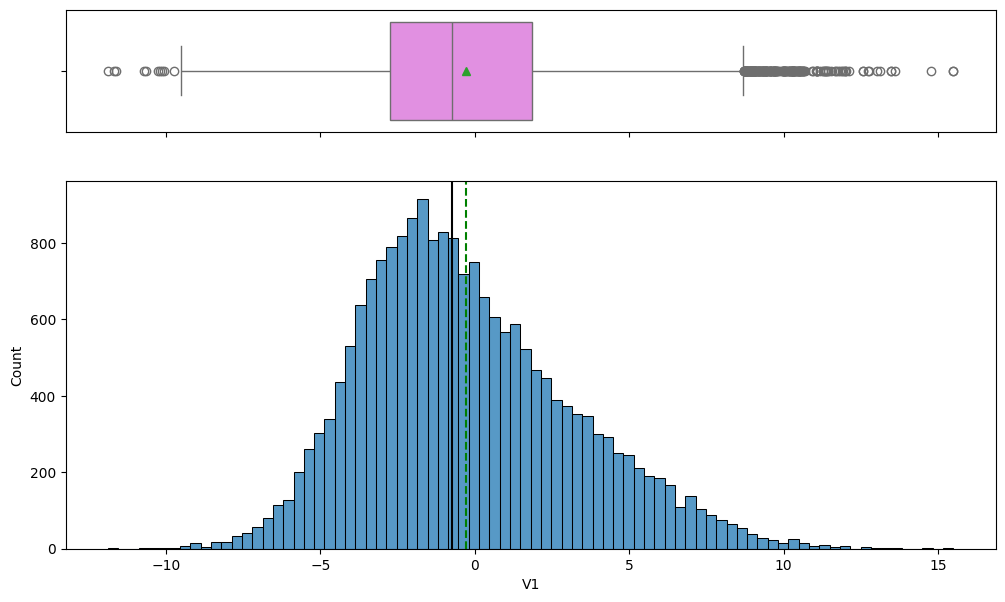

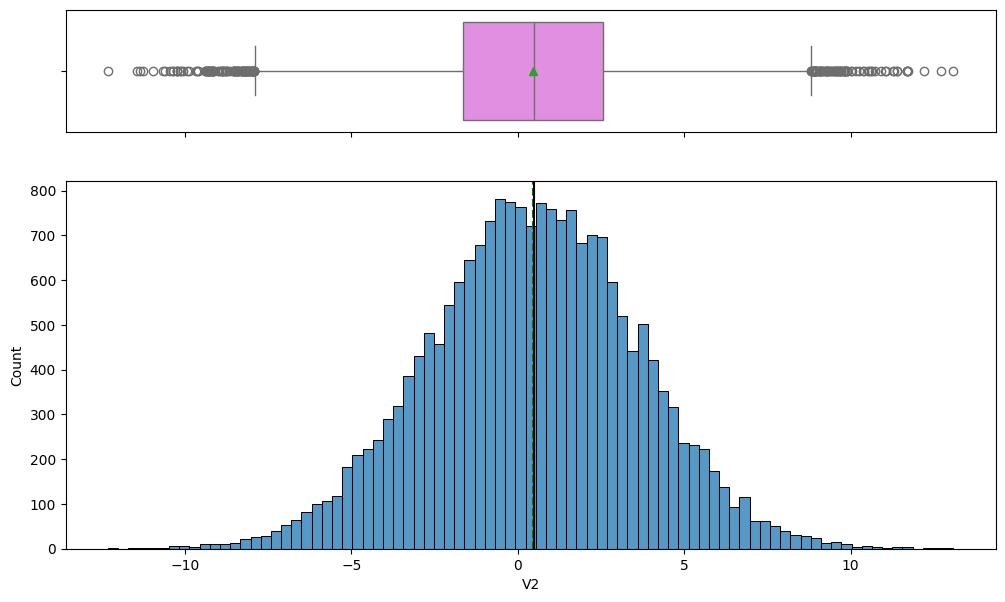

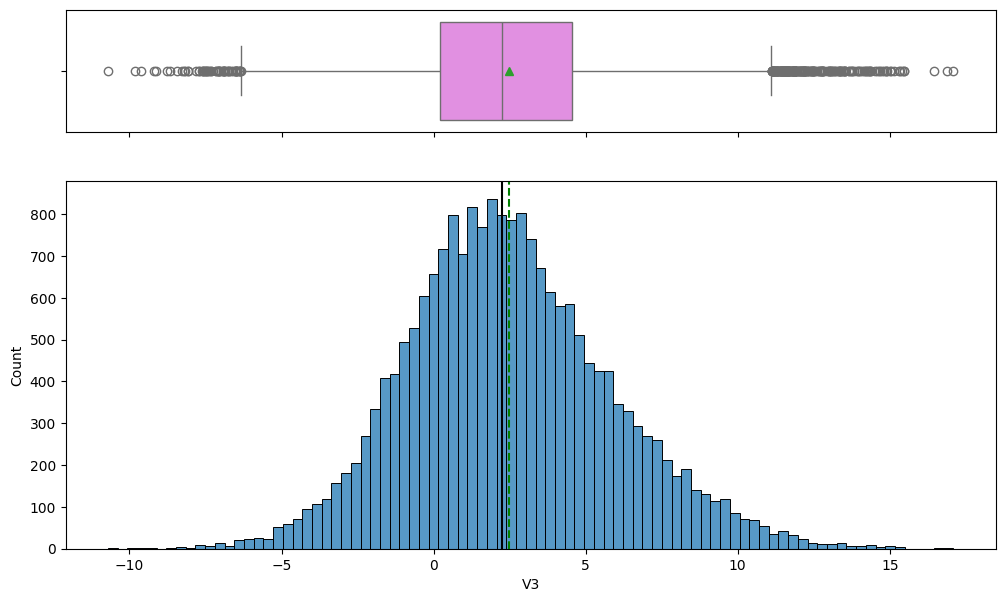

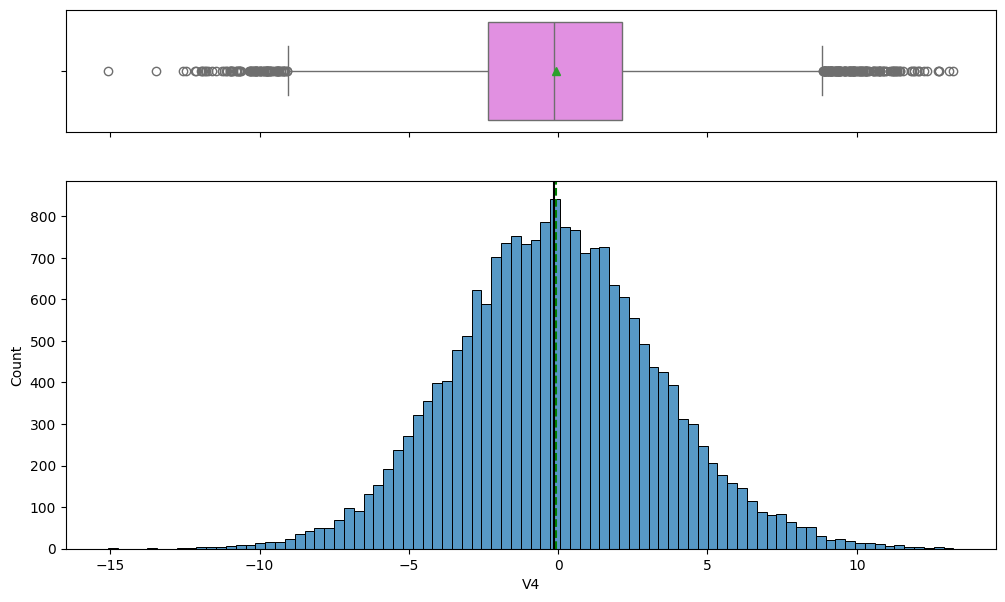

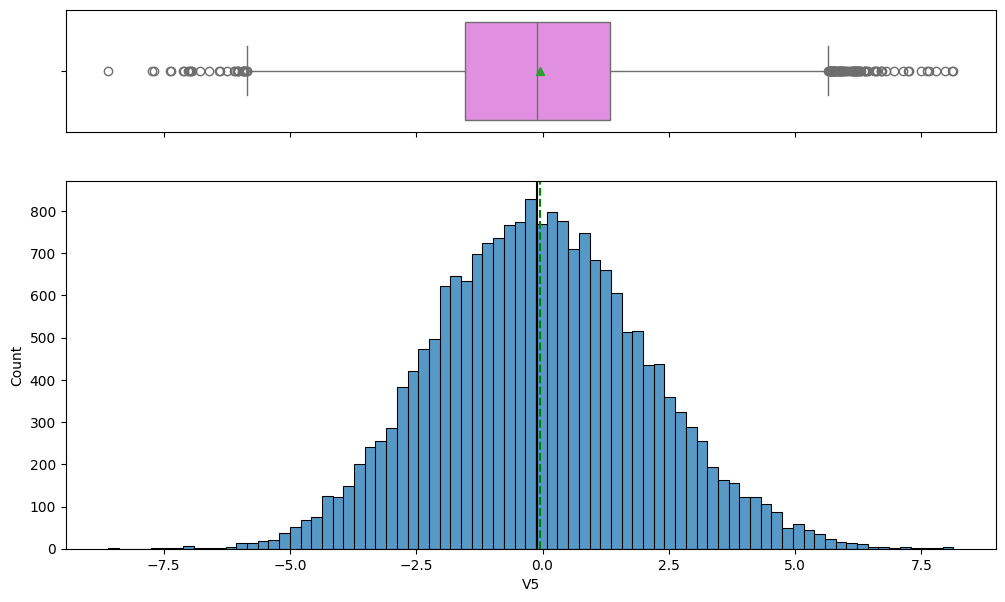

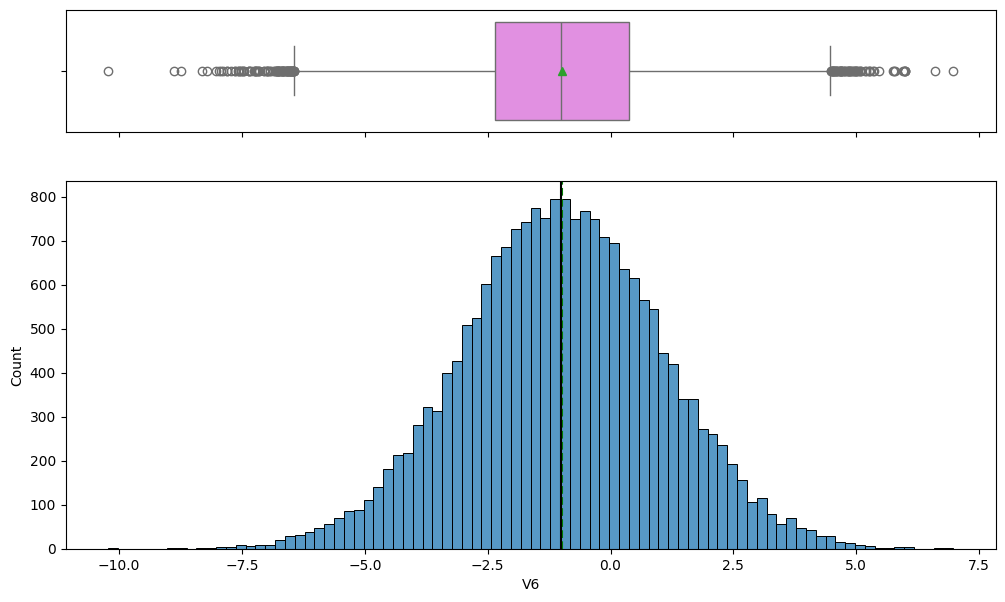

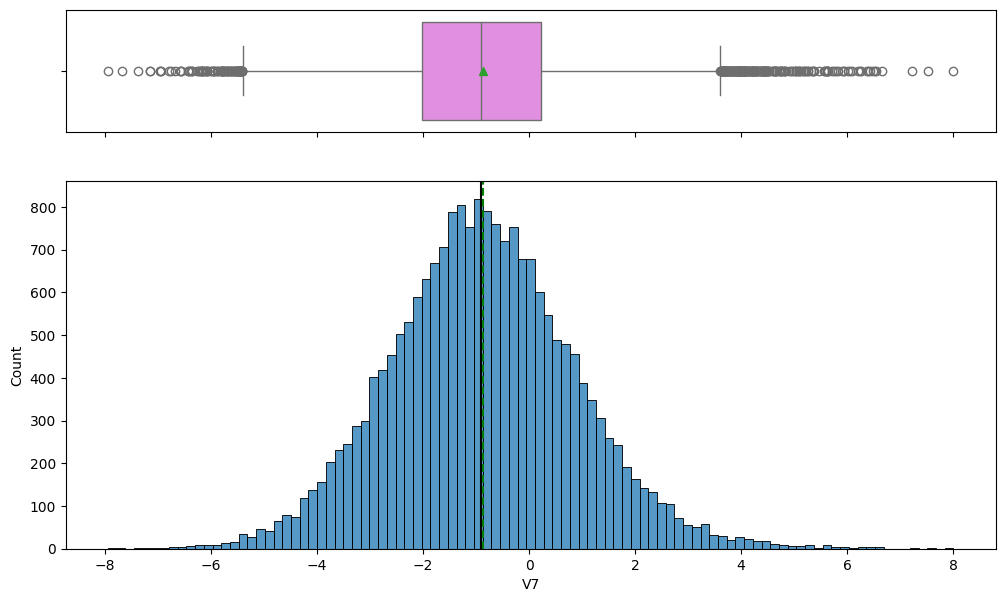

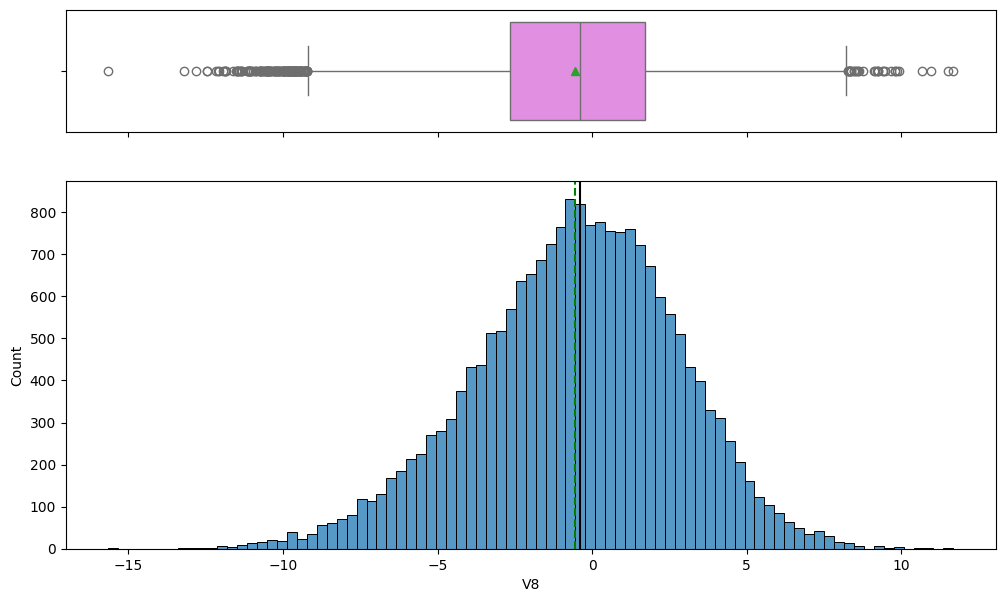

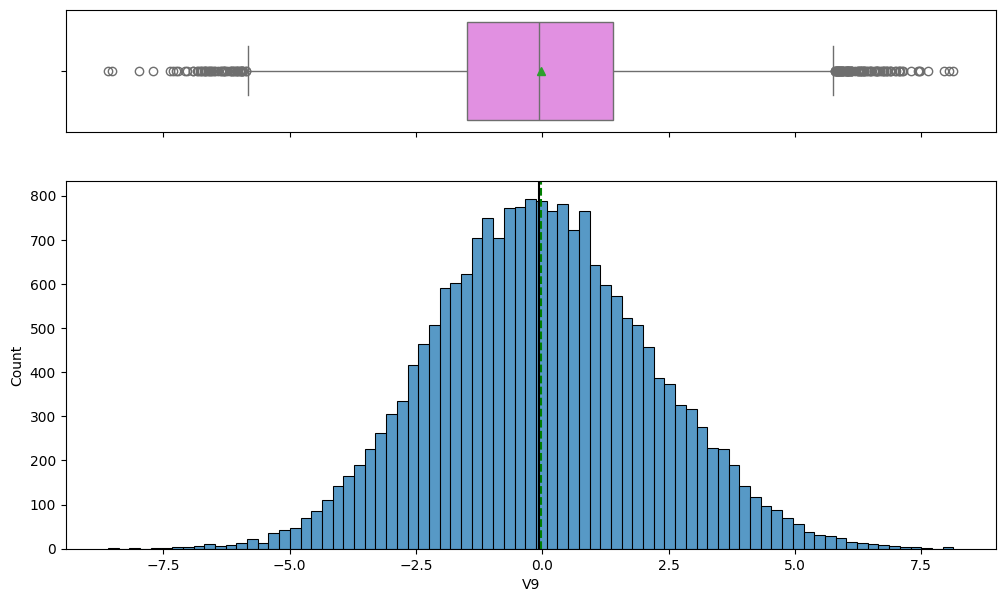

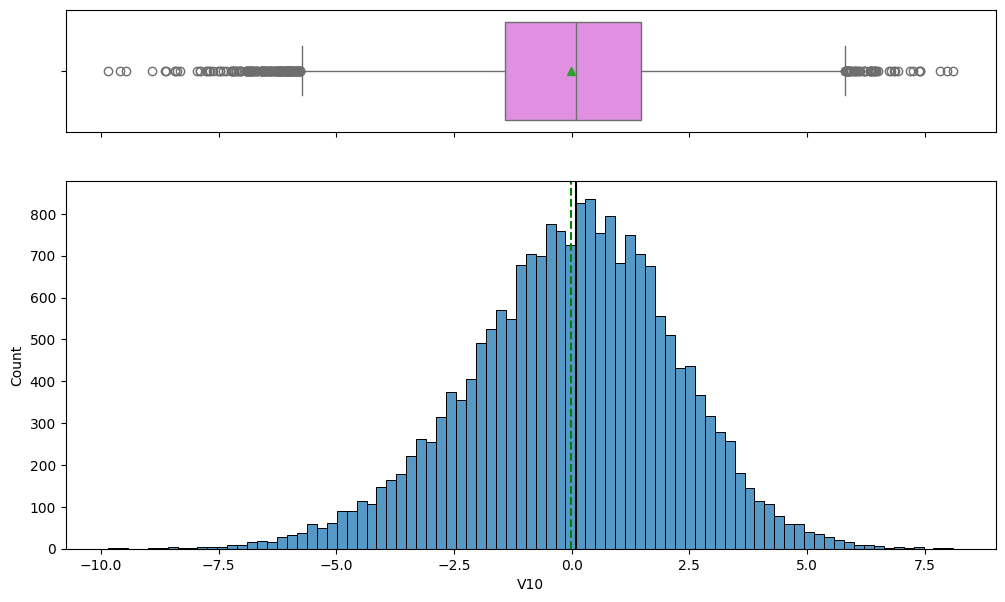

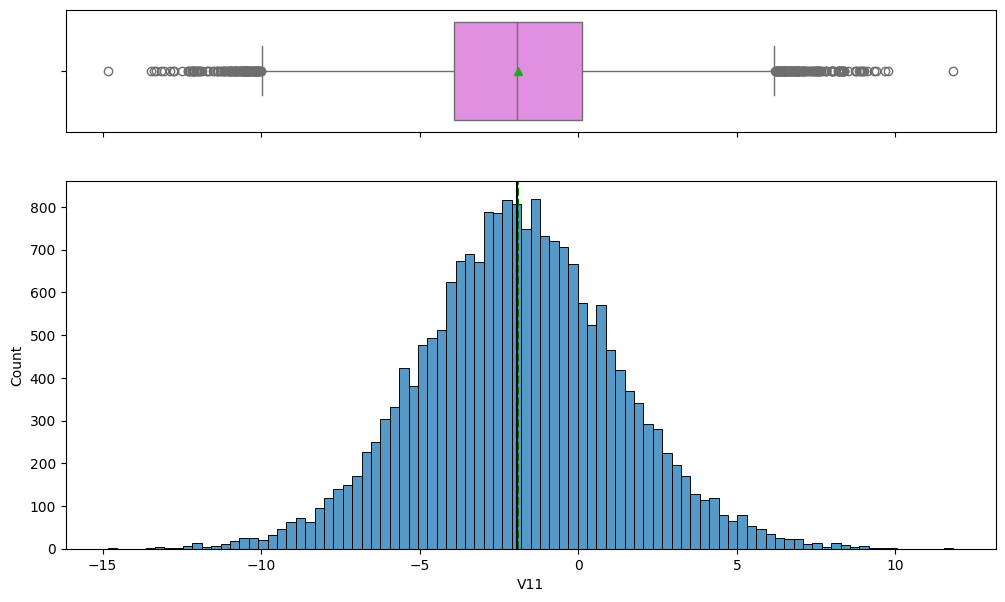

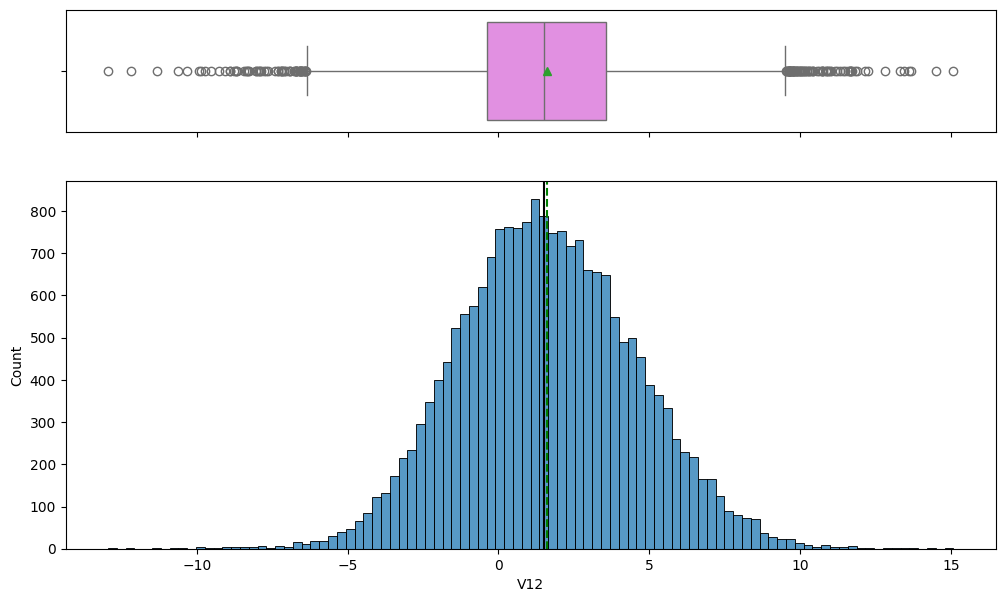

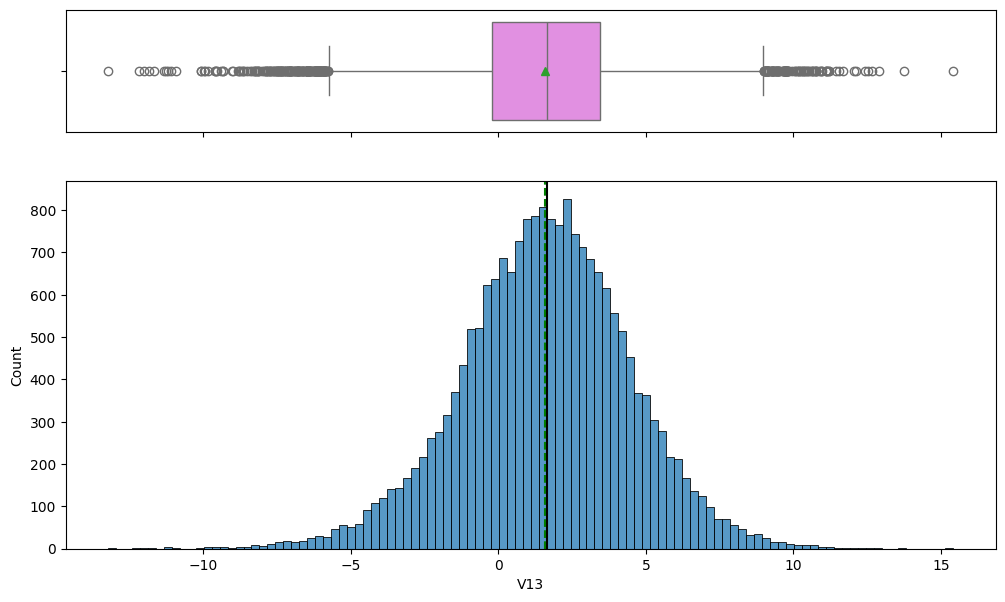

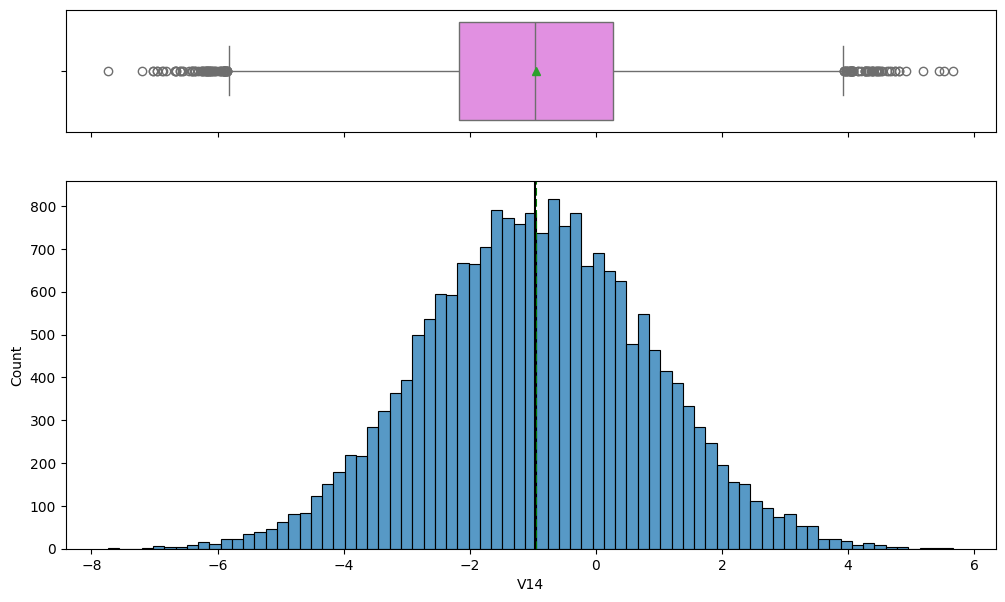

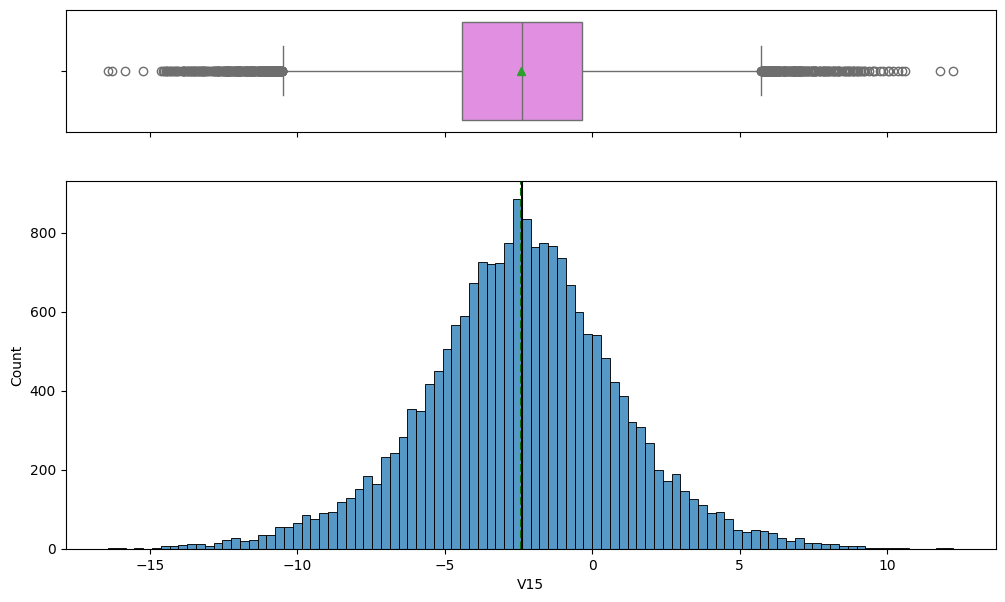

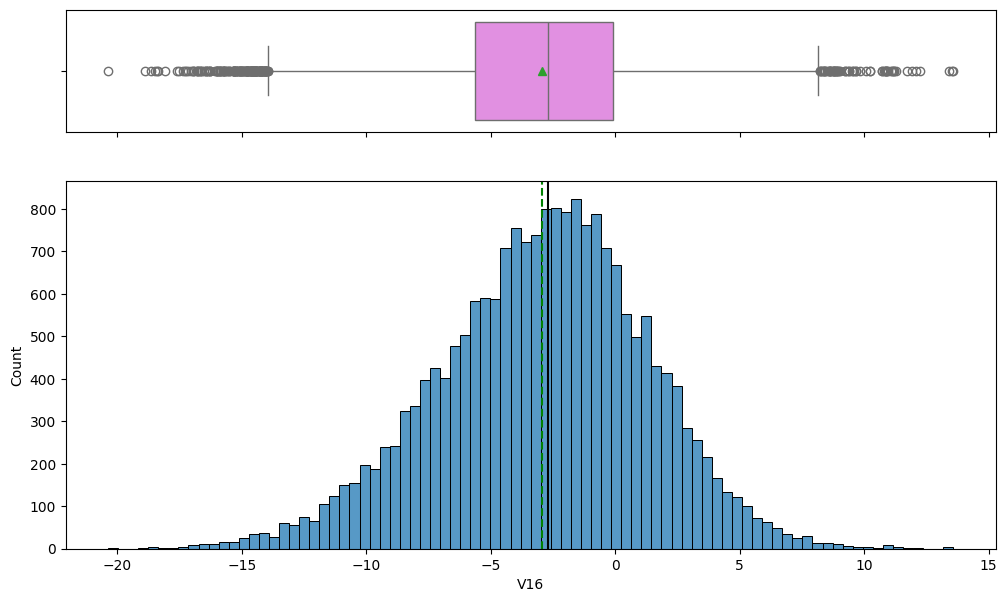

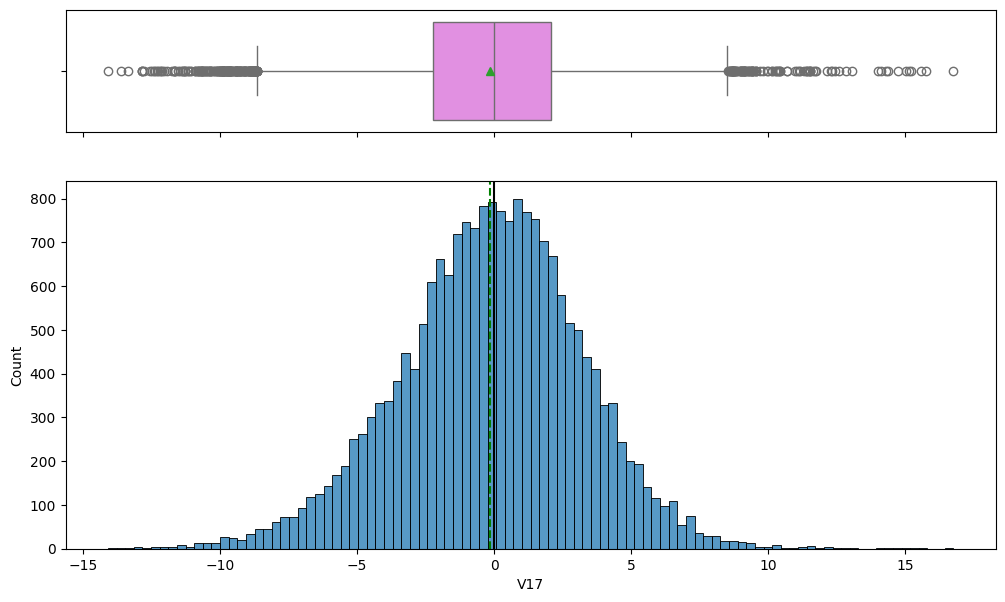

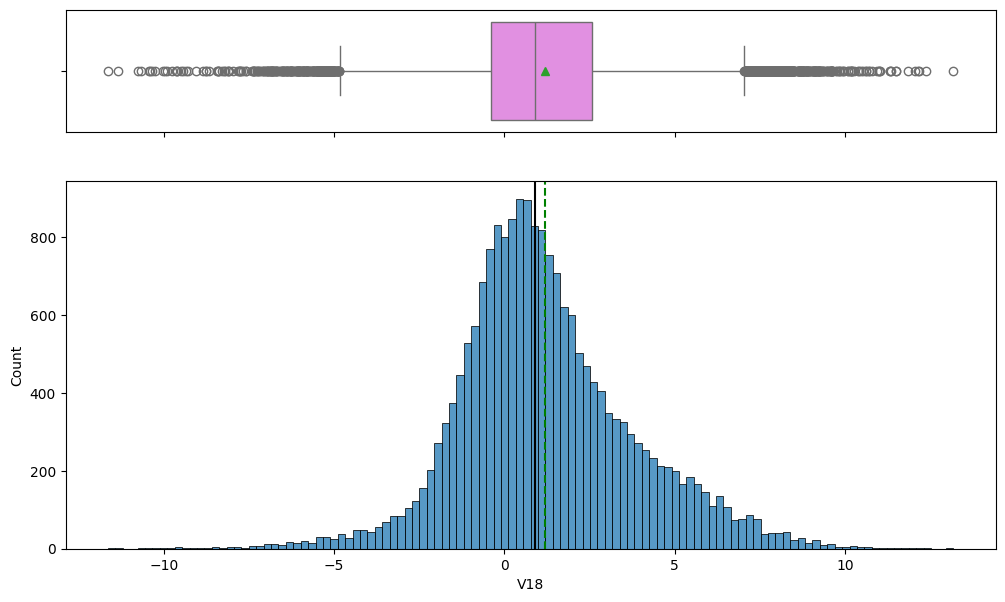

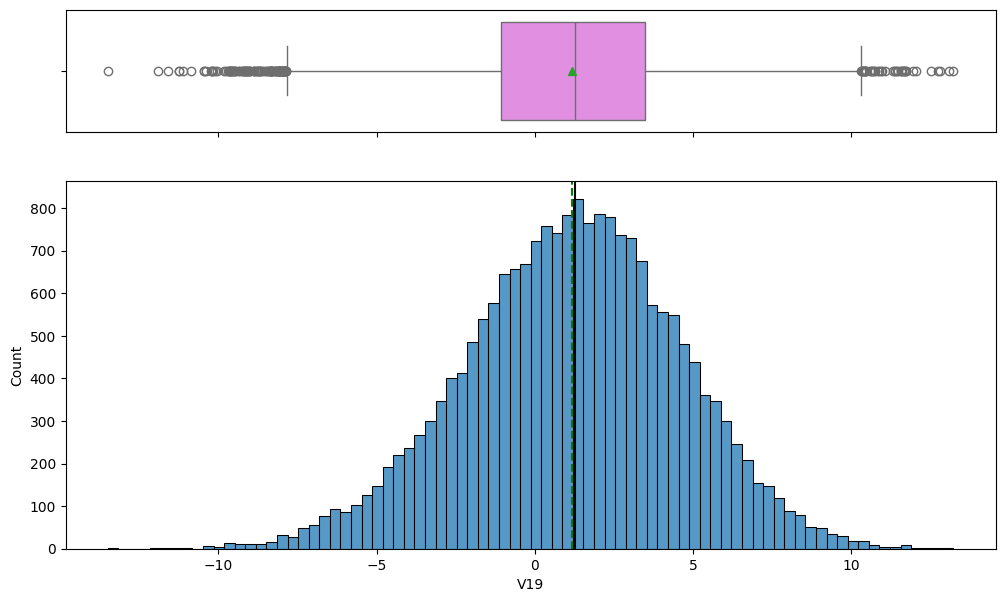

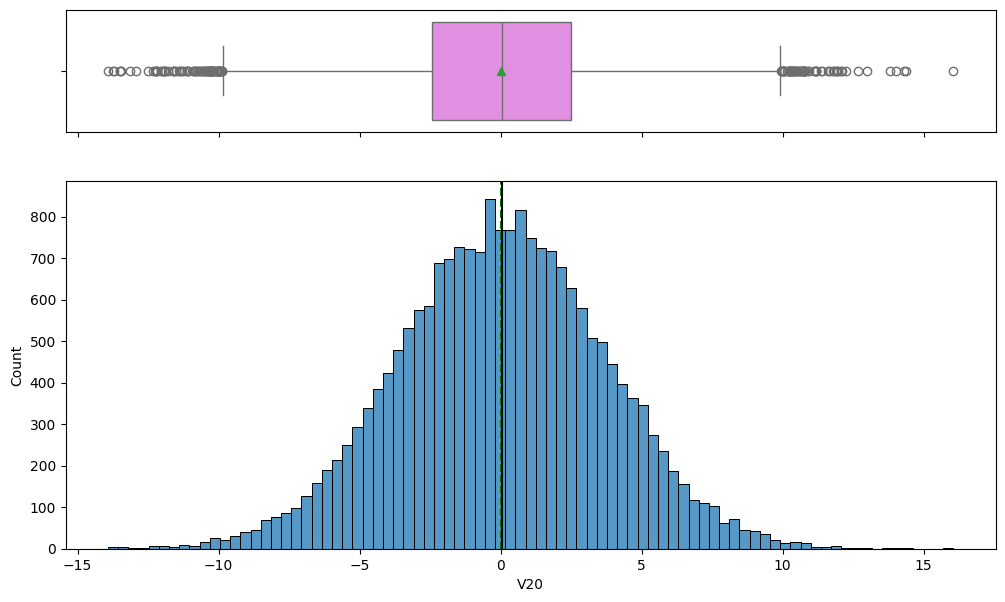

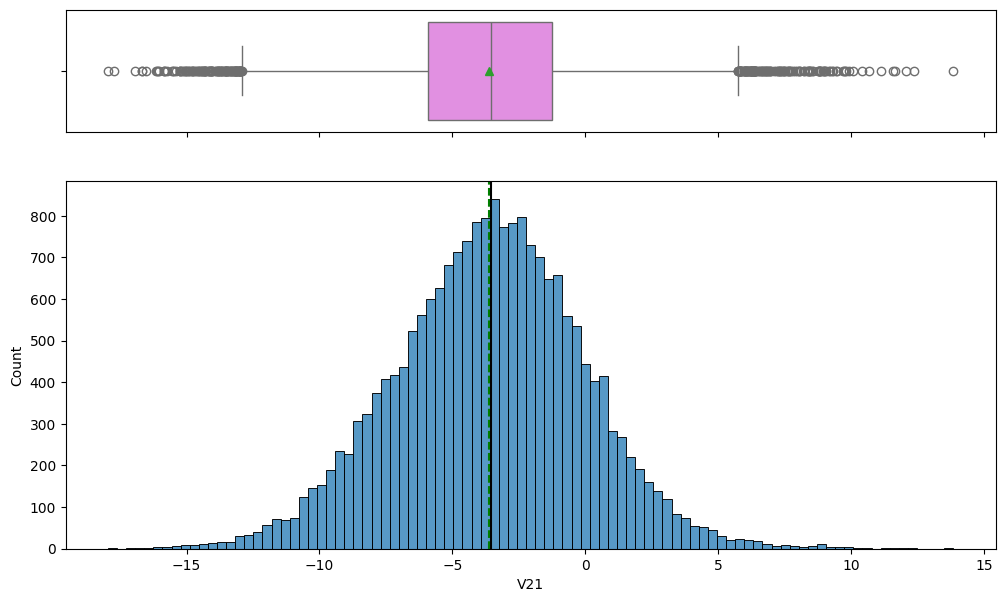

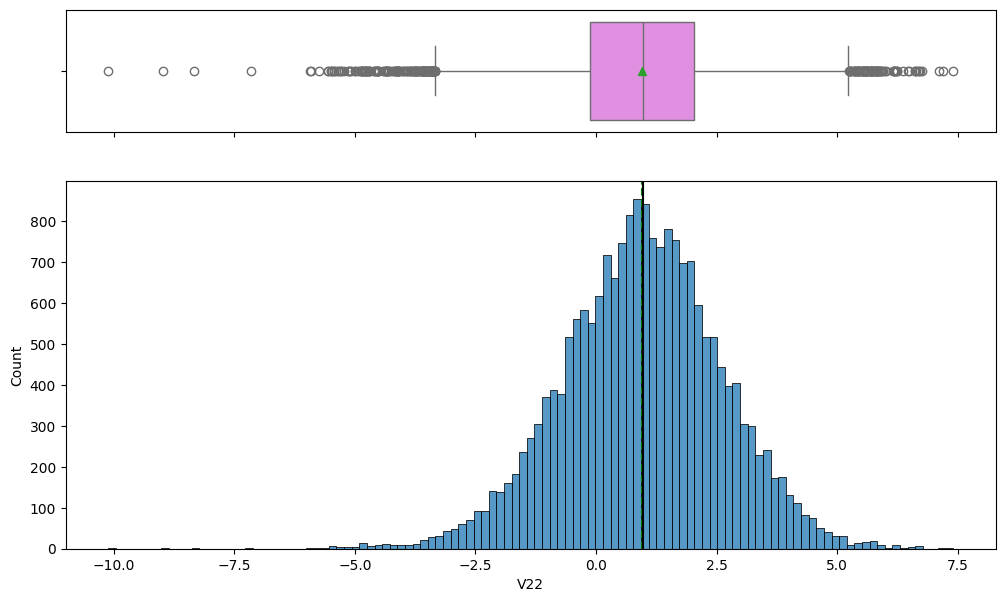

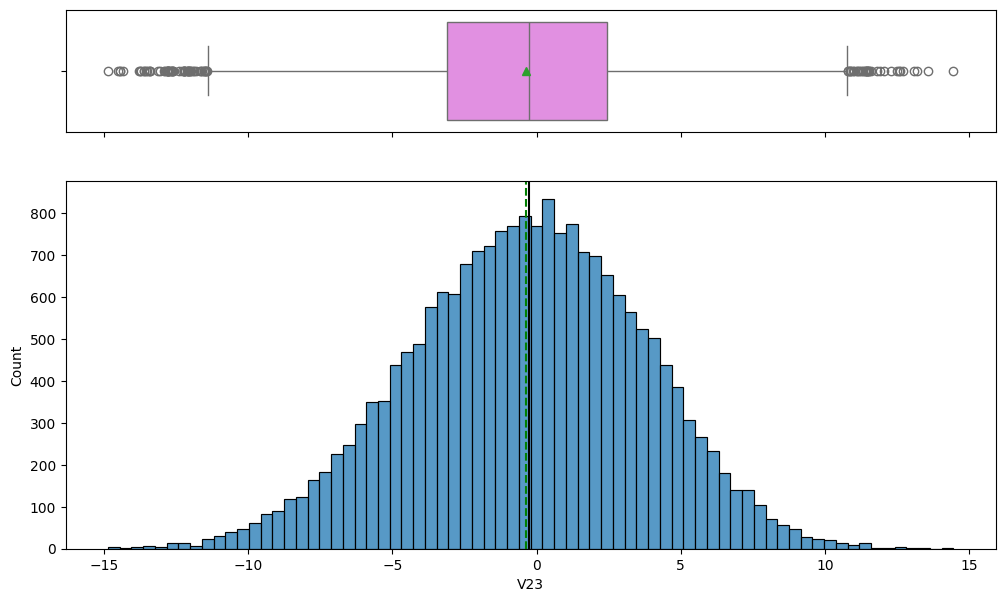

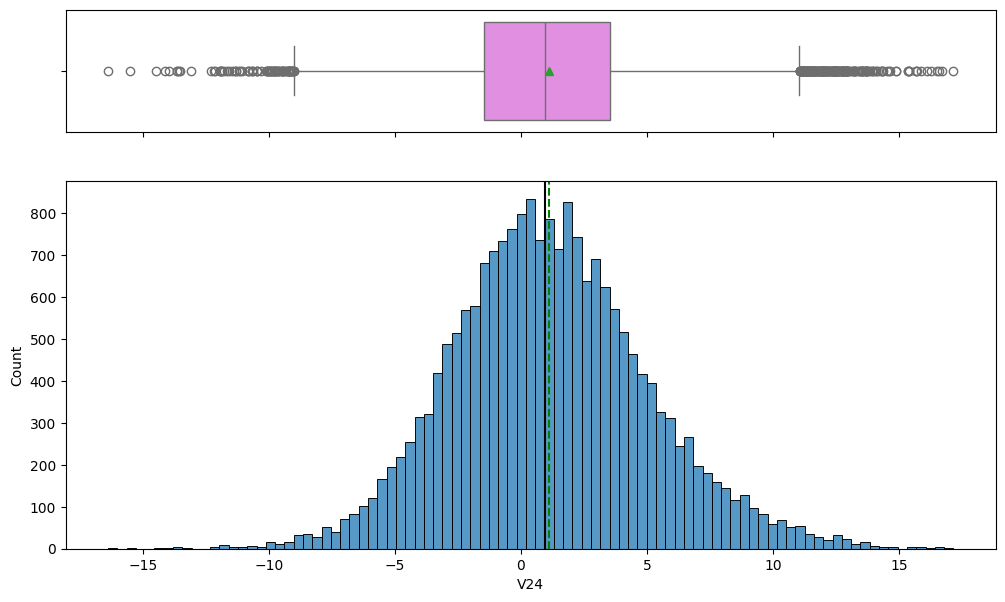

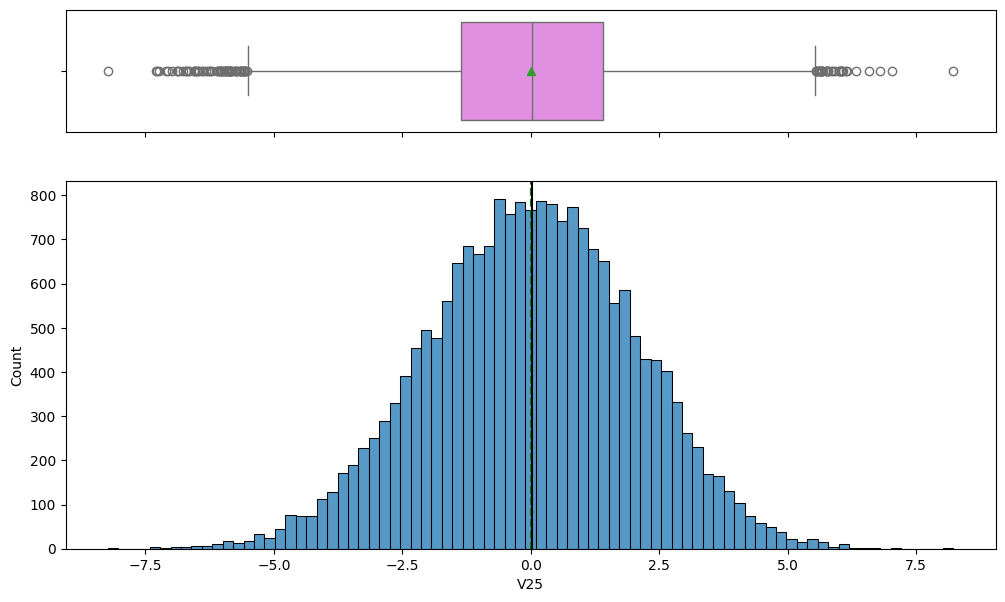

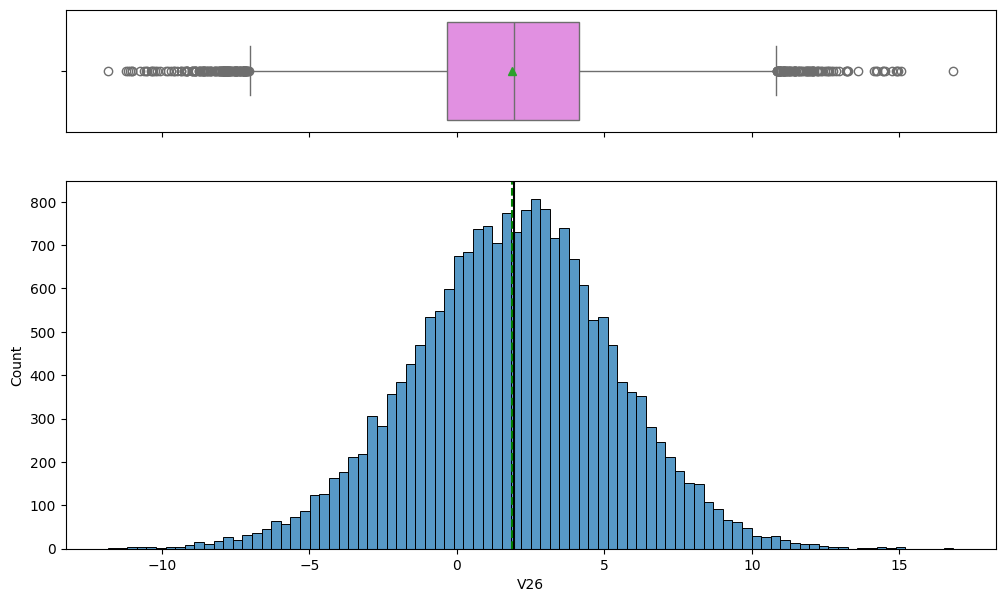

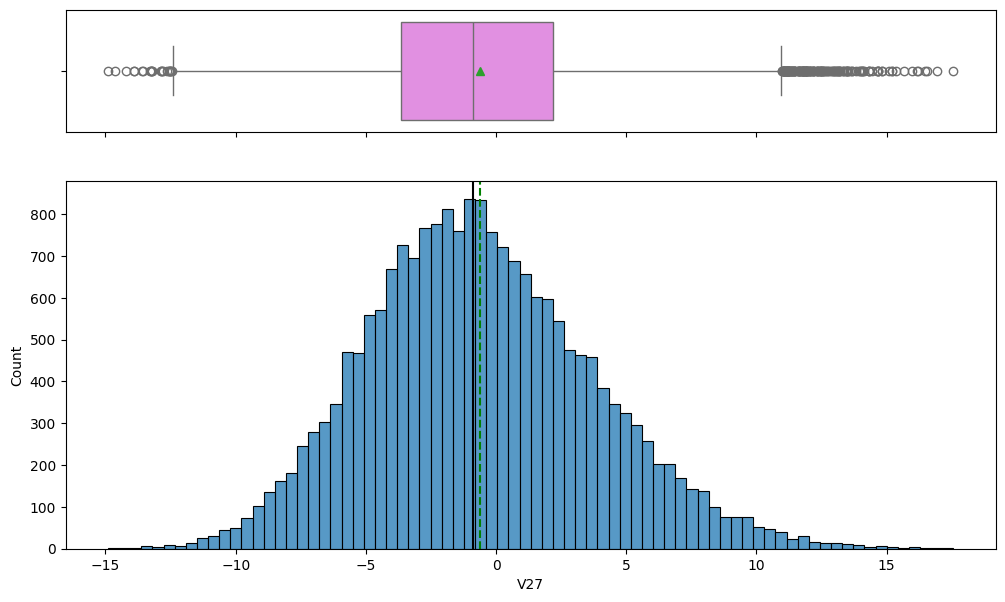

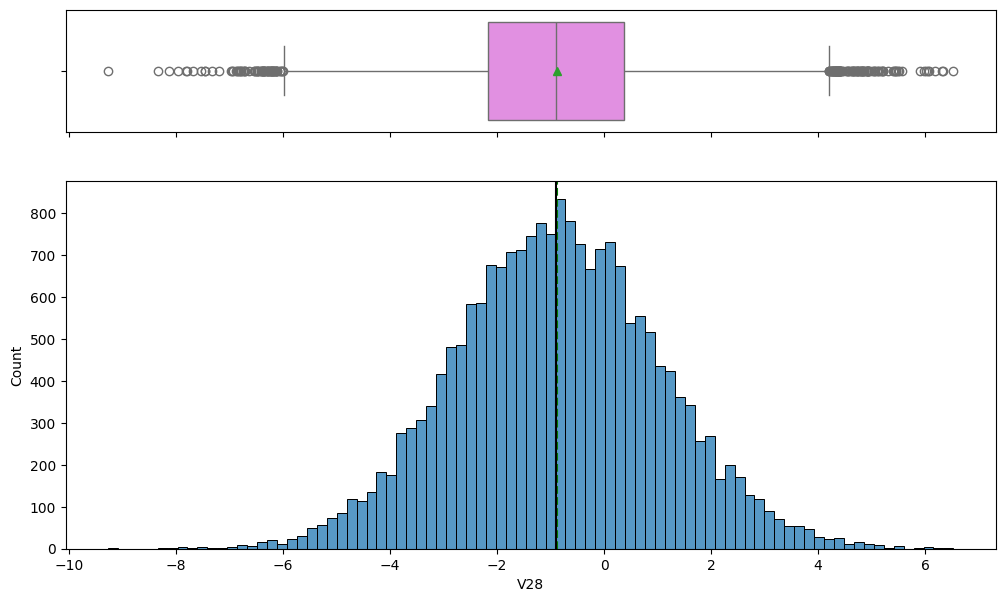

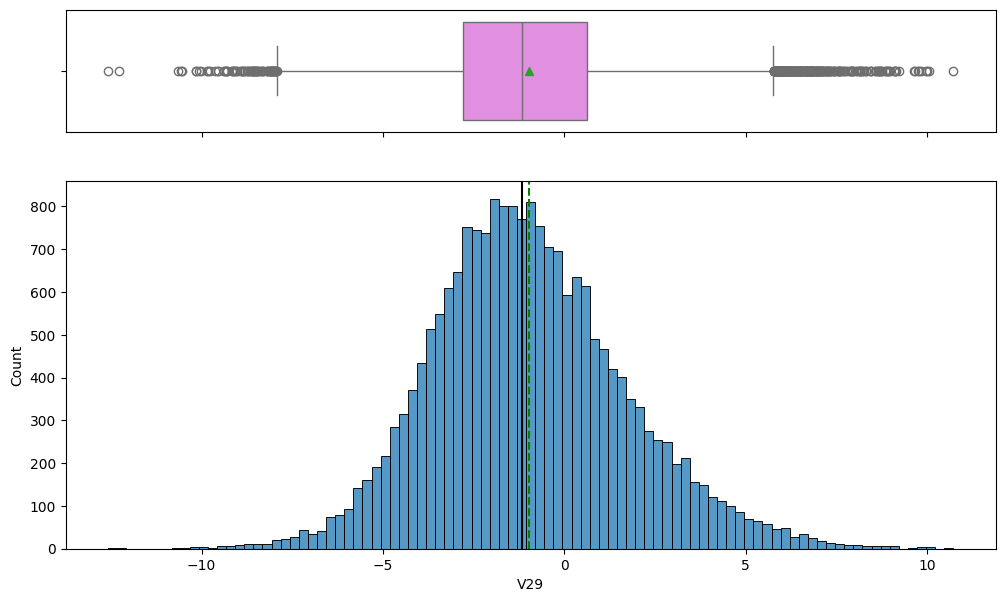

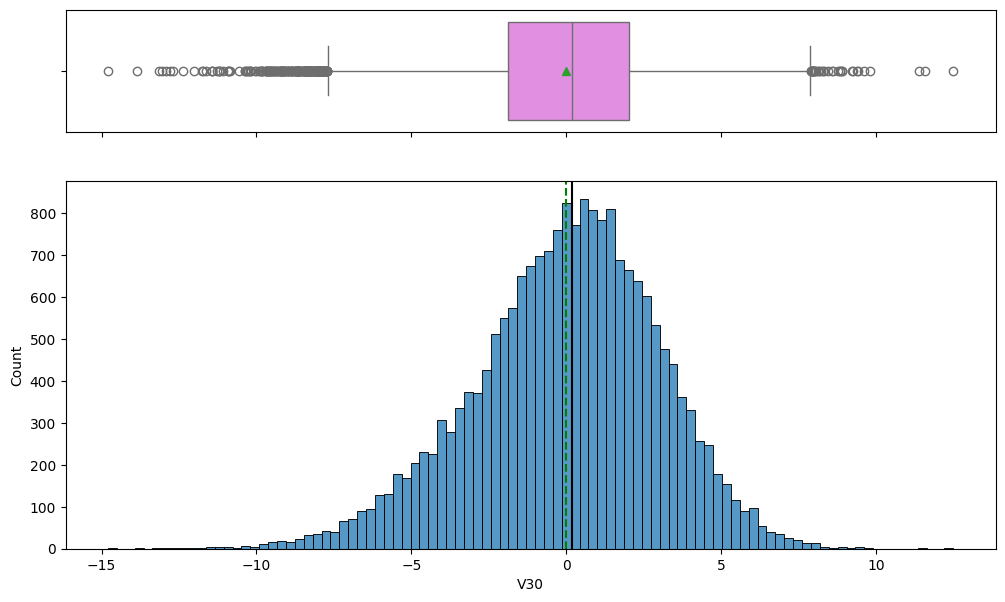

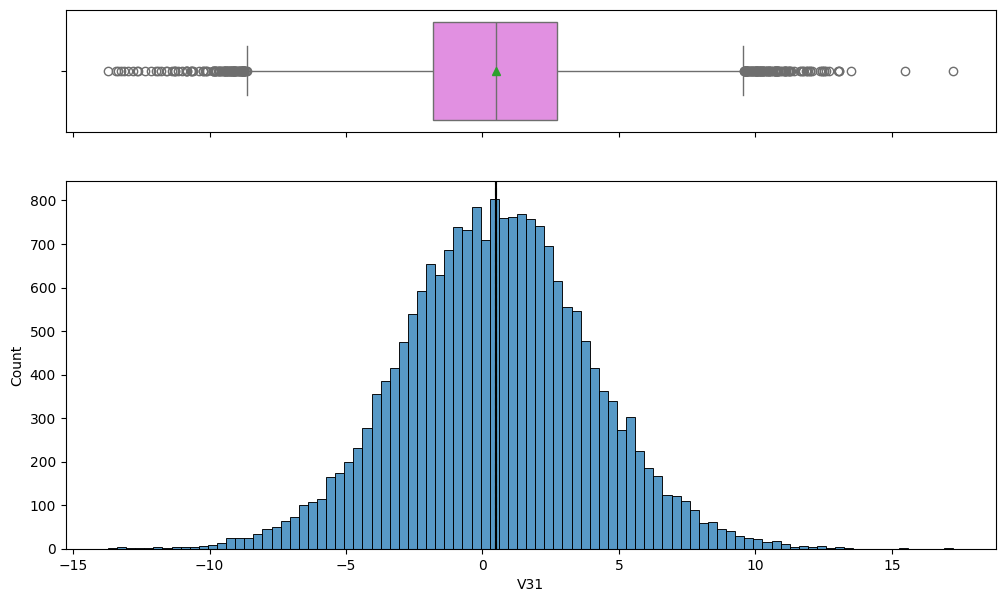

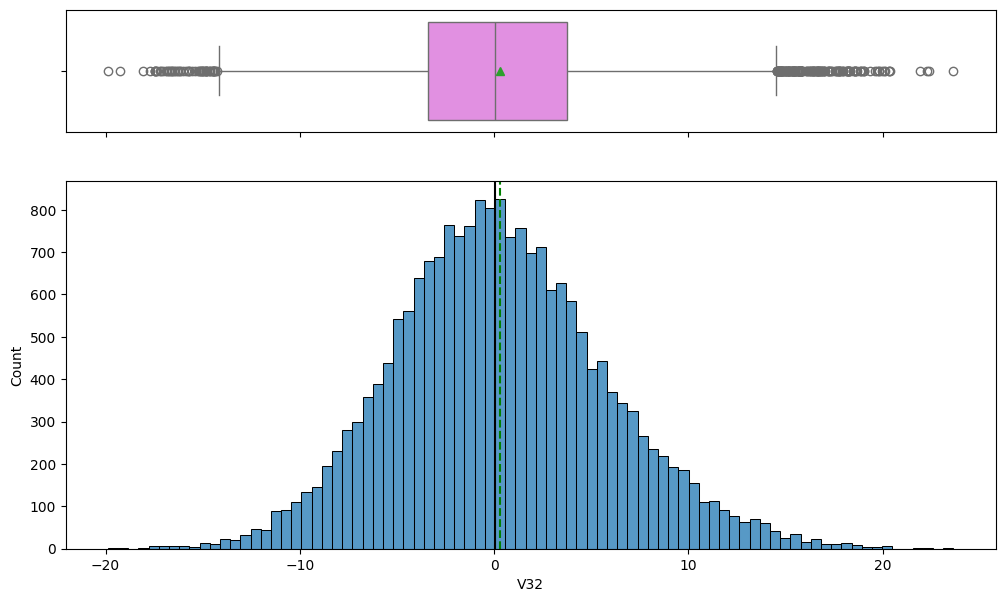

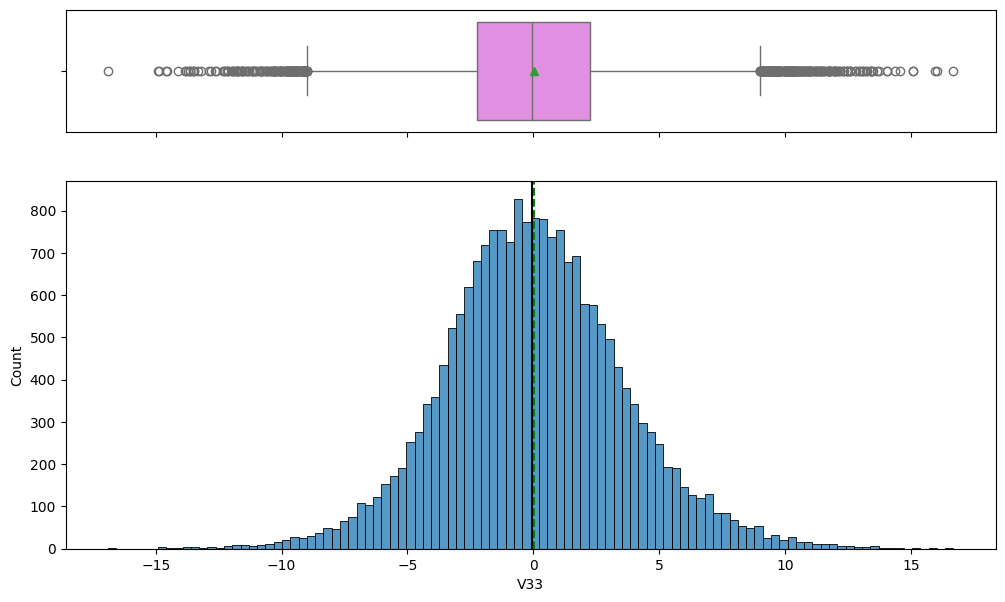

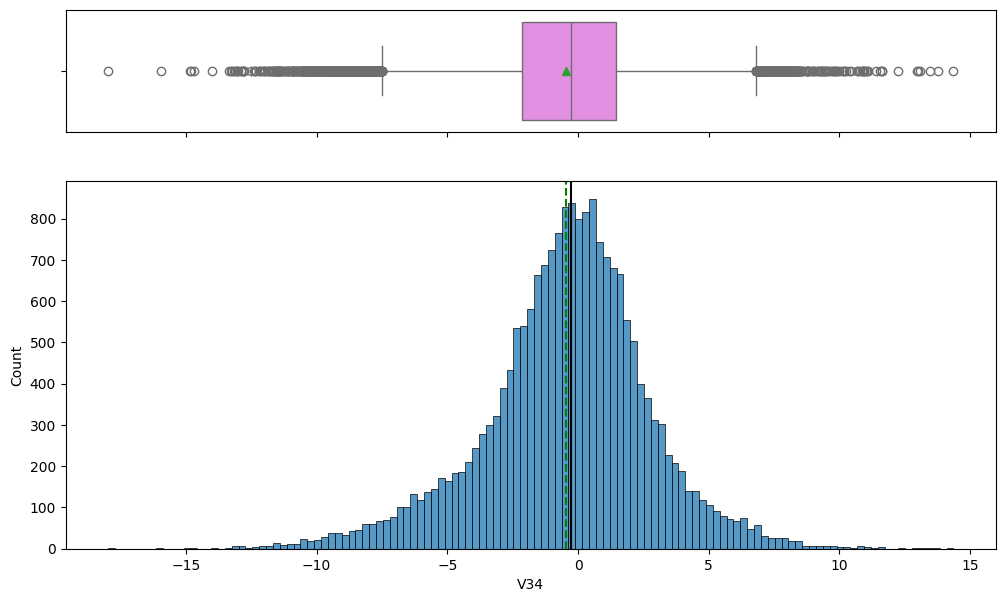

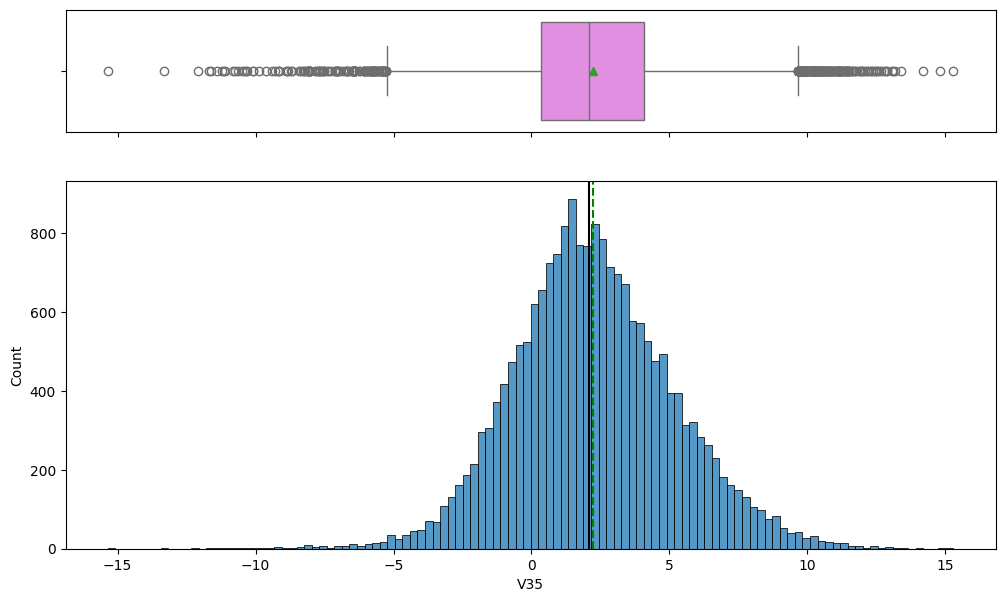

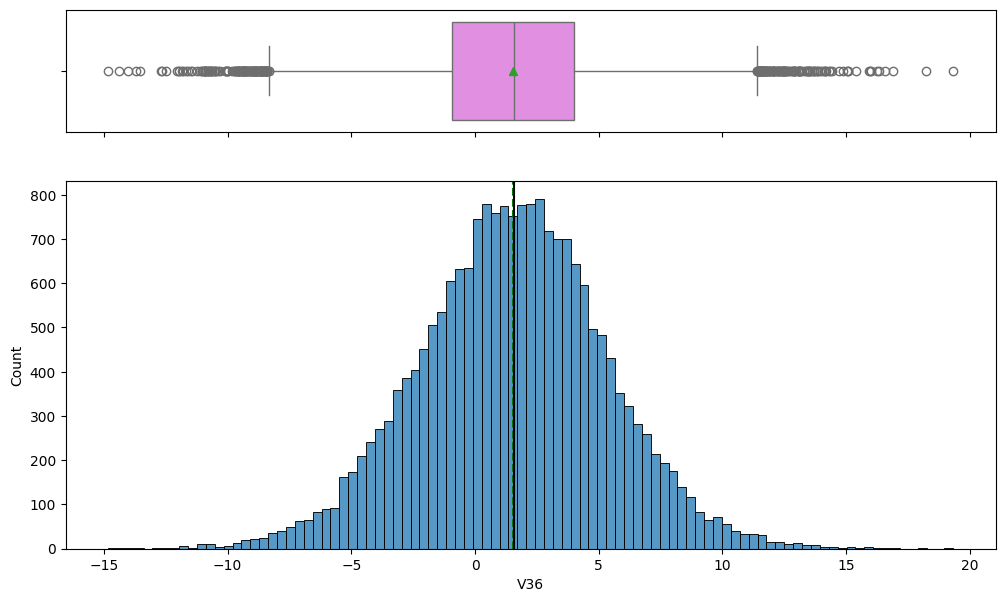

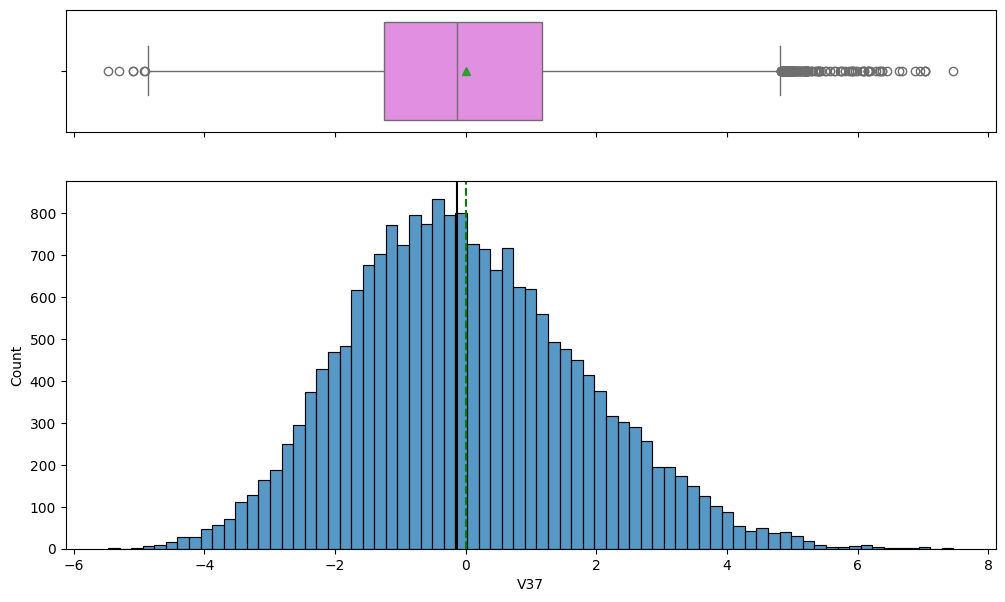

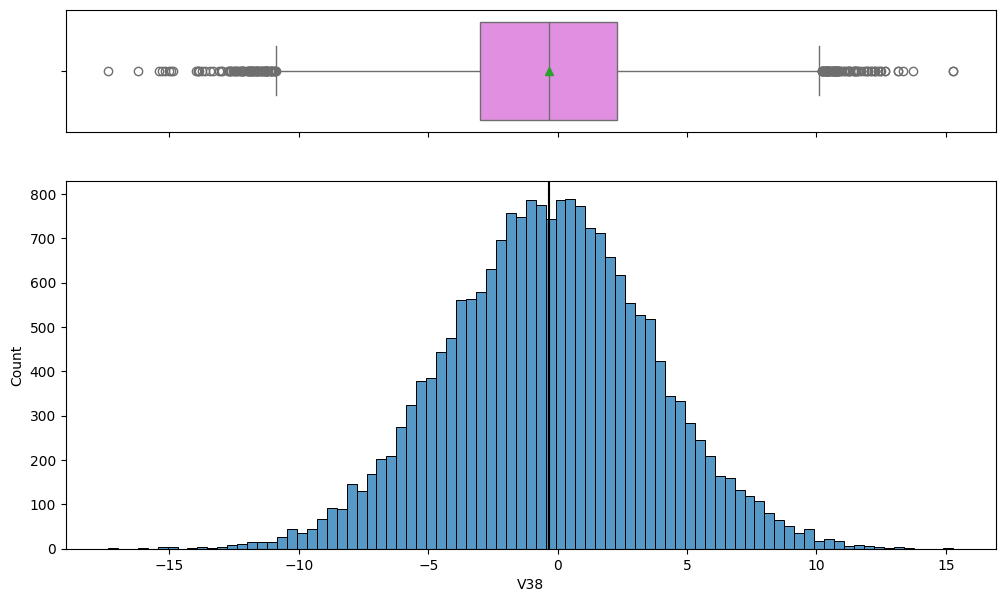

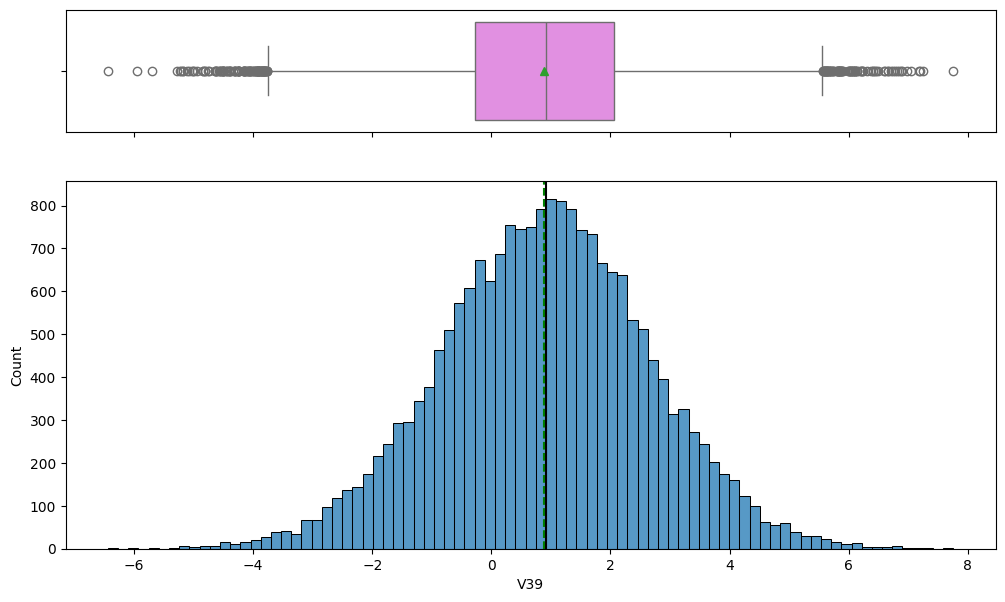

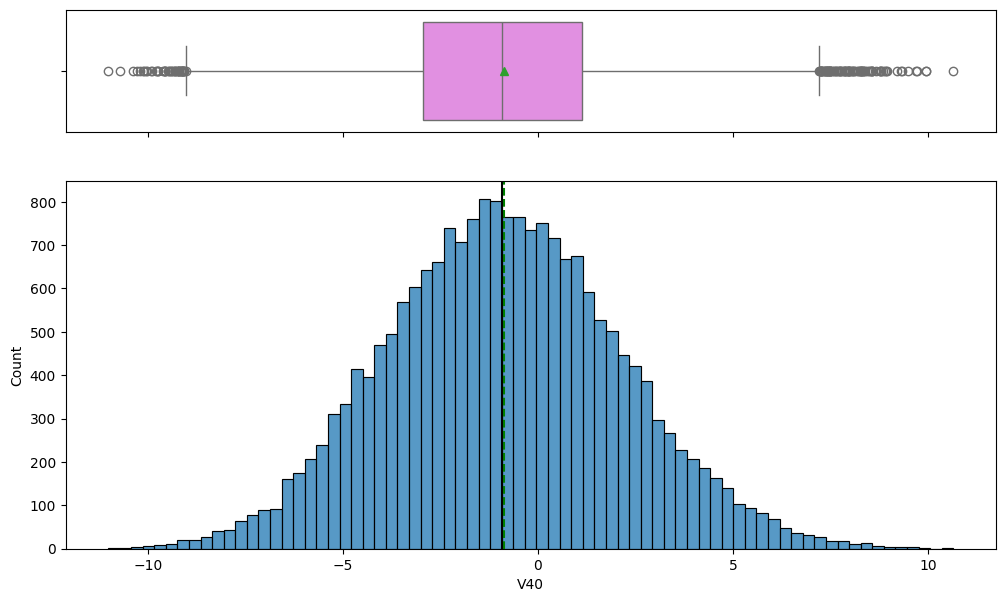

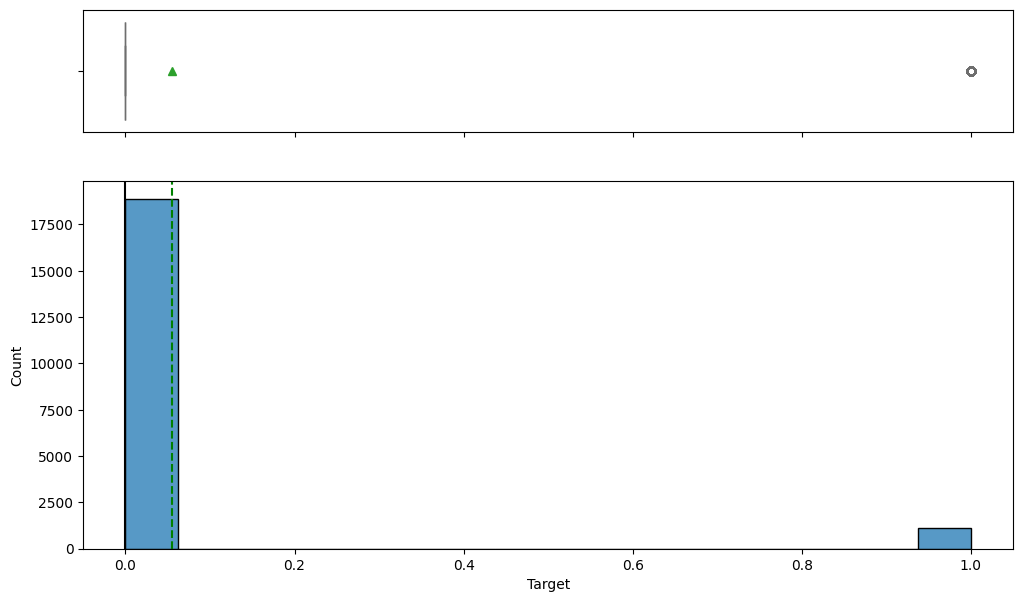

In [ ]:
for feature in df.columns:
   histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

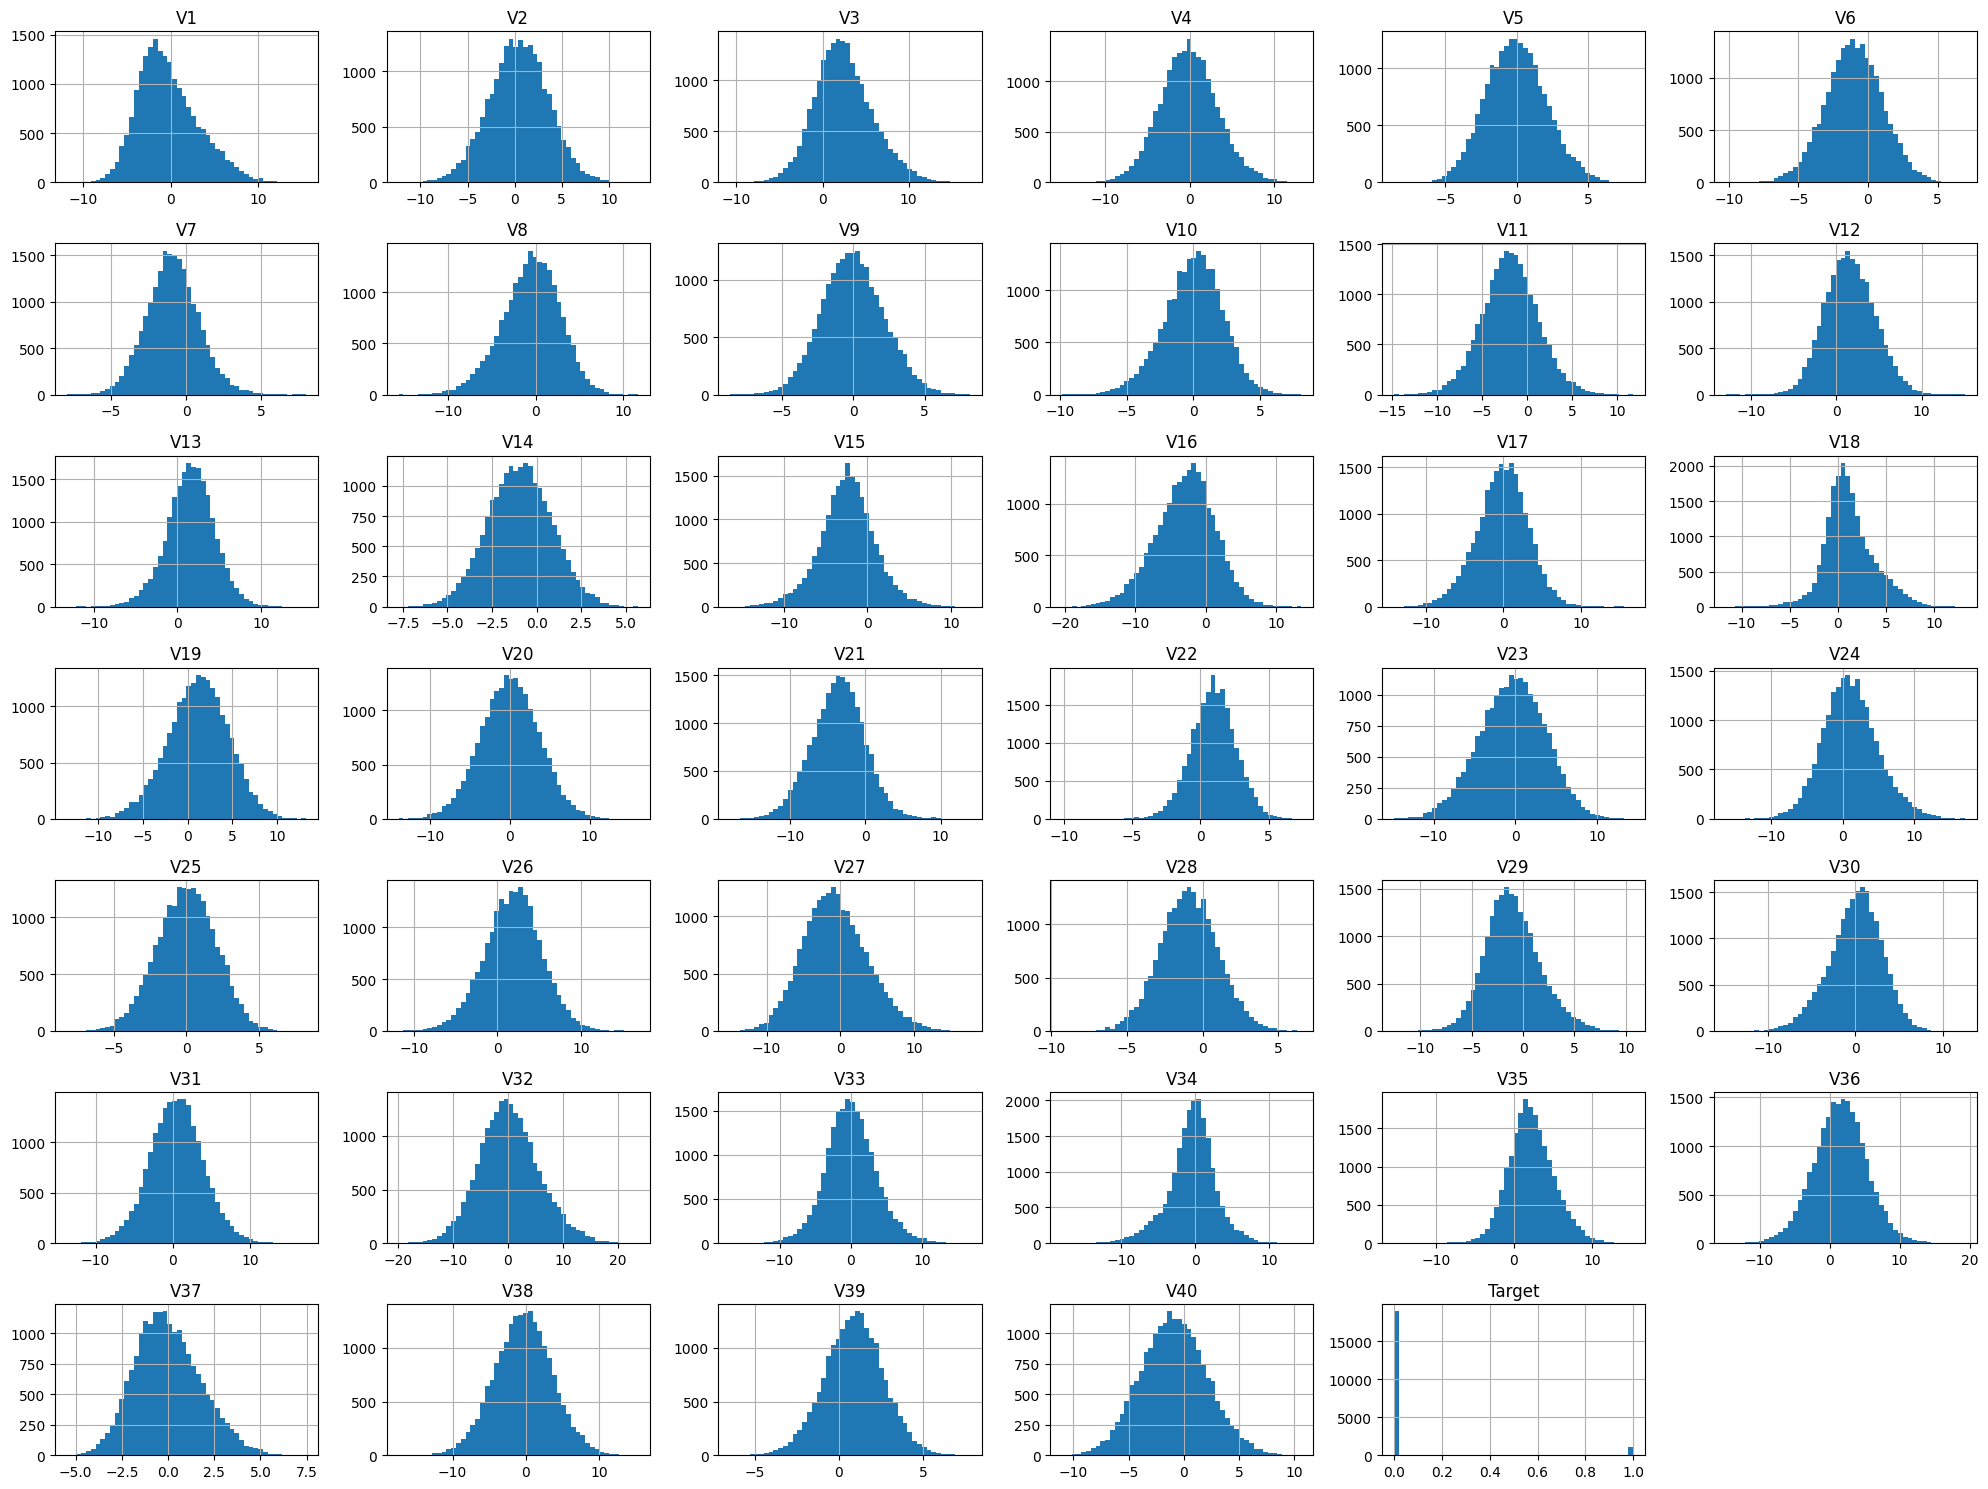

In [ ]:
#make histplots for each variable
df.hist(bins = 50, figsize = (20, 15));
plt.tight_layout()

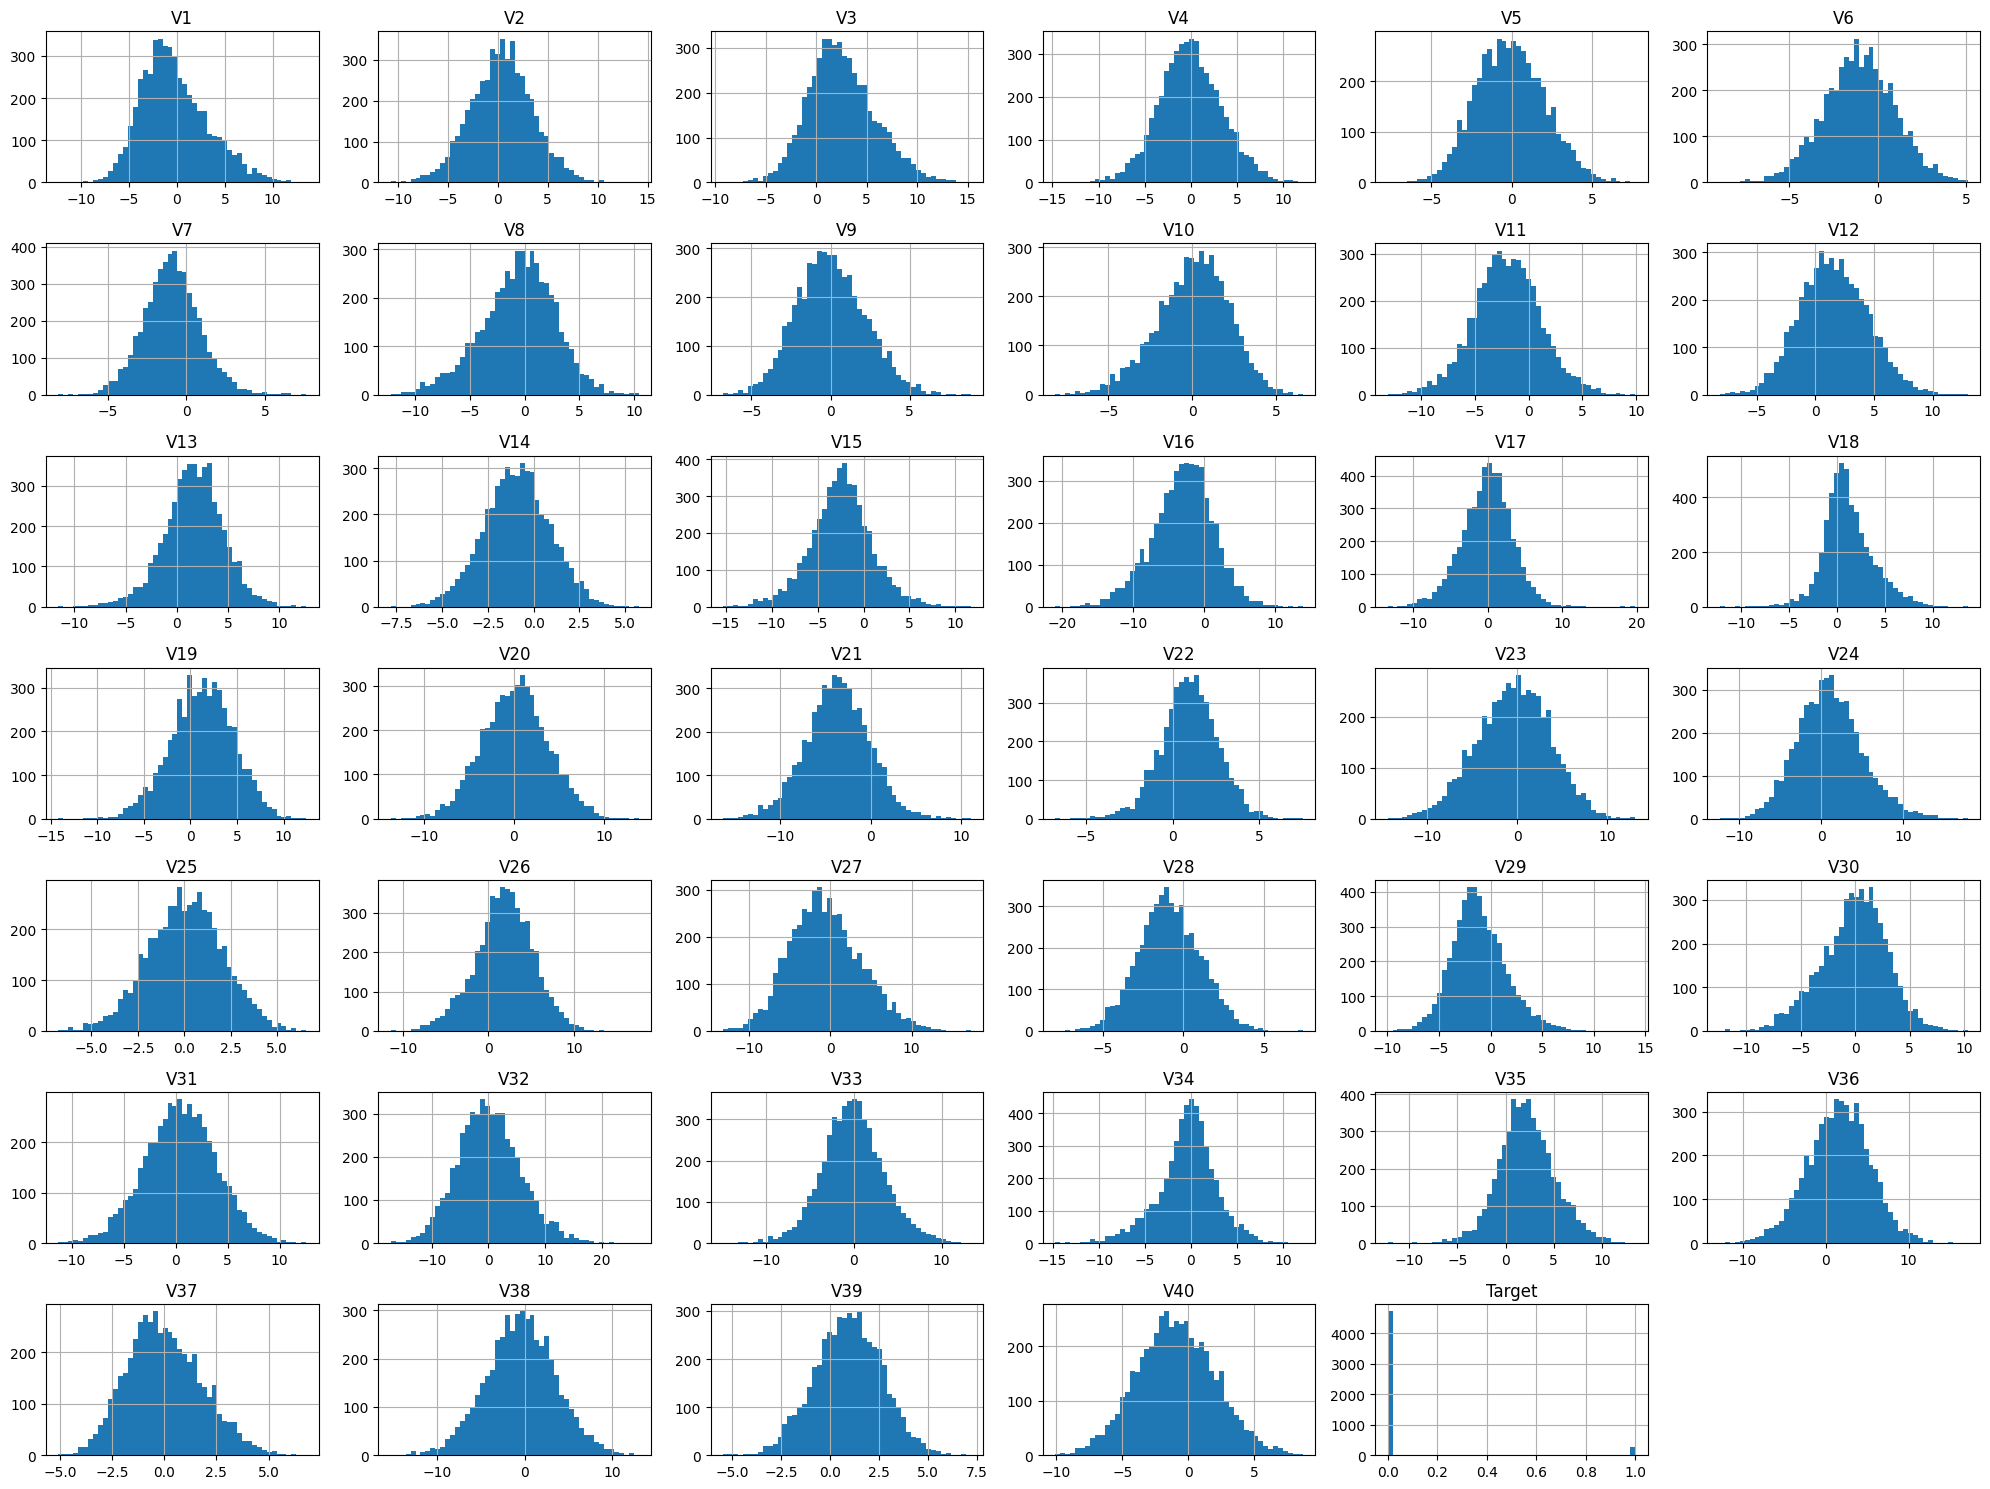

In [ ]:
#make histplots for each variable
df_test.hist(bins = 50, figsize = (20, 15));
plt.tight_layout()

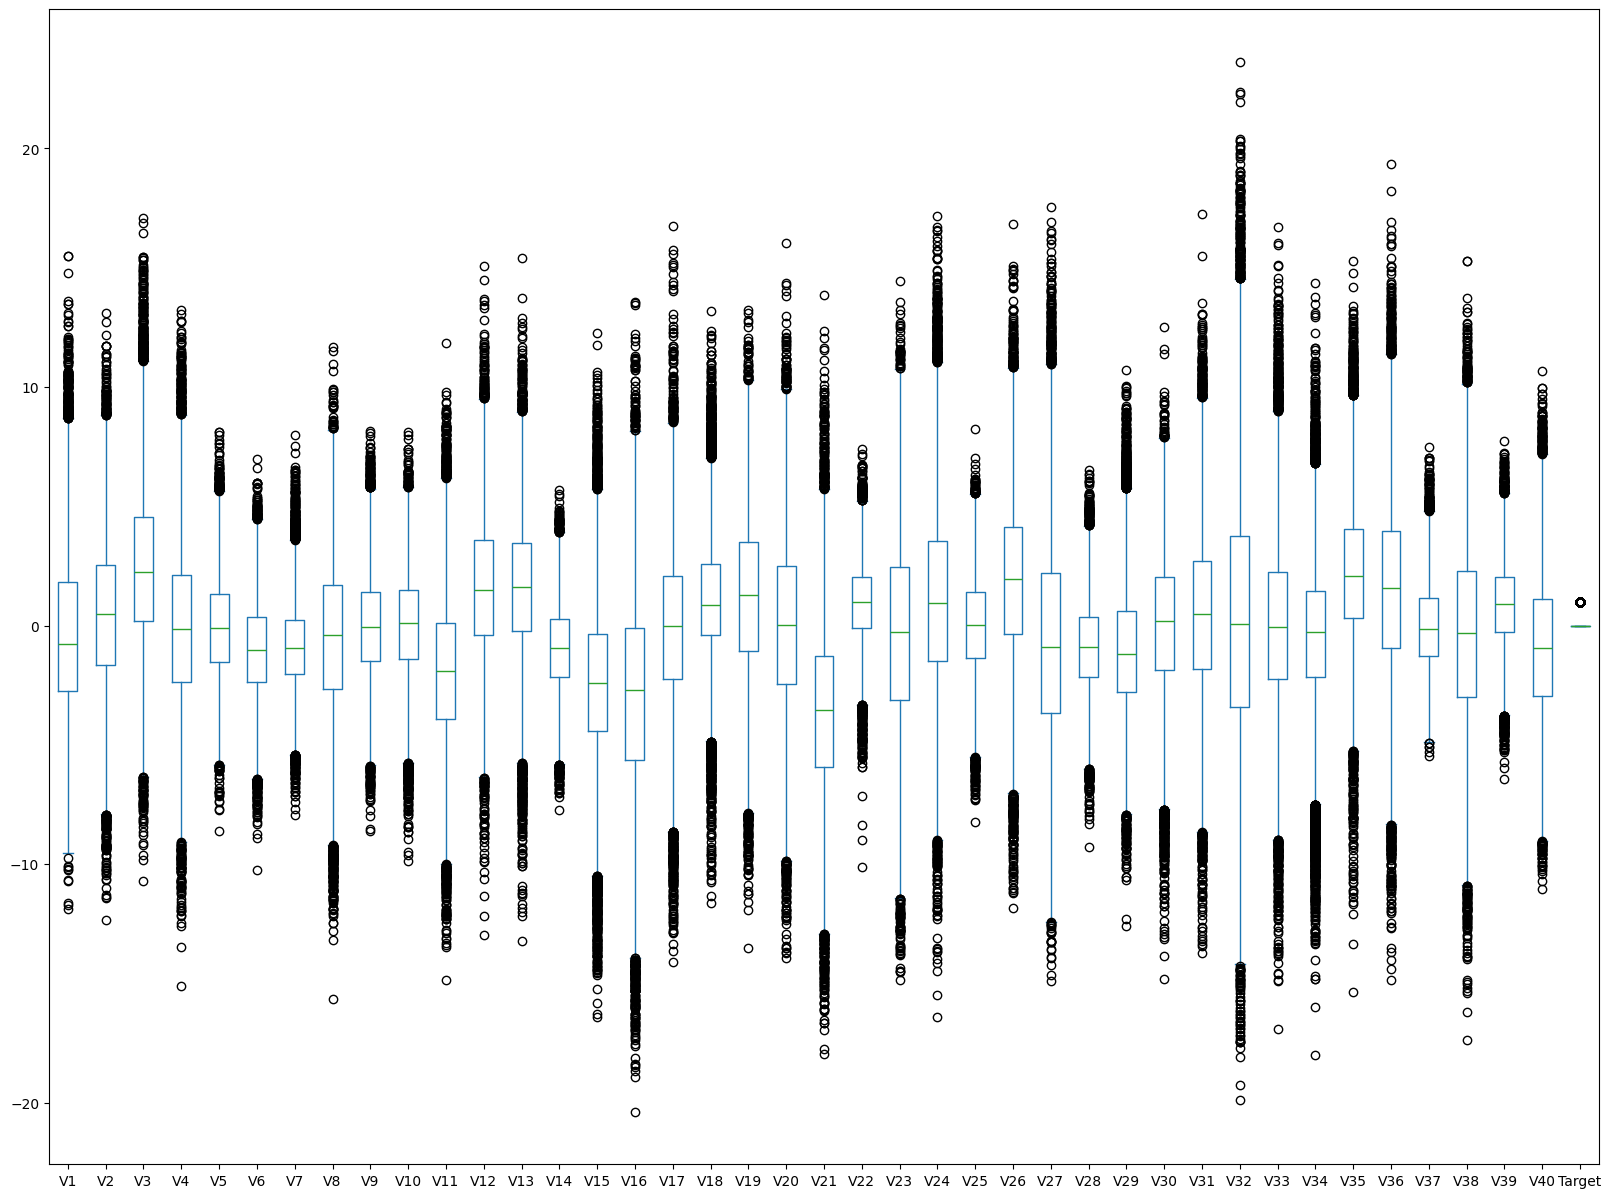

In [ ]:
#make boxplots for all the variables
df.plot.box(figsize = (20, 15));

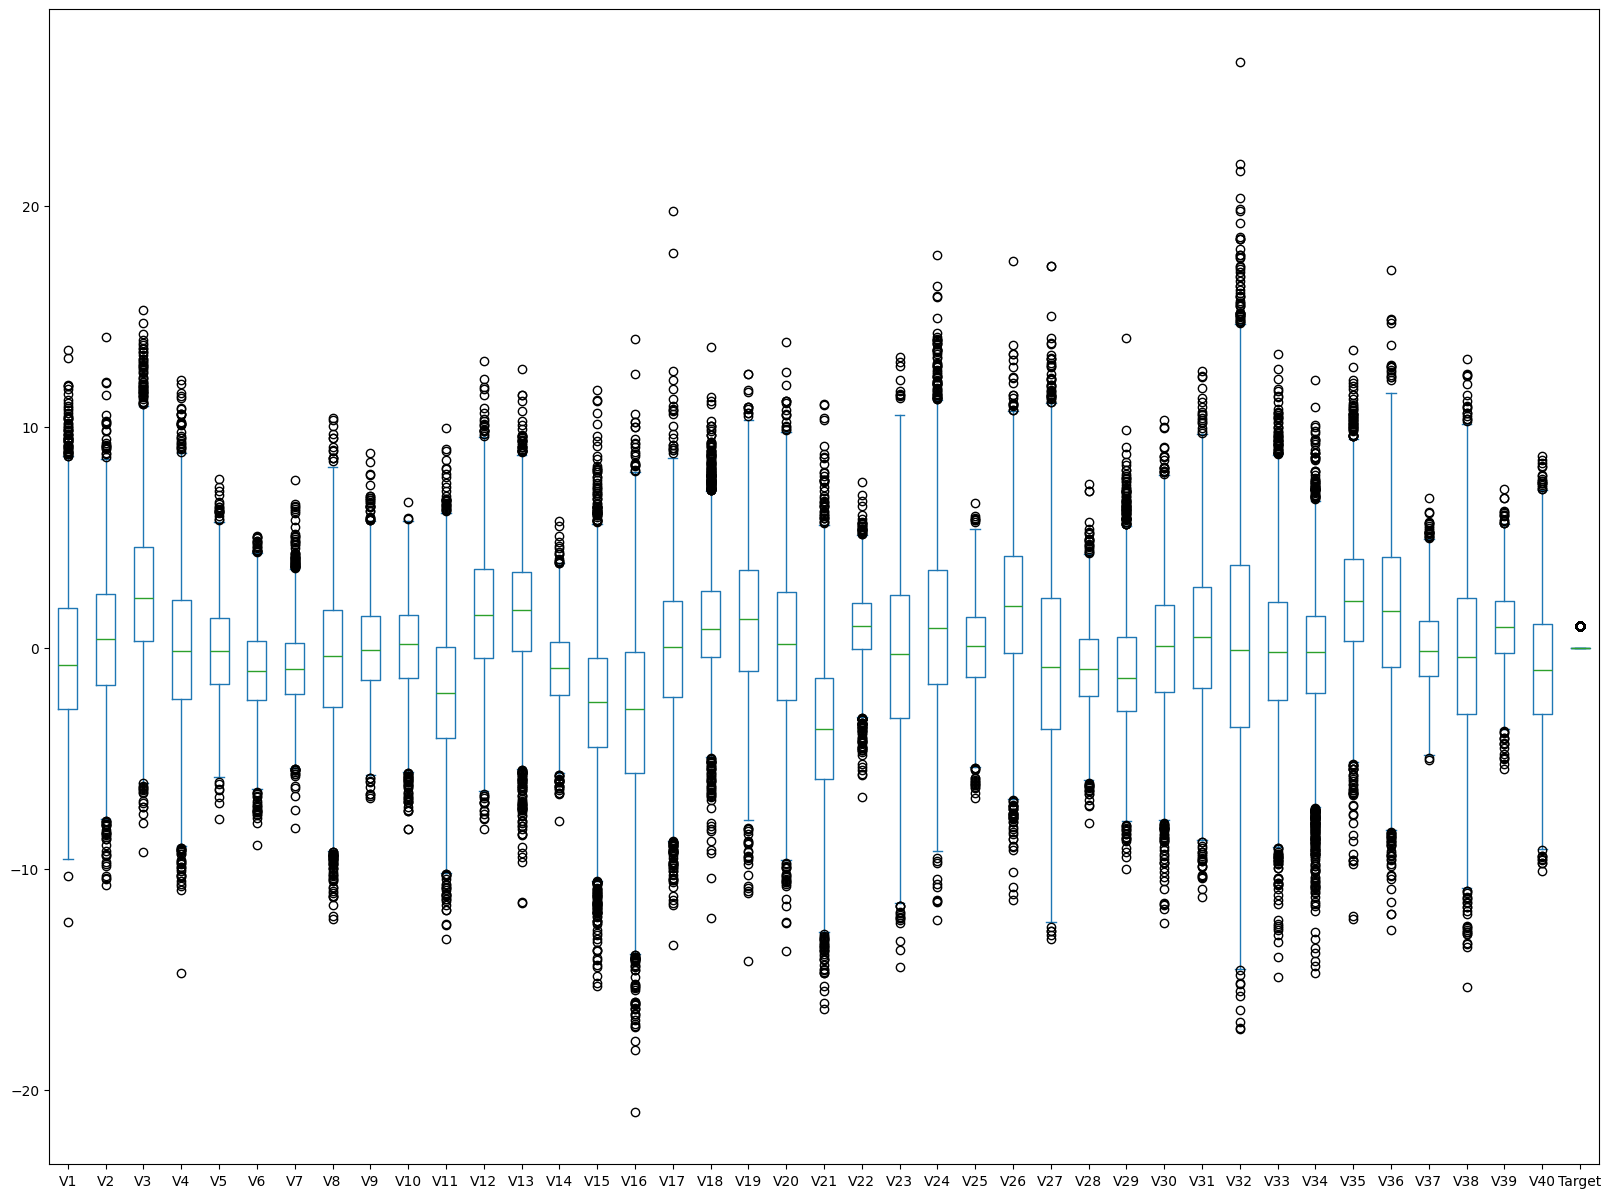

In [ ]:
#make boxplots for all the variables
df_test.plot.box(figsize = (20, 15));

* The distribution of all attributes (V1 to V40) is almost symmetrical.
* As observed previously, there are positive and negative values for all predictor variables.
* There are outliers on all predictor variables (V1 to V40), we will not treat them as they are ciphered and are considered true values.
* Most of the sensors detect that the generator is not failing (0). * There are a few failures 1110 out of the 20000.
* Both train and test set data looks similar
* Since there are outliers on both the sides decision not to use standard scalar

## Bivariate Analysis

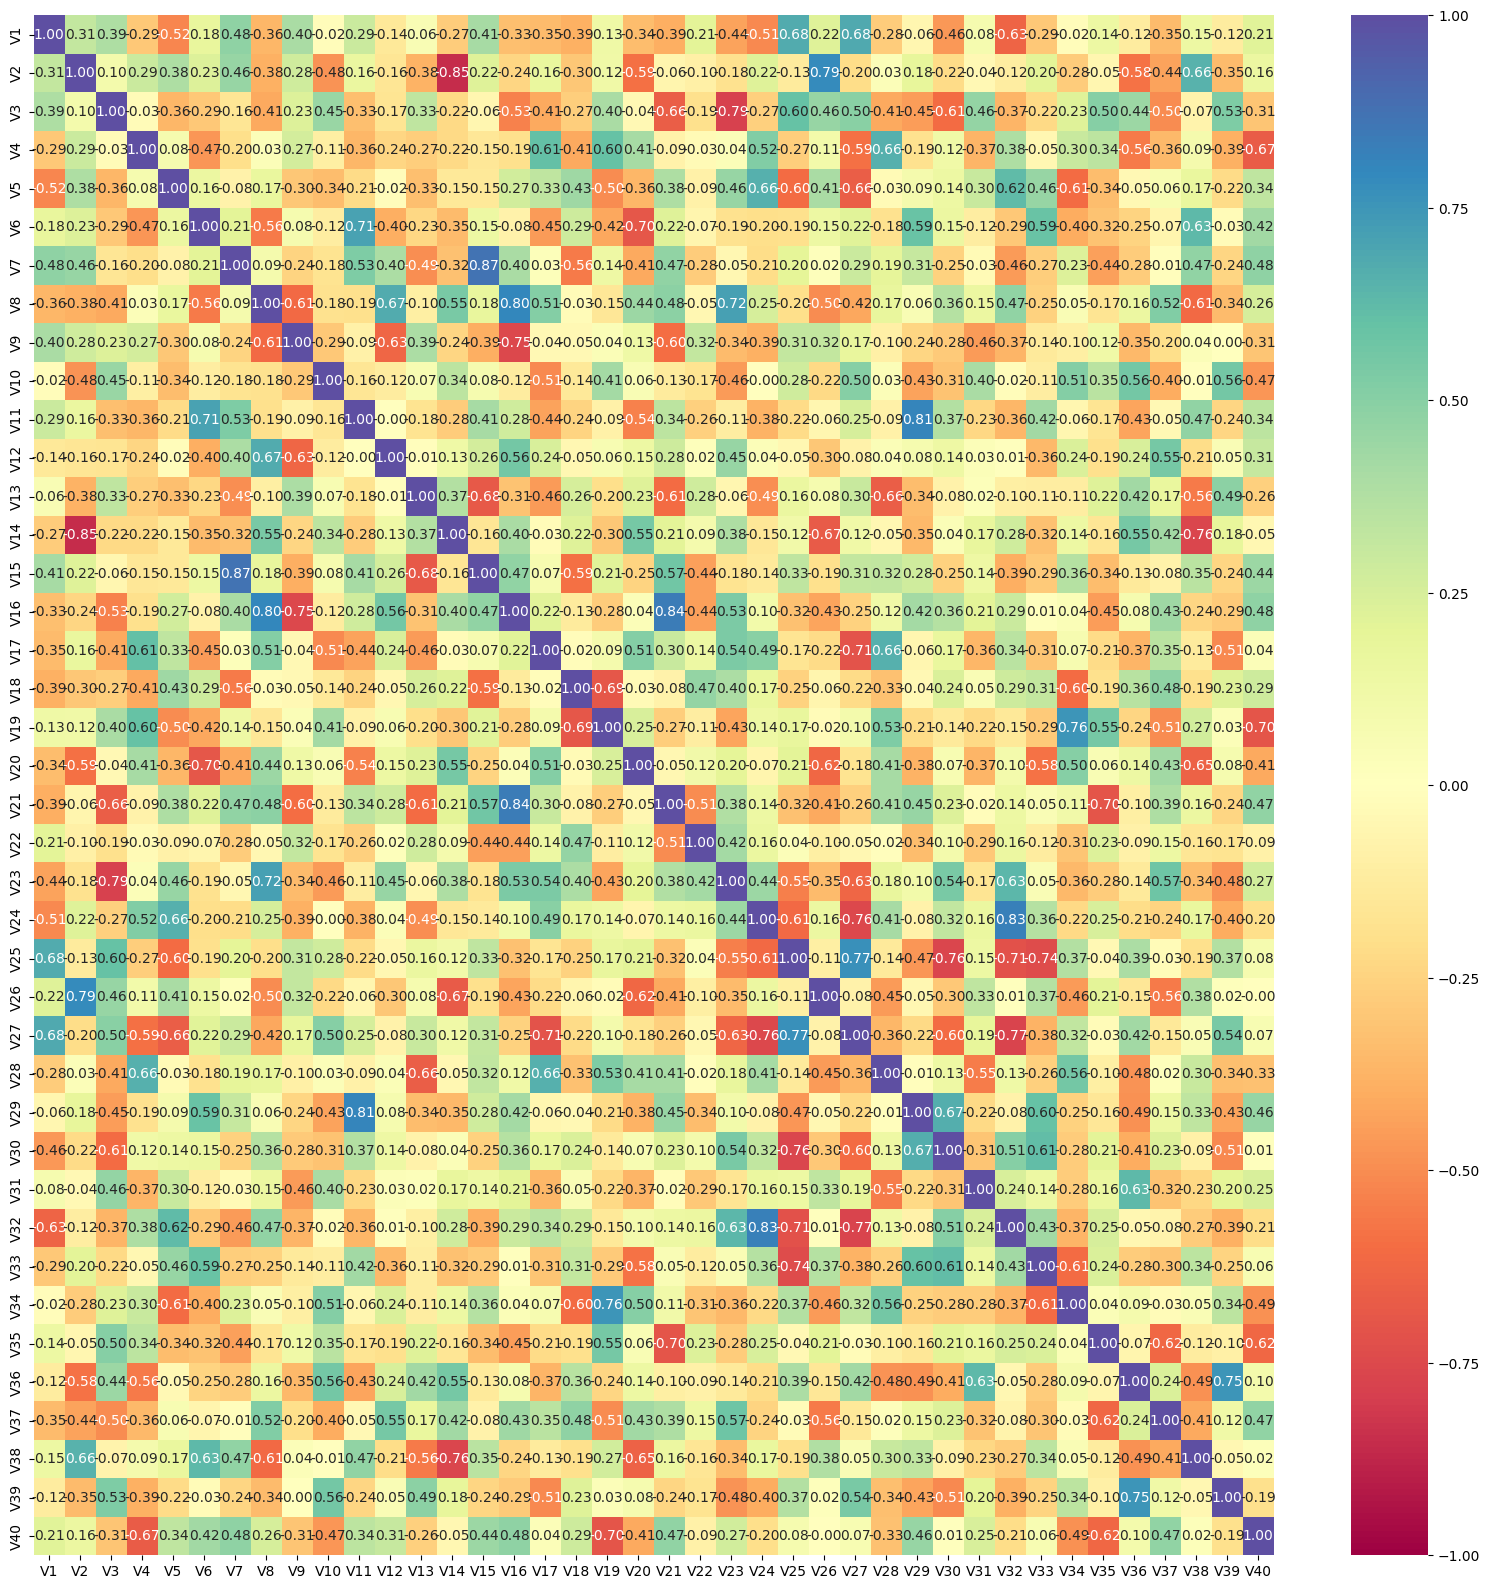

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
cols_list.remove("Target")

plt.figure(figsize=(20, 20))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

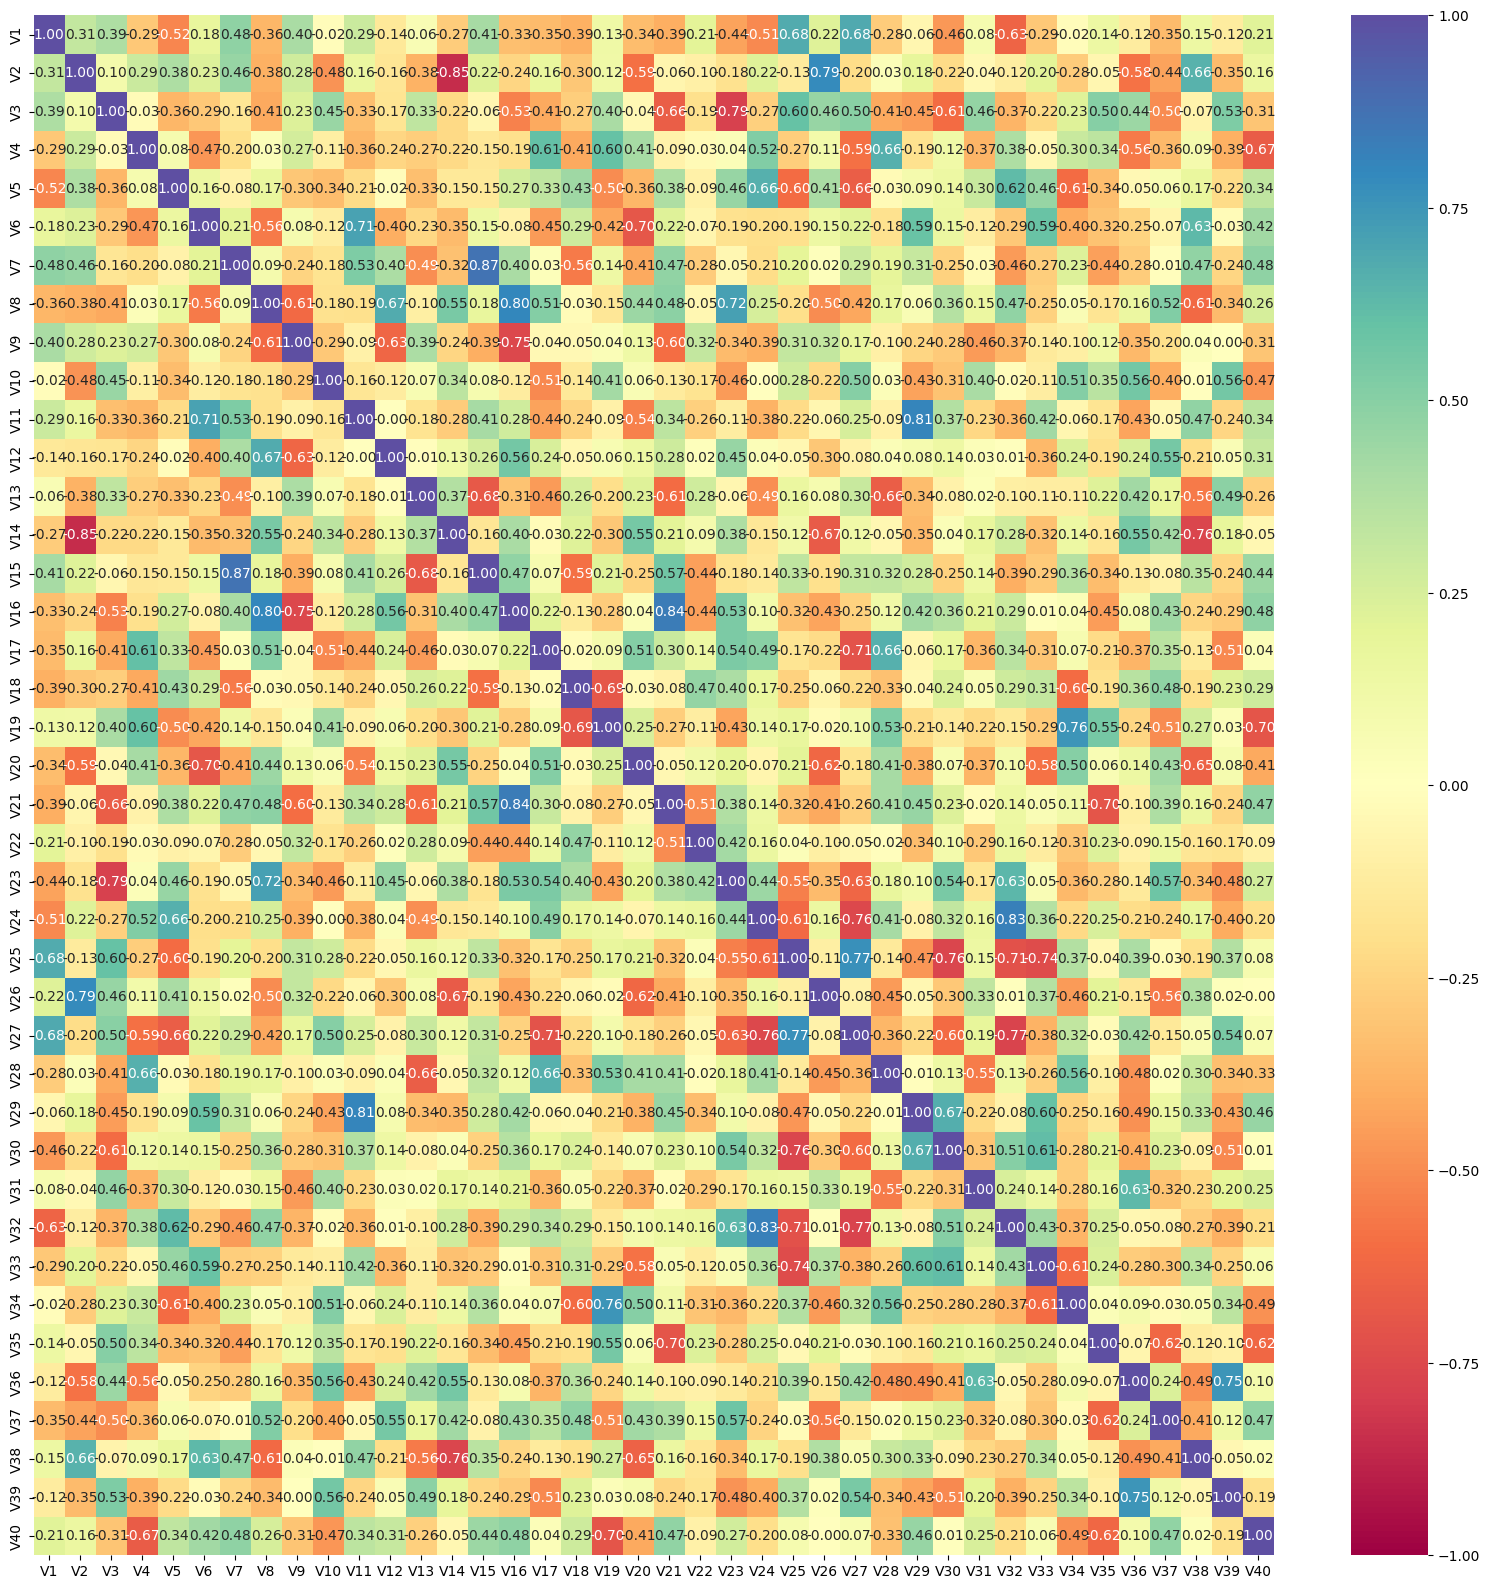

In [ ]:
cols_list = df_test.select_dtypes(include=np.number).columns.tolist()
cols_list.remove("Target")

plt.figure(figsize=(20, 20))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Parameters have strong correlation with some eg. v29 having strong correlation with v11 both in test and train set
* v40 have strong negative correlation with v19


## Model Evaluation Criterion

## Model evaluation criterion
The nature of predictions made by the classification model will translate as follows:

* True positives (TP) are failures correctly predicted by the model.
* False negatives (FN) are real failures in a generator where there is no detection by model.
* False positives (FP) are failure detections in a generator where there is no failure.
## Which metric to optimize?
* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs. We will need to minimize it
* False positives (FP) are detections where there is no failure. These will result in inspection costs.enhance program may even cost more than ReneWind's current situation.
Therefore, we our model selection process should optimize for F1 score, which should allow us to select the most profitable model for ReneWind to implement.

In [24]:
#pulling in function to plot the loss/recall
def plot(history, name):
    """
    Function to plot loss/recall

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Recall
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train recall or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation recall or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

# **Data Preprocessing**

In [5]:
#copying the data
df_new = df.copy()
df_test_new = df_test.copy()

In [6]:
# Separating target variable and other variables
X_train = df_new.drop(columns="Target")
Y_train = df_new["Target"]
X_test = df_test_new.drop(columns="Target")
y_test = df_test_new["Target"]

In [7]:
#Defining dataframe columns
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization","train loss","validation loss","train recall","validation recall","time (secs)"]


#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

In [8]:
results

Empty DataFrame
Columns: [# hidden layers, # neurons - hidden layer, activation function - hidden layer , # epochs, batch size, optimizer, learning rate, momentum, weight initializer, regularization, train loss, validation loss, train recall, validation recall, time (secs)]
Index: []

In [10]:
# Splitting data into training, validation and test set:
# first we split data into two parts, temporary and test

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_train, Y_train, test_size=0.30, random_state=1, stratify=Y_train
)
print(X_train.shape, X_val.shape, X_test.shape)

(14000, 40) (6000, 40) (5000, 40)


In [11]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 14000
Number of rows in validation data = 6000
Number of rows in test data = 5000


In [12]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="median")

In [13]:
#replace the missing values in the train, validation, and test sets
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(imputer.fit_transform(X_val), columns=X_val.columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)

In [ ]:
#verify there are no missing values in the training data
X_train.isna().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64

In [15]:
#verify there are no missing values in the training data
X_val.isna().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64

In [ ]:
X_test.isna().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64

## Initial Model Building (Model 0)

- Let's start with a neural network consisting of
  - just one hidden layer
  - activation function of ReLU
  - SGD as the optimizer

In [157]:
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='macro')  # to compute Recall
    precision = precision_score(target, pred, average='macro')  # to compute Precision
    f1 = f1_score(target, pred, average='macro')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,}, index = [0]
    )

    return df_perf

In [17]:
#Let's start with a neural network consisting of
#just one hidden layer
#activation function of ReLU
#SGD as the optimizer
#initialize model

#clear keras session
tf.keras.backend.clear_session()

#initialize neural network
model0 = Sequential()

#hidden layer
model0.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))

#output layer -- one node for binary target variable, and sigmoid for a binary classification problem
model0.add(Dense(1, activation = 'sigmoid'))

In [18]:
#defining optimizer
optimizer = keras.optimizers.SGD()

#compile model, set optimizer and loss function -- binary crossentropy for binary target variable, with recall as metric
model0.compile(optimizer = optimizer, loss = 'binary_crossentropy',metrics = ['recall'])


In [19]:
#looking at model details
model0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#defining batch size and epochs
batch_size = 100
epochs = 50

#fitting model
start = time.time()
history = model0.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3548 - recall: 0.4283 - val_loss: 0.1311 - val_recall: 0.4685
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1220 - recall: 0.4516 - val_loss: 0.1126 - val_recall: 0.5556
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1048 - recall: 0.5218 - val_loss: 0.1040 - val_recall: 0.6186
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0960 - recall: 0.5773 - val_loss: 0.0988 - val_recall: 0.6547
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0902 - recall: 0.6200 - val_loss: 0.0950 - val_recall: 0.6817
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0858 - recall: 0.6645 - val_loss: 0.0920 - val_recall: 0.6937
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0824 - recall: 0.6847 - val_loss: 0.0896 - val_recall: 0.7027
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0795 - recall: 0.7006 - val_loss: 0.0875 - val_recall: 0.7117
Epoch 9/

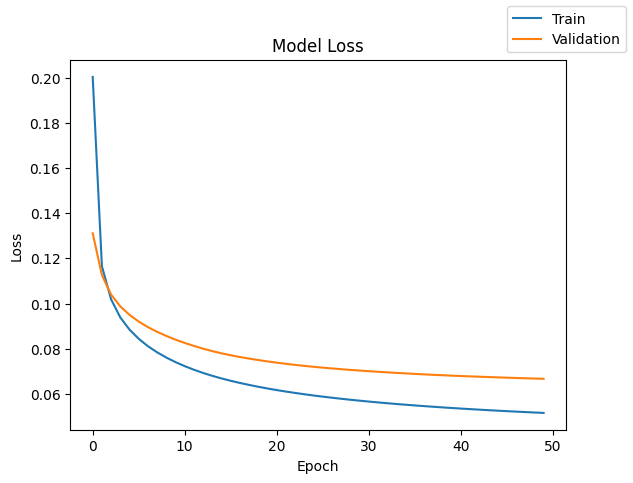

In [25]:
#plot model's loss
plot(history, 'loss')

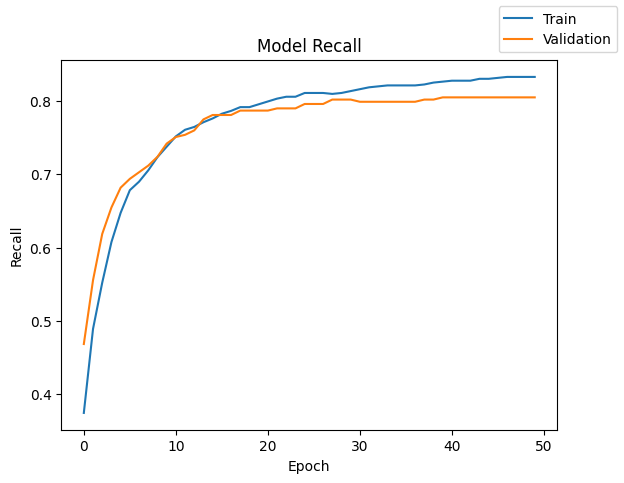

In [26]:
#plot model's recall
plot(history,'recall')

In [211]:
model_0_train_perf = model_performance_classification(model0,X_train, y_train)
model_0_train_perf


438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step


Accuracy    Recall  Precision  F1 Score
0  0.989643  0.916383   0.983115  0.946958

In [212]:
model_0_val_perf = model_performance_classification(model0, X_val, y_val)
model_0_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step


Accuracy   Recall  Precision  F1 Score
0    0.9875  0.90152   0.976335  0.935333

# **Model Performance Improvement**

* We have steep drops in loss up until around the 3rd epoch
* Our loss starts to flatten out around 3 epochs, and the validation loss is higher than the training loss after about 2 epochs
* When it comes to recall, both show steep improvement until around 10 epochs, when it starts to flatten out
* Validation performance is overall better than training performance until around 14 epochs, which could mean this is where the model starts to overfit

In [28]:
#add model to our results df
results.loc[0] = [
  1, #hidden layers
  64, #neurons/layer
  "relu", #activation function
  epochs, #epochs
  batch_size, #batch size
  "SGD", #optimizer
  [0.001,"-"], # learning rate, momentum
  "-", #weight initializer
  "-", #regularization
  history.history["loss"][-1], #train loss
  history.history["val_loss"][-1], #val loss
  history.history["recall"][-1], #train recall
  history.history["val_recall"][-1], #val recall
  round(end-start,2) #trt
  ]
results

# hidden layers  # neurons - hidden layer  \
0                1                        64   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                                relu        50         100       SGD   

  learning rate, momentum weight initializer regularization  train loss  \
0              [0.001, -]                  -              -    0.051616   

   validation loss  train recall  validation recall  time (secs)  
0         0.066721       0.83269           0.804805         14.1

## Model 1

##Plan:

* Two hidden layers -- 64, 128
* Activation function -- relu, relu
* SGD optimizer


In [29]:
#initialize model

#clear keras session
tf.keras.backend.clear_session()

#initialize neural network
model1 = Sequential()

#hidden layer
model1.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))

#hidden layer
model1.add(Dense(128, activation = 'relu'))

#output layer -- one node for binary target variable, and sigmoid for a binary classification problem
model1.add(Dense(1, activation = 'sigmoid'))

In [30]:
#looking at model details
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,073 (43.25 KB)

 Trainable params: 11,073 (43.25 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
#defining optimizer
optimizer = keras.optimizers.SGD()

#compile model, set optimizer and loss function -- binary crossentropy for binary target variable, with recall as metric
model1.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['recall'])

In [32]:
#defining batch size and epochs
batch_size = 100
epochs = 50

#fitting model
start = time.time()
history = model1.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = batch_size, epochs = epochs, verbose = 2)
end = time.time()

Epoch 1/50
140/140 - 1s - 5ms/step - loss: 0.1678 - recall: 0.2046 - val_loss: 0.1341 - val_recall: 0.3423
Epoch 2/50
140/140 - 0s - 2ms/step - loss: 0.1210 - recall: 0.4118 - val_loss: 0.1147 - val_recall: 0.5105
Epoch 3/50
140/140 - 0s - 2ms/step - loss: 0.1060 - recall: 0.5135 - val_loss: 0.1046 - val_recall: 0.6096
Epoch 4/50
140/140 - 0s - 2ms/step - loss: 0.0969 - recall: 0.5753 - val_loss: 0.0980 - val_recall: 0.6486
Epoch 5/50
140/140 - 0s - 2ms/step - loss: 0.0904 - recall: 0.6100 - val_loss: 0.0930 - val_recall: 0.6847
Epoch 6/50
140/140 - 0s - 2ms/step - loss: 0.0854 - recall: 0.6345 - val_loss: 0.0892 - val_recall: 0.7207
Epoch 7/50
140/140 - 0s - 2ms/step - loss: 0.0814 - recall: 0.6615 - val_loss: 0.0861 - val_recall: 0.7267
Epoch 8/50
140/140 - 0s - 2ms/step - loss: 0.0780 - recall: 0.6808 - val_loss: 0.0835 - val_recall: 0.7447
Epoch 9/50
140/140 - 0s - 2ms/step - loss: 0.0751 - recall: 0.7104 - val_loss: 0.0813 - val_recall: 0.7568
Epoch 10/50
140/140 - 0s - 2ms/step -

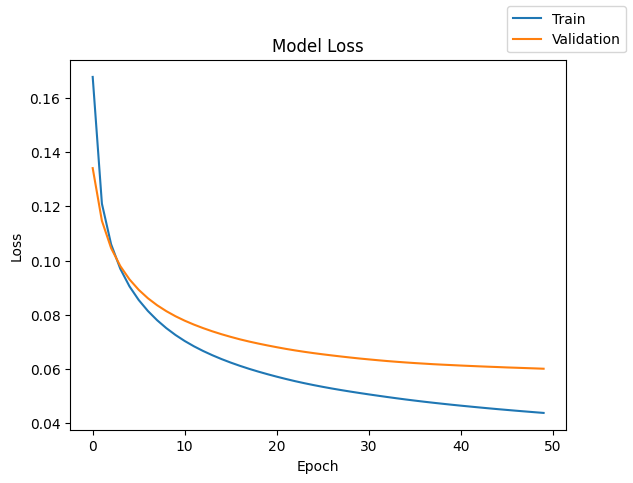

In [33]:
#plot model's loss
plot(history, 'loss')

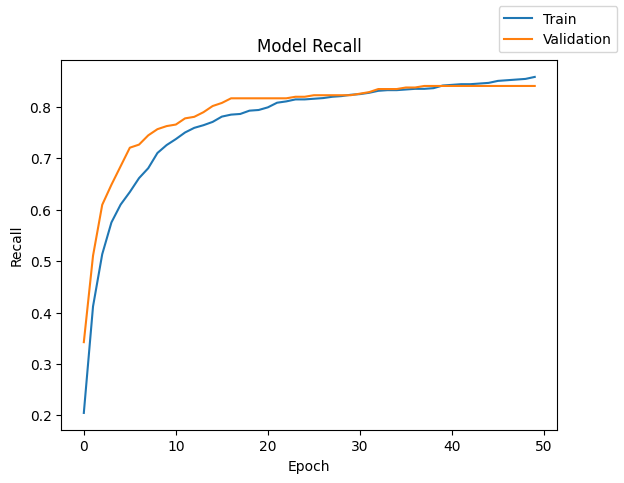

In [34]:
#plot model's recall
plot(history,'recall')

* We have steep drops in loss until about the 5th epoch before it begins slowing down and plateauing
* Validation loss is higher than training loss after about the 4th epoch
* For recall, both show steep improvement until about the 8th epoch, before it starts to slow down and plateau
* Validation performance is overall better than training performance until about the 21st epoch, when both are very similar
* Training performance is better after the 40th epoch

In [218]:
model_1_train_perf = model_performance_classification(model1, X_train, y_train)
model_1_train_perf


438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step


Accuracy    Recall  Precision  F1 Score
0  0.991357  0.929405   0.987085  0.956197

In [219]:
model_1_val_perf = model_performance_classification(model1, X_val, y_val)
model_1_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step


Accuracy    Recall  Precision  F1 Score
0      0.99  0.919803   0.983166  0.948977

## Model 2

##Plan:

* Two hidden layers -- 64, 64
* activation function -- relu, tanh
* SGD optimizer

In [37]:
#initialize model

#clear keras session
tf.keras.backend.clear_session()

#initialize neural network
model2 = Sequential()

#hidden layer
model2.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))

#hidden layer
model2.add(Dense(64, activation = 'tanh'))

#output layer -- one node for binary target variable, and sigmoid for a binary classification problem
model2.add(Dense(1, activation = 'sigmoid'))

In [38]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,849 (26.75 KB)

 Trainable params: 6,849 (26.75 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
#defining optimizer
optimizer = keras.optimizers.SGD()

#compile model, set optimizer and loss function -- binary crossentropy for binary target variable, with recall as metric
model2.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['recall'])

In [40]:
#defining batch size and epochs
batch_size = 100
epochs = 50

#fitting model
start = time.time()
history = model2.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = batch_size, epochs = epochs, verbose = 2)
end=time.time()

Epoch 1/50
140/140 - 1s - 5ms/step - loss: 0.1799 - recall: 0.1802 - val_loss: 0.1355 - val_recall: 0.2252
Epoch 2/50
140/140 - 0s - 2ms/step - loss: 0.1246 - recall: 0.2896 - val_loss: 0.1182 - val_recall: 0.3694
Epoch 3/50
140/140 - 0s - 2ms/step - loss: 0.1097 - recall: 0.4003 - val_loss: 0.1080 - val_recall: 0.4505
Epoch 4/50
140/140 - 0s - 2ms/step - loss: 0.0999 - recall: 0.4762 - val_loss: 0.1009 - val_recall: 0.5045
Epoch 5/50
140/140 - 0s - 2ms/step - loss: 0.0928 - recall: 0.5251 - val_loss: 0.0956 - val_recall: 0.5465
Epoch 6/50
140/140 - 0s - 2ms/step - loss: 0.0873 - recall: 0.5663 - val_loss: 0.0914 - val_recall: 0.5796
Epoch 7/50
140/140 - 0s - 3ms/step - loss: 0.0828 - recall: 0.6010 - val_loss: 0.0879 - val_recall: 0.6126
Epoch 8/50
140/140 - 1s - 5ms/step - loss: 0.0790 - recall: 0.6281 - val_loss: 0.0850 - val_recall: 0.6396
Epoch 9/50
140/140 - 0s - 3ms/step - loss: 0.0758 - recall: 0.6499 - val_loss: 0.0825 - val_recall: 0.6607
Epoch 10/50
140/140 - 0s - 3ms/step -

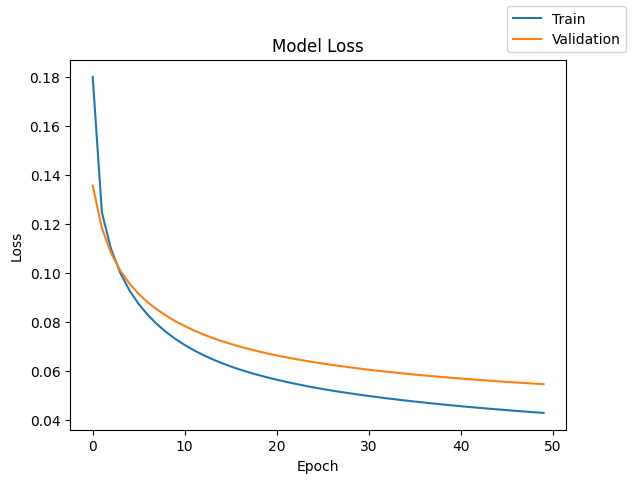

In [41]:
#plot model's loss
plot(history, 'loss')

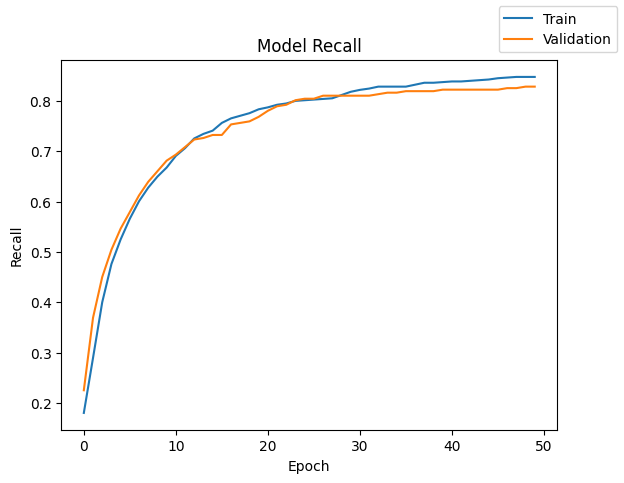

In [42]:
#plot model's recall
plot(history,'recall')

* We have steep drops in loss until around the 5th epoch, then the decreases are less steep
* Validation loss is higher than training loss after around 5 epochs
* For recall, we have steep increases until around 10 epochs, when it starts slowing and plateauing
* Validation performance is similar to the training performanceuntil around 30 epochs, when training recall becomes higher
* That said, there is a slim gap

In [172]:
model_2_train_perf = model_performance_classification(model2, X_train, y_train)
model_2_train_perf


438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step


Accuracy    Recall  Precision  F1 Score
0  0.991214  0.926301   0.989027  0.955241

In [173]:
model_2_val_perf = model_performance_classification(model2, X_val, y_val)
model_2_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step


Accuracy    Recall  Precision  F1 Score
0  0.989667  0.913973    0.98612  0.946789

In [44]:
#add model to our results df
results.loc[2] = [
  2, #hidden layers
  [64, 64], #neurons/layer
  ["relu", "tanh"], #activation function
  epochs, #epochs
  batch_size, #batch size
  "SGD", #optimizer
  [0.001,"-"], # learning rate, momentum
  ["Xav", "Xav", "Xav"], #weight initializer
  "-", #regularization
  history.history["loss"][-1], #train loss
  history.history["val_loss"][-1], #val loss
  history.history["recall"][-1], #train recall
  history.history["val_recall"][-1], #val recall
  round(end-start,2) #trt
  ]
results

# hidden layers # neurons - hidden layer  \
0                1                       64   
1                2                [64, 128]   
2                2                 [64, 64]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                                relu        50         100       SGD   
1                        [relu, relu]        50         100       SGD   
2                        [relu, tanh]        50         100       SGD   

  learning rate, momentum weight initializer regularization  train loss  \
0              [0.001, -]                  -              -    0.051616   
1              [0.001, -]    [Xav, Xav, Xav]              -    0.043756   
2              [0.001, -]    [Xav, Xav, Xav]              -    0.042877   

   validation loss  train recall  validation recall  time (secs)  
0         0.066721      0.832690           0.804805        14.10  
1         0.060069      0.858430           0.840841        14.28  
2         0.054599      0.848134           0.828829        14.53

## Model 3

#Plan
* Two hidden layers -- 64, 128
* activation function -- relu, relu
* SGD optimizer with momentum
* Reduced learning rate of 1e-4, and increase epochs to 100

In [45]:
#initialize model

#clear keras session
tf.keras.backend.clear_session()

#initialize neural network
model3 = Sequential()

#hidden layer
model3.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))

#hidden layer
model3.add(Dense(128, activation = 'relu'))

#output layer -- one node for binary target variable, and sigmoid for a binary classification problem
model3.add(Dense(1, activation = 'sigmoid'))

In [46]:
model3.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,073 (43.25 KB)

 Trainable params: 11,073 (43.25 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
#defining optimizer
mom = 0.9
optimizer = keras.optimizers.SGD(momentum = mom)

#compile model, set optimizer and loss function -- binary crossentropy for binary target variable, with recall as metric
model3.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['recall'])

In [48]:
#defining batch size and epochs
batch_size = 100
epochs = 50

#fitting model
start = time.time()
history = model3.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = batch_size, epochs = epochs, verbose = 2)
end=time.time()

Epoch 1/50
140/140 - 1s - 6ms/step - loss: 0.1490 - recall: 0.5290 - val_loss: 0.0856 - val_recall: 0.7267
Epoch 2/50
140/140 - 0s - 2ms/step - loss: 0.0703 - recall: 0.7683 - val_loss: 0.0718 - val_recall: 0.7928
Epoch 3/50
140/140 - 0s - 2ms/step - loss: 0.0592 - recall: 0.8069 - val_loss: 0.0656 - val_recall: 0.8078
Epoch 4/50
140/140 - 0s - 2ms/step - loss: 0.0533 - recall: 0.8301 - val_loss: 0.0623 - val_recall: 0.8258
Epoch 5/50
140/140 - 0s - 2ms/step - loss: 0.0494 - recall: 0.8456 - val_loss: 0.0601 - val_recall: 0.8348
Epoch 6/50
140/140 - 0s - 2ms/step - loss: 0.0466 - recall: 0.8559 - val_loss: 0.0585 - val_recall: 0.8378
Epoch 7/50
140/140 - 0s - 2ms/step - loss: 0.0444 - recall: 0.8649 - val_loss: 0.0573 - val_recall: 0.8378
Epoch 8/50
140/140 - 0s - 2ms/step - loss: 0.0425 - recall: 0.8687 - val_loss: 0.0564 - val_recall: 0.8378
Epoch 9/50
140/140 - 0s - 2ms/step - loss: 0.0409 - recall: 0.8777 - val_loss: 0.0556 - val_recall: 0.8438
Epoch 10/50
140/140 - 0s - 2ms/step -

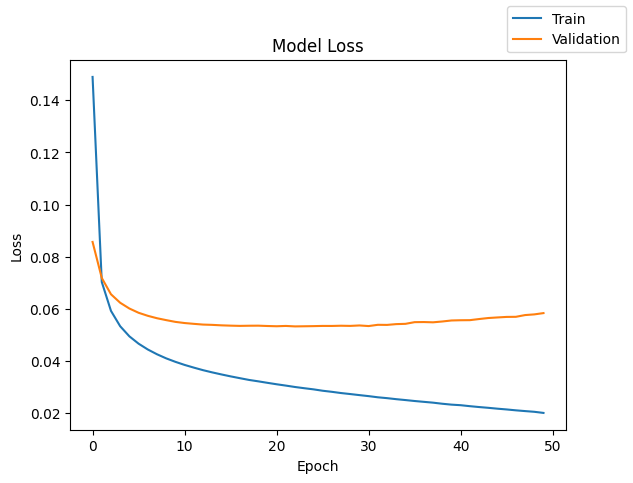

In [49]:
#plot model's loss
plot(history, 'loss')

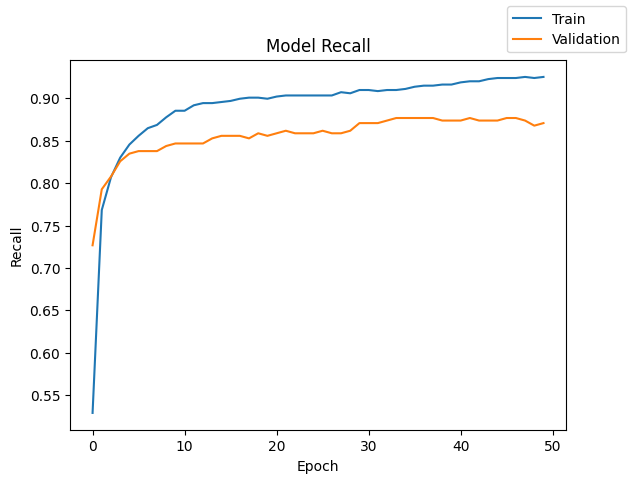

In [50]:
#plot model's recall
plot(history,'recall')

* We see steep drops in loss until about the 5th or 6th epoch, then the decreases are less steep
* Meantime, training loss continues to drop, though less quickly -- meaning we could be overfitting after this point
* Regarding recall, both training and validation show dramatic increases until about the 4th epoch
* After that, validation starts to plateau and oscillate, though it generally increases until about the 30th epoch, before generally levelling off
* Training continues to improve, though at a slower rate

In [215]:
model_3_train_perf = model_performance_classification(model3, X_train, y_train)
model_3_train_perf


438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step


Accuracy    Recall  Precision  F1 Score
0  0.995643  0.961958    0.99639  0.978475

In [216]:
model_3_val_perf = model_performance_classification(model3, X_val, y_val)
model_3_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step


Accuracy    Recall  Precision  F1 Score
0  0.990833  0.934377   0.976359  0.954273

In [52]:
#add model to our results df
results.loc[3] = [
  2, #hidden layers
  [64,128],#neurons layer
  ["relu","relu"], #activation function
  epochs, #epochs
  batch_size, #batch size
  "SGD with mom", #optimizer
  [0.001,0.9], # learning rate, momentum
  ["Xav", "Xav", "Xav"], #weight initializer
  "-", #regularization
  history.history["loss"][-1], #train loss
  history.history["val_loss"][-1], #val loss
  history.history["recall"][-1], #train recall
  history.history["val_recall"][-1], #val recall
  round(end-start,2) #trt
  ]
results

# hidden layers # neurons - hidden layer  \
0                1                       64   
1                2                [64, 128]   
2                2                 [64, 64]   
3                2                [64, 128]   

  activation function - hidden layer   # epochs  batch size     optimizer  \
0                                relu        50         100           SGD   
1                        [relu, relu]        50         100           SGD   
2                        [relu, tanh]        50         100           SGD   
3                        [relu, relu]        50         100  SGD with mom   

  learning rate, momentum weight initializer regularization  train loss  \
0              [0.001, -]                  -              -    0.051616   
1              [0.001, -]    [Xav, Xav, Xav]              -    0.043756   
2              [0.001, -]    [Xav, Xav, Xav]              -    0.042877   
3            [0.001, 0.9]    [Xav, Xav, Xav]              -    0.019997   

   validation loss  train recall  validation recall  time (secs)  
0         0.066721      0.832690           0.804805        14.10  
1         0.060069      0.858430           0.840841        14.28  
2         0.054599      0.848134           0.828829        14.53  
3         0.058326      0.925354           0.870871        16.27



```
# This is formatted as code
```

## Model 4

##Plan:

* Two hidden layers -- 64, 128
* activation function -- relu, relu
* SGD optimizer with momentum
* Reduced learning rate of 1e-4, and increase epochs to 100

In [53]:
#initialize model

#clear keras session
tf.keras.backend.clear_session()

#initialize neural network
model4 = Sequential()

#hidden layer
model4.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))

#hidden layer
model4.add(Dense(128, activation = 'relu'))

#output layer -- one node for binary target variable, and sigmoid for a binary classification problem
model4.add(Dense(1, activation = 'sigmoid'))

In [54]:
#looking at model details
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,073 (43.25 KB)

 Trainable params: 11,073 (43.25 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
#defining optimizer
lr = 1e-4
mom = 0.9
optimizer = keras.optimizers.SGD(momentum = mom, learning_rate = lr)

#compile model, set optimizer and loss function -- binary crossentropy for binary target variable, with recall as metric
model4.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['recall'])

In [56]:
#defining batch size and epochs
batch_size = 100
epochs = 50

#fitting model
start = time.time()
history = model4.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = batch_size, epochs = epochs, verbose = 2)
end = time.time()

Epoch 1/50
140/140 - 1s - 6ms/step - loss: 0.3403 - recall: 0.1879 - val_loss: 0.1945 - val_recall: 0.0270
Epoch 2/50
140/140 - 0s - 2ms/step - loss: 0.1839 - recall: 0.0322 - val_loss: 0.1769 - val_recall: 0.0330
Epoch 3/50
140/140 - 0s - 2ms/step - loss: 0.1713 - recall: 0.0528 - val_loss: 0.1674 - val_recall: 0.0631
Epoch 4/50
140/140 - 0s - 2ms/step - loss: 0.1627 - recall: 0.0798 - val_loss: 0.1601 - val_recall: 0.1141
Epoch 5/50
140/140 - 0s - 2ms/step - loss: 0.1559 - recall: 0.1171 - val_loss: 0.1542 - val_recall: 0.1441
Epoch 6/50
140/140 - 0s - 2ms/step - loss: 0.1502 - recall: 0.1660 - val_loss: 0.1493 - val_recall: 0.1712
Epoch 7/50
140/140 - 0s - 2ms/step - loss: 0.1453 - recall: 0.1995 - val_loss: 0.1450 - val_recall: 0.2012
Epoch 8/50
140/140 - 0s - 2ms/step - loss: 0.1411 - recall: 0.2317 - val_loss: 0.1413 - val_recall: 0.2312
Epoch 9/50
140/140 - 0s - 2ms/step - loss: 0.1374 - recall: 0.2728 - val_loss: 0.1379 - val_recall: 0.2583
Epoch 10/50
140/140 - 0s - 2ms/step -

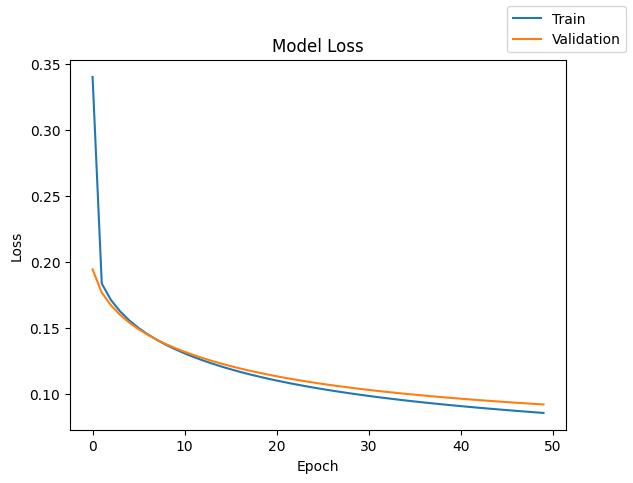

In [57]:
#plot model's loss
plot(history, 'loss')

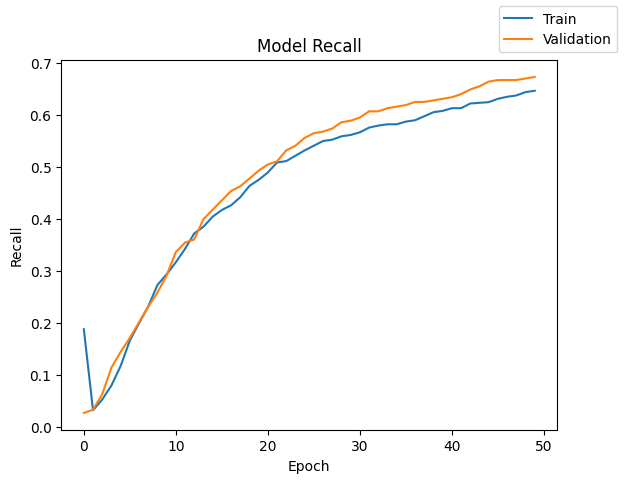

In [59]:
#plot model's recall
plot(history,'recall')

**Observations:**

*   (Write down your observations here)

In [178]:
model_4_train_perf = model_performance_classification(model4, X_train, y_train)
model_4_train_perf



438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step


Accuracy    Recall  Precision  F1 Score
0  0.978571  0.822092   0.966075  0.879351

In [180]:
model_4_val_perf=model_performance_classification(model4, X_val, y_val)
model_4_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


Accuracy    Recall  Precision  F1 Score
0  0.978833  0.834748   0.953345  0.884007

In [61]:
#add model to our results df
results.loc[4] = [
  2, #hidden layers
  [64, 128], #neurons/layer
  ["relu", "relu"], #activation function
  epochs, #epochs
  batch_size, #batch size
  "SGD with mom", #optimizer
  [0.0001, 0.9], # learning rate, momentum
  ["Xav", "Xav", "Xav"], #weight initializer
  "-", #regularization
  history.history["loss"][-1], #train loss
  history.history["val_loss"][-1], #val loss
  history.history["recall"][-1], #train recall
  history.history["val_recall"][-1], #val recall
  round(end-start,2) #trt
  ]
results

# hidden layers # neurons - hidden layer  \
0                1                       64   
1                2                [64, 128]   
2                2                 [64, 64]   
3                2                [64, 128]   
4                2                [64, 128]   

  activation function - hidden layer   # epochs  batch size     optimizer  \
0                                relu        50         100           SGD   
1                        [relu, relu]        50         100           SGD   
2                        [relu, tanh]        50         100           SGD   
3                        [relu, relu]        50         100  SGD with mom   
4                        [relu, relu]        50         100  SGD with mom   

  learning rate, momentum weight initializer regularization  train loss  \
0              [0.001, -]                  -              -    0.051616   
1              [0.001, -]    [Xav, Xav, Xav]              -    0.043756   
2              [0.001, -]    [Xav, Xav, Xav]              -    0.042877   
3            [0.001, 0.9]    [Xav, Xav, Xav]              -    0.019997   
4           [0.0001, 0.9]    [Xav, Xav, Xav]              -    0.085880   

   validation loss  train recall  validation recall  time (secs)  
0         0.066721      0.832690           0.804805        14.10  
1         0.060069      0.858430           0.840841        14.28  
2         0.054599      0.848134           0.828829        14.53  
3         0.058326      0.925354           0.870871        16.27  
4         0.092282      0.646075           0.672673        15.04

## Model 5

Plan:

* Two hidden layers -- 64, 128
* activation function -- relu, relu
* Adam optimizer

In [62]:
#initialize model

#clear keras session
tf.keras.backend.clear_session()

#initialize neural network
model5 = Sequential()

#hidden layer
model5.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))

#hidden layer
model5.add(Dense(128, activation = 'relu'))

#output layer -- one node for binary target variable, and sigmoid for a binary classification problem
model5.add(Dense(1, activation = 'sigmoid'))

In [63]:
model5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,073 (43.25 KB)

 Trainable params: 11,073 (43.25 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
#defining optimizer
optimizer = keras.optimizers.Adam()

#compile model, set optimizer and loss function -- binary crossentropy for binary target variable, with recall as metric
model5.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['recall'])

In [65]:
#defining batch size and epochs
batch_size = 100
epochs = 50

#fitting model
start = time.time()
history = model5.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = batch_size, epochs = epochs, verbose = 2)
end=time.time()

Epoch 1/50
140/140 - 1s - 8ms/step - loss: 0.1239 - recall: 0.5071 - val_loss: 0.0786 - val_recall: 0.7658
Epoch 2/50
140/140 - 0s - 2ms/step - loss: 0.0620 - recall: 0.8005 - val_loss: 0.0637 - val_recall: 0.8138
Epoch 3/50
140/140 - 0s - 2ms/step - loss: 0.0508 - recall: 0.8520 - val_loss: 0.0600 - val_recall: 0.8318
Epoch 4/50
140/140 - 0s - 2ms/step - loss: 0.0456 - recall: 0.8700 - val_loss: 0.0585 - val_recall: 0.8318
Epoch 5/50
140/140 - 0s - 2ms/step - loss: 0.0421 - recall: 0.8739 - val_loss: 0.0579 - val_recall: 0.8348
Epoch 6/50
140/140 - 0s - 2ms/step - loss: 0.0396 - recall: 0.8829 - val_loss: 0.0577 - val_recall: 0.8408
Epoch 7/50
140/140 - 0s - 2ms/step - loss: 0.0376 - recall: 0.8893 - val_loss: 0.0580 - val_recall: 0.8438
Epoch 8/50
140/140 - 0s - 2ms/step - loss: 0.0360 - recall: 0.8932 - val_loss: 0.0579 - val_recall: 0.8468
Epoch 9/50
140/140 - 0s - 2ms/step - loss: 0.0347 - recall: 0.8945 - val_loss: 0.0583 - val_recall: 0.8529
Epoch 10/50
140/140 - 0s - 2ms/step -

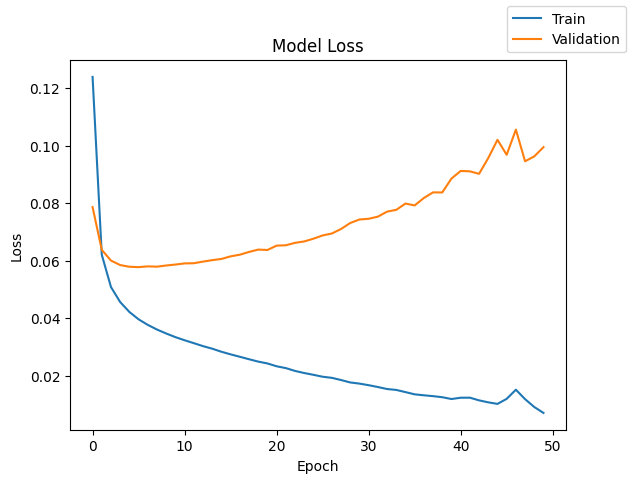

In [66]:
#plot model's loss
plot(history, 'loss')

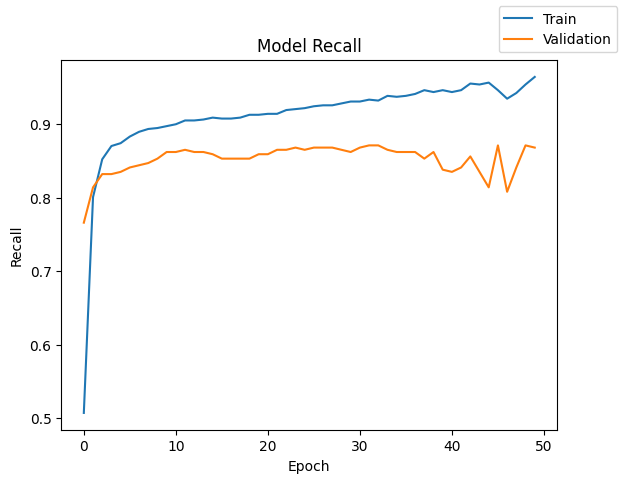

In [67]:
#plot model's recall
plot(history, 'recall')

* There is a big gap between training and validation loss-- validation drops until about the 4th epoch, then increases gradually before oscillating and increasing even more at 35 epochs
* Meantime, training loss keeps falling all the way to 50 epochs
* For recall, training increases gradually until about 4 epochs, then continues increasing gradually
* Validation recall increases greatly until about 4 epochs, then has slowing increases before oscillating after 10 epochs, then dropping a bit until 42 epochs and increasing again
* The large gaps and zig-zagging may be signs of overfitting

In [68]:
#add model to our results df
results.loc[5] = [
  2, #hidden layers
  [64, 128], #neurons/layer
  ["relu", "relu"], #activation function
  epochs, #epochs
  batch_size, #batch size
  "Adam", #optimizer
  [0.001,"-"], # learning rate, momentum
  ["Xav", "Xav", "Xav"], #weight initializer
  "-", #regularization
  history.history["loss"][-1], #train loss
  history.history["val_loss"][-1], #val loss
  history.history["recall"][-1], #train recall
  history.history["val_recall"][-1], #val recall
  round(end-start,2) #trt
  ]
results

# hidden layers # neurons - hidden layer  \
0                1                       64   
1                2                [64, 128]   
2                2                 [64, 64]   
3                2                [64, 128]   
4                2                [64, 128]   
5                2                [64, 128]   

  activation function - hidden layer   # epochs  batch size     optimizer  \
0                                relu        50         100           SGD   
1                        [relu, relu]        50         100           SGD   
2                        [relu, tanh]        50         100           SGD   
3                        [relu, relu]        50         100  SGD with mom   
4                        [relu, relu]        50         100  SGD with mom   
5                        [relu, relu]        50         100          Adam   

  learning rate, momentum weight initializer regularization  train loss  \
0              [0.001, -]                  -              -    0.051616   
1              [0.001, -]    [Xav, Xav, Xav]              -    0.043756   
2              [0.001, -]    [Xav, Xav, Xav]              -    0.042877   
3            [0.001, 0.9]    [Xav, Xav, Xav]              -    0.019997   
4           [0.0001, 0.9]    [Xav, Xav, Xav]              -    0.085880   
5              [0.001, -]    [Xav, Xav, Xav]              -    0.007018   

   validation loss  train recall  validation recall  time (secs)  
0         0.066721      0.832690           0.804805        14.10  
1         0.060069      0.858430           0.840841        14.28  
2         0.054599      0.848134           0.828829        14.53  
3         0.058326      0.925354           0.870871        16.27  
4         0.092282      0.646075           0.672673        15.04  
5         0.099477      0.963964           0.867868        15.84

In [181]:
model_5_train_perf = model_performance_classification(model5, X_train, y_train)
model_5_train_perf


438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step


Accuracy    Recall  Precision  F1 Score
0  0.997786  0.980657     0.9982  0.989251

In [182]:
model_5_val_perf = model_performance_classification(model5, X_val, y_val)
model_5_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step


Accuracy    Recall  Precision  F1 Score
0     0.992  0.933581   0.989319  0.959551

## Model 6

Plan:

* Two hidden layers -- 64, 128
* activation function -- relu, relu
* Adam optimizer
* Reduced learning rate of 1e-4 and increase epochs to 100

In [70]:
#initialize model

#clear keras session
tf.keras.backend.clear_session()

#initialize neural network
model6 = Sequential()

#hidden layer
model6.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))

#hidden layer
model6.add(Dense(128, activation = 'relu'))

#output layer -- one node for binary target variable, and sigmoid for a binary classification problem
model6.add(Dense(1, activation = 'sigmoid'))

In [71]:
#looking at model details
model6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,073 (43.25 KB)

 Trainable params: 11,073 (43.25 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
#defining optimizer
lr = 1e-4
optimizer = keras.optimizers.Adam(learning_rate = lr)

#compile model, set optimizer and loss function -- binary crossentropy for binary target variable, with recall as metric
model6.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['recall'])

In [73]:
#defining batch size and epochs
batch_size = 100
epochs = 100

#fitting model
start = time.time()
history = model6.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = batch_size, epochs = epochs, verbose = 2)
end=time.time()

Epoch 1/100
140/140 - 1s - 8ms/step - loss: 0.4065 - recall: 0.1596 - val_loss: 0.1999 - val_recall: 0.0390
Epoch 2/100
140/140 - 0s - 2ms/step - loss: 0.1727 - recall: 0.1429 - val_loss: 0.1507 - val_recall: 0.2583
Epoch 3/100
140/140 - 0s - 2ms/step - loss: 0.1360 - recall: 0.3192 - val_loss: 0.1256 - val_recall: 0.4084
Epoch 4/100
140/140 - 0s - 3ms/step - loss: 0.1140 - recall: 0.4556 - val_loss: 0.1095 - val_recall: 0.5195
Epoch 5/100
140/140 - 0s - 3ms/step - loss: 0.0993 - recall: 0.5444 - val_loss: 0.0984 - val_recall: 0.6156
Epoch 6/100
140/140 - 0s - 3ms/step - loss: 0.0889 - recall: 0.6165 - val_loss: 0.0906 - val_recall: 0.6607
Epoch 7/100
140/140 - 1s - 5ms/step - loss: 0.0814 - recall: 0.6602 - val_loss: 0.0850 - val_recall: 0.6817
Epoch 8/100
140/140 - 0s - 3ms/step - loss: 0.0758 - recall: 0.7027 - val_loss: 0.0809 - val_recall: 0.7147
Epoch 9/100
140/140 - 0s - 2ms/step - loss: 0.0715 - recall: 0.7246 - val_loss: 0.0777 - val_recall: 0.7477
Epoch 10/100
140/140 - 0s - 

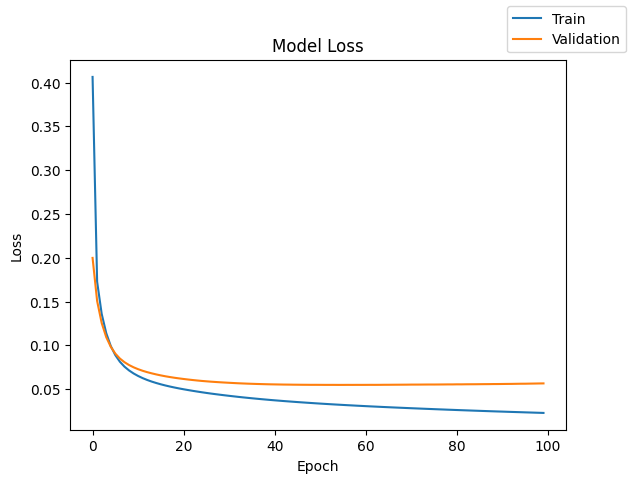

In [74]:
#plot model's loss
plot(history, 'loss')

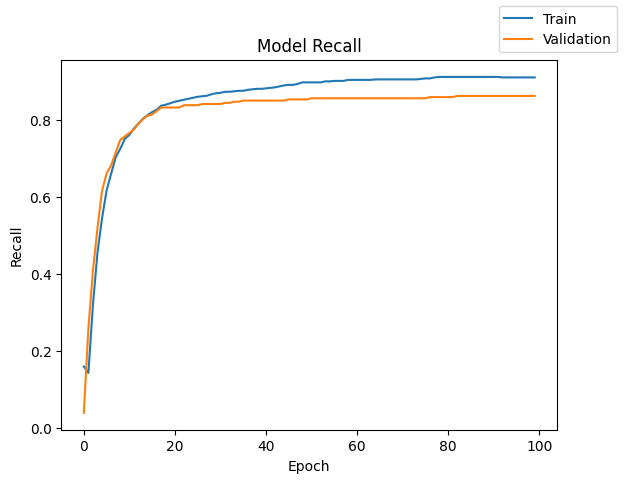

In [75]:
#plot model's recall
plot(history, 'recall')

In [183]:
model_6_train_perf = model_performance_classification(model6, X_train, y_train)
model_6_train_perf


438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step


Accuracy    Recall  Precision  F1 Score
0  0.994786  0.956053    0.99394  0.974143

In [184]:
model_6_val_perf = model_performance_classification(model6, X_val, y_val)
model_6_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


Accuracy    Recall  Precision  F1 Score
0  0.990667  0.930049   0.979132  0.953093

#Model 7

Plan:

* Two hidden layers -- 64, 128
* activation function -- relu, relu
* Adam optimizer
* Reduced learning rate of 1e-4 and increase epochs to 100
* Dropout of 0.2

In [78]:
#setting the dropout rate
dropout_rate = 0.2

In [79]:
#initialize model

#clear keras session
tf.keras.backend.clear_session()

#initialize neural network
model7 = Sequential()

#hidden layer
model7.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))

#dropout layer
model7.add(Dropout(dropout_rate))

#hidden layer
model7.add(Dense(128, activation = 'relu'))

#output layer -- one node for binary target variable, and sigmoid for a binary classification problem
model7.add(Dense(1, activation = 'sigmoid'))

In [80]:
#looking at model details
model7.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,073 (43.25 KB)

 Trainable params: 11,073 (43.25 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
#defining optimizer
lr = 1e-4
optimizer = keras.optimizers.Adam(learning_rate = lr)

#compile model, set optimizer and loss function -- binary crossentropy for binary target variable, with recall as metric
model7.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['recall'])

In [82]:
#defining batch size and epochs
batch_size = 100
epochs = 100

#fitting model
start = time.time()
history = model7.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = batch_size, epochs = epochs, verbose = 2)
end=time.time()

Epoch 1/100
140/140 - 1s - 9ms/step - loss: 0.2993 - recall: 0.1236 - val_loss: 0.1716 - val_recall: 0.1111
Epoch 2/100
140/140 - 0s - 2ms/step - loss: 0.1630 - recall: 0.2046 - val_loss: 0.1365 - val_recall: 0.3063
Epoch 3/100
140/140 - 0s - 2ms/step - loss: 0.1385 - recall: 0.3295 - val_loss: 0.1195 - val_recall: 0.3964
Epoch 4/100
140/140 - 0s - 2ms/step - loss: 0.1243 - recall: 0.3977 - val_loss: 0.1071 - val_recall: 0.4715
Epoch 5/100
140/140 - 0s - 2ms/step - loss: 0.1100 - recall: 0.4672 - val_loss: 0.0980 - val_recall: 0.5676
Epoch 6/100
140/140 - 0s - 2ms/step - loss: 0.1018 - recall: 0.5380 - val_loss: 0.0913 - val_recall: 0.6396
Epoch 7/100
140/140 - 0s - 2ms/step - loss: 0.0969 - recall: 0.5882 - val_loss: 0.0861 - val_recall: 0.6757
Epoch 8/100
140/140 - 0s - 2ms/step - loss: 0.0905 - recall: 0.6332 - val_loss: 0.0821 - val_recall: 0.7027
Epoch 9/100
140/140 - 0s - 2ms/step - loss: 0.0855 - recall: 0.6589 - val_loss: 0.0793 - val_recall: 0.7327
Epoch 10/100
140/140 - 0s - 

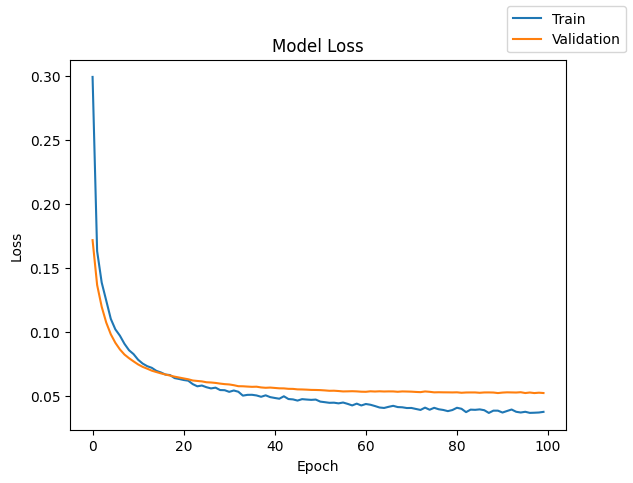

In [83]:
#plot model's loss
plot(history, 'loss')


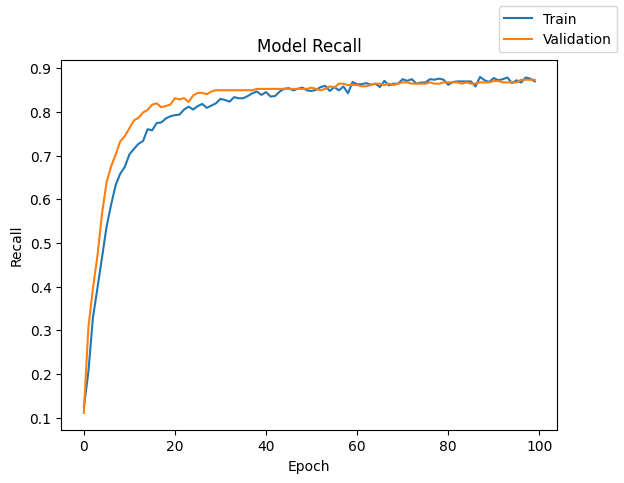

In [84]:
#plot model's recall
plot(history,'recall')

* We see dramatic drops in loss for both training and validation until the 7th epoch, steady decreases until the 20th epoch, then a flattening trend
* Validation loss is mostly the same as training loss until about the 20th epoch, then remains consistently higher
* Training loss oscillates quite a bit, but validation does not
* For recall, both validation and training see dramatic increases until about 17th epoch, then validation remains higher than training until about the 42nd epoch, when both are mostly the same
* Training recall oscillates much more than validation

In [85]:
#add model to our results df
results.loc[7] = [
  2, #hidden layers
  [64, 128], #neurons/layer
  ["relu", "relu"], #activation function
  epochs, #epochs
  batch_size, #batch size
  "Adam", #optimizer
  [0.0001, "-"], # learning rate, momentum
  ["Xav", "Xav", "Xav"], #weight initializer
  "Dropout (0.2)", #regularization
  history.history["loss"][-1], #train loss
  history.history["val_loss"][-1], #val loss
  history.history["recall"][-1], #train recall
  history.history["val_recall"][-1], #val recall
  round(end-start,2) #trt
  ]
results

# hidden layers # neurons - hidden layer  \
0                1                       64   
1                2                [64, 128]   
2                2                 [64, 64]   
3                2                [64, 128]   
4                2                [64, 128]   
5                2                [64, 128]   
6                2                [64, 128]   
7                2                [64, 128]   

  activation function - hidden layer   # epochs  batch size     optimizer  \
0                                relu        50         100           SGD   
1                        [relu, relu]        50         100           SGD   
2                        [relu, tanh]        50         100           SGD   
3                        [relu, relu]        50         100  SGD with mom   
4                        [relu, relu]        50         100  SGD with mom   
5                        [relu, relu]        50         100          Adam   
6                        [relu, relu]       100         100          Adam   
7                        [relu, relu]       100         100          Adam   

  learning rate, momentum weight initializer regularization  train loss  \
0              [0.001, -]                  -              -    0.051616   
1              [0.001, -]    [Xav, Xav, Xav]              -    0.043756   
2              [0.001, -]    [Xav, Xav, Xav]              -    0.042877   
3            [0.001, 0.9]    [Xav, Xav, Xav]              -    0.019997   
4           [0.0001, 0.9]    [Xav, Xav, Xav]              -    0.085880   
5              [0.001, -]    [Xav, Xav, Xav]              -    0.007018   
6             [0.0001, -]    [Xav, Xav, Xav]              -    0.022984   
7             [0.0001, -]    [Xav, Xav, Xav]  Dropout (0.2)    0.037275   

   validation loss  train recall  validation recall  time (secs)  
0         0.066721      0.832690           0.804805        14.10  
1         0.060069      0.858430           0.840841        14.28  
2         0.054599      0.848134           0.828829        14.53  
3         0.058326      0.925354           0.870871        16.27  
4         0.092282      0.646075           0.672673        15.04  
5         0.099477      0.963964           0.867868        15.84  
6         0.056675      0.909910           0.861862        31.01  
7         0.052004      0.870013           0.873874        31.34

In [206]:
model_7_train_perf = model_performance_classification(model7, X_train, y_train)
model_7_train_perf


438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step


Accuracy    Recall  Precision  F1 Score
0     0.994  0.951397   0.990849   0.97019

In [186]:
model_7_val_perf = model_performance_classification(model7, X_val, y_val)
model_7_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step


Accuracy    Recall  Precision  F1 Score
0  0.991667  0.936231   0.982939  0.958244

# Model 8

Plan:

* Two hidden layers -- 64, 128
* activation function -- relu, relu
* Adam optimizer
* Reduced learning rate of 1e-4 and increase epochs to 100
* Dropout of 0.2
* Batch normalization

In [87]:
#setting the dropout rate
dropout_rate = 0.2

In [88]:
#initialize model

#clear keras session
tf.keras.backend.clear_session()

#initialize neural network
model8 = Sequential()

#hidden layer
model8.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))

#batch normalization
model8.add(BatchNormalization())

#dropout layer
model8.add(Dropout(dropout_rate))

#hidden layer
model8.add(Dense(128, activation = 'relu'))

#output layer -- one node for binary target variable, and sigmoid for a binary classification problem
model8.add(Dense(1, activation = 'sigmoid'))

In [89]:
#looking at model details
model8.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,329 (44.25 KB)

 Trainable params: 11,201 (43.75 KB)

 Non-trainable params: 128 (512.00 B)

In [90]:
#defining optimizer
lr = 1e-4
optimizer = keras.optimizers.Adam(learning_rate = lr)

#compile model, set optimizer and loss function -- binary crossentropy for binary target variable, with recall as metric
model8.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['recall'])

In [91]:
#defining batch size and epochs
batch_size = 100
epochs = 100

#fitting model
start = time.time()
history = model8.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = batch_size, epochs = epochs, verbose = 2)
end=time.time()


Epoch 1/100
140/140 - 1s - 10ms/step - loss: 0.3129 - recall: 0.2857 - val_loss: 0.2006 - val_recall: 0.2943
Epoch 2/100
140/140 - 0s - 2ms/step - loss: 0.1763 - recall: 0.3012 - val_loss: 0.1409 - val_recall: 0.3904
Epoch 3/100
140/140 - 0s - 2ms/step - loss: 0.1358 - recall: 0.3848 - val_loss: 0.1139 - val_recall: 0.4895
Epoch 4/100
140/140 - 0s - 2ms/step - loss: 0.1145 - recall: 0.4582 - val_loss: 0.0992 - val_recall: 0.5556
Epoch 5/100
140/140 - 0s - 2ms/step - loss: 0.1007 - recall: 0.5109 - val_loss: 0.0892 - val_recall: 0.6216
Epoch 6/100
140/140 - 0s - 2ms/step - loss: 0.0915 - recall: 0.5779 - val_loss: 0.0825 - val_recall: 0.6607
Epoch 7/100
140/140 - 0s - 2ms/step - loss: 0.0843 - recall: 0.6023 - val_loss: 0.0775 - val_recall: 0.6877
Epoch 8/100
140/140 - 0s - 2ms/step - loss: 0.0791 - recall: 0.6371 - val_loss: 0.0736 - val_recall: 0.7087
Epoch 9/100
140/140 - 0s - 2ms/step - loss: 0.0764 - recall: 0.6628 - val_loss: 0.0704 - val_recall: 0.7327
Epoch 10/100
140/140 - 0s -

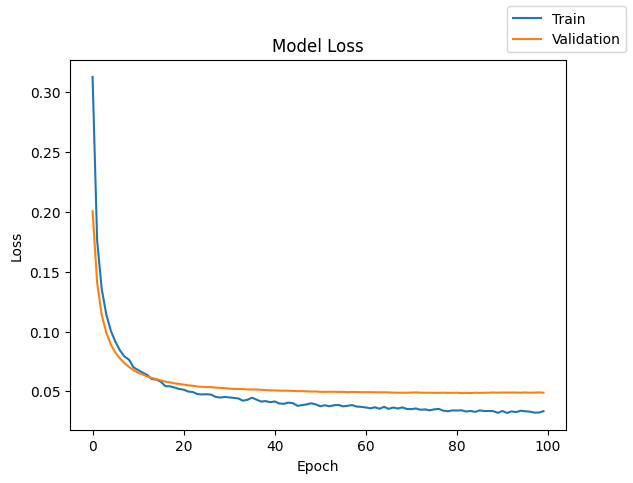

In [92]:
#plot model's loss
plot(history, 'loss')

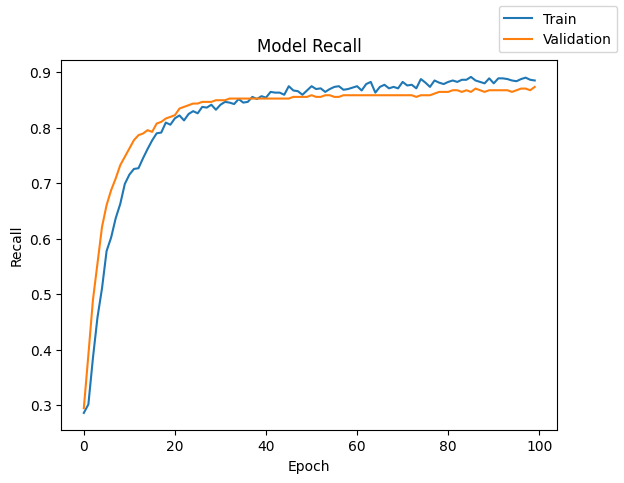

In [93]:
#plot model's recall
plot(history,'recall')


* We see dramatic drops in loss until about the 8th epoch, then we mostly * flatten out after the 20th epoch
* Validation loss is lower than training loss until about 18th epoch, then it remains higher -- but the gap is slim
* For recall, we see more oscillation in training than validation
* Both have dramatic increases until the 18th epoch before slowing down and flattening
* Validation recall remains higher until about the 38th epoch, when training recall remains higher

In [94]:
#add model to our results df
results.loc[8] = [
  2, #hidden layers
  [64, 128], #neurons/layer
  ["relu", "relu"], #activation function
  epochs, #epochs
  batch_size, #batch size
  "Adam", #optimizer
  [0.0001, "-"], # learning rate, momentum
  ["Xav", "Xav", "Xav"], #weight initializer
  ["Batch norm", "Dropout (0.2)"], #regularization
  history.history["loss"][-1], #train loss
  history.history["val_loss"][-1], #val loss
  history.history["recall"][-1], #train recall
  history.history["val_recall"][-1], #val recall
  round(end-start,2) #trt
  ]
results

# hidden layers # neurons - hidden layer  \
0                1                       64   
1                2                [64, 128]   
2                2                 [64, 64]   
3                2                [64, 128]   
4                2                [64, 128]   
5                2                [64, 128]   
6                2                [64, 128]   
7                2                [64, 128]   
8                2                [64, 128]   

  activation function - hidden layer   # epochs  batch size     optimizer  \
0                                relu        50         100           SGD   
1                        [relu, relu]        50         100           SGD   
2                        [relu, tanh]        50         100           SGD   
3                        [relu, relu]        50         100  SGD with mom   
4                        [relu, relu]        50         100  SGD with mom   
5                        [relu, relu]        50         100          Adam   
6                        [relu, relu]       100         100          Adam   
7                        [relu, relu]       100         100          Adam   
8                        [relu, relu]       100         100          Adam   

  learning rate, momentum weight initializer               regularization  \
0              [0.001, -]                  -                            -   
1              [0.001, -]    [Xav, Xav, Xav]                            -   
2              [0.001, -]    [Xav, Xav, Xav]                            -   
3            [0.001, 0.9]    [Xav, Xav, Xav]                            -   
4           [0.0001, 0.9]    [Xav, Xav, Xav]                            -   
5              [0.001, -]    [Xav, Xav, Xav]                            -   
6             [0.0001, -]    [Xav, Xav, Xav]                            -   
7             [0.0001, -]    [Xav, Xav, Xav]                Dropout (0.2)   
8             [0.0001, -]    [Xav, Xav, Xav]  [Batch norm, Dropout (0.2)]   

   train loss  validation loss  train recall  validation recall  time (secs)  
0    0.051616         0.066721      0.832690           0.804805        14.10  
1    0.043756         0.060069      0.858430           0.840841        14.28  
2    0.042877         0.054599      0.848134           0.828829        14.53  
3    0.019997         0.058326      0.925354           0.870871        16.27  
4    0.085880         0.092282      0.646075           0.672673        15.04  
5    0.007018         0.099477      0.963964           0.867868        15.84  
6    0.022984         0.056675      0.909910           0.861862        31.01  
7    0.037275         0.052004      0.870013           0.873874        31.34  
8    0.033385         0.048827      0.885457           0.873874        35.42

In [187]:
model_8_train_perf = model_performance_classification(model8, X_train, y_train)
model_8_train_perf


438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step


Accuracy    Recall  Precision  F1 Score
0  0.994071  0.952041   0.990895  0.970564

In [188]:
model_8_val_perf = model_performance_classification(model8, X_val, y_val)
model_8_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step


Accuracy    Recall  Precision  F1 Score
0    0.9915  0.936143   0.981316  0.957472

#Model 9

Plan:

* Adjusting class weights for imbalanced class distribution
* Two hidden layers -- 64, 128
* activation function -- relu, relu
* Adam optimizer
* Reduced learning rate of 1e-4 and increase epochs to 100
* Dropout of 0.2
* Batch normalization

In [96]:
#calculate class weights
cw = (y_train.shape[0]) / np.bincount(y_train)

#create a dictionary with class indices and their weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: np.float64(1.0587612493382743), 1: np.float64(18.01801801801802)}

In [97]:
#setting the dropout rate
dropout_rate = 0.2

In [98]:
#initialize model

#clear keras session
tf.keras.backend.clear_session()

#initialize neural network
model9 = Sequential()

#hidden layer
model9.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))

#batch normalization
model9.add(BatchNormalization())

#dropout layer
model9.add(Dropout(dropout_rate))

#hidden layer
model9.add(Dense(128, activation = 'relu'))

#output layer -- one node for binary target variable, and sigmoid for a binary classification problem
model9.add(Dense(1, activation = 'sigmoid'))

In [99]:
#looking at model details
model9.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,329 (44.25 KB)

 Trainable params: 11,201 (43.75 KB)

 Non-trainable params: 128 (512.00 B)

In [100]:
#defining optimizer
lr = 1e-4
optimizer = keras.optimizers.Adam(learning_rate = lr)

#compile model, set optimizer and loss function -- binary crossentropy for binary target variable, with recall as metric
model9.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['recall'])

In [101]:
#defining batch size and epochs
batch_size = 100
epochs = 100

#fitting model
start = time.time()
history = model9.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = batch_size, epochs = epochs, class_weight = cw_dict, verbose = 2)
end=time.time()

Epoch 1/100
140/140 - 1s - 11ms/step - loss: 1.1896 - recall: 0.7439 - val_loss: 0.5574 - val_recall: 0.7988
Epoch 2/100
140/140 - 0s - 2ms/step - loss: 0.8693 - recall: 0.8391 - val_loss: 0.4032 - val_recall: 0.8138
Epoch 3/100
140/140 - 1s - 4ms/step - loss: 0.7422 - recall: 0.8584 - val_loss: 0.3318 - val_recall: 0.8348
Epoch 4/100
140/140 - 0s - 2ms/step - loss: 0.6778 - recall: 0.8662 - val_loss: 0.2931 - val_recall: 0.8529
Epoch 5/100
140/140 - 0s - 2ms/step - loss: 0.6183 - recall: 0.8816 - val_loss: 0.2621 - val_recall: 0.8619
Epoch 6/100
140/140 - 0s - 2ms/step - loss: 0.5824 - recall: 0.8842 - val_loss: 0.2408 - val_recall: 0.8709
Epoch 7/100
140/140 - 0s - 2ms/step - loss: 0.5532 - recall: 0.8932 - val_loss: 0.2252 - val_recall: 0.8649
Epoch 8/100
140/140 - 0s - 2ms/step - loss: 0.5343 - recall: 0.8932 - val_loss: 0.2133 - val_recall: 0.8769
Epoch 9/100
140/140 - 0s - 2ms/step - loss: 0.5062 - recall: 0.9060 - val_loss: 0.2010 - val_recall: 0.8769
Epoch 10/100
140/140 - 0s -

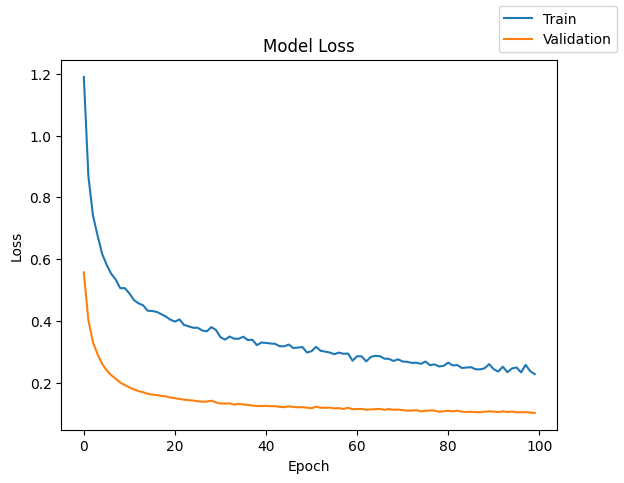

In [102]:
#plot model's loss
plot(history, 'loss')

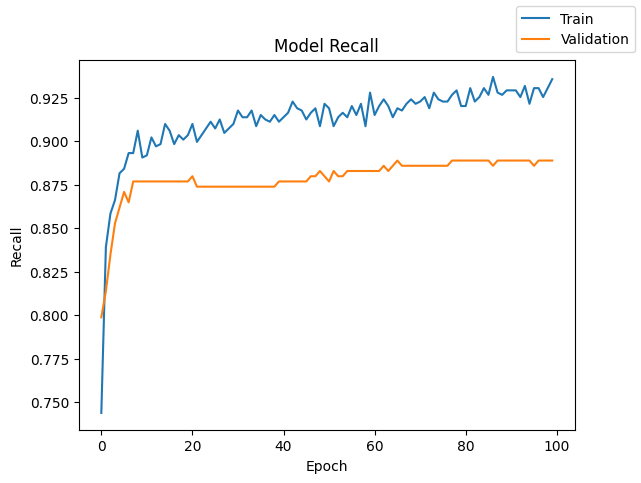

In [103]:
#plot model's recall
plot(history, 'recall')

* Training and validation loss fall dramatically until about the 10th epoch, then both slow down and plateau -- though the validation plateau is much flatter
* Validation loss is also lower than training loss
For recall, training sets see dramatic increases until about 8 epochs, then training keeps rising while oscillating
* Meantime, validation recall drops slightly before slight increases with plateaus and oscillations
* The gap between training and recall is wider

In [104]:
#add model to our results df
results.loc[9] = [
  2, #hidden layers
  [64, 128], #neurons/layer
  ["relu", "relu"], #activation function
  epochs, #epochs
  batch_size, #batch size
  "Adam", #optimizer
  [0.0001, "-"], # learning rate, momentum
  ["Xav", "Xav", "Xav"], #weight initializer
  ["Batch norm", "Dropout (0.2)", "Class weights"], #regularization
  history.history["loss"][-1], #train loss
  history.history["val_loss"][-1], #val loss
  history.history["recall"][-1], #train recall
  history.history["val_recall"][-1], #val recall
  round(end-start,2) #trt
  ]
results

# hidden layers # neurons - hidden layer  \
0                1                       64   
1                2                [64, 128]   
2                2                 [64, 64]   
3                2                [64, 128]   
4                2                [64, 128]   
5                2                [64, 128]   
6                2                [64, 128]   
7                2                [64, 128]   
8                2                [64, 128]   
9                2                [64, 128]   

  activation function - hidden layer   # epochs  batch size     optimizer  \
0                                relu        50         100           SGD   
1                        [relu, relu]        50         100           SGD   
2                        [relu, tanh]        50         100           SGD   
3                        [relu, relu]        50         100  SGD with mom   
4                        [relu, relu]        50         100  SGD with mom   
5                        [relu, relu]        50         100          Adam   
6                        [relu, relu]       100         100          Adam   
7                        [relu, relu]       100         100          Adam   
8                        [relu, relu]       100         100          Adam   
9                        [relu, relu]       100         100          Adam   

  learning rate, momentum weight initializer  \
0              [0.001, -]                  -   
1              [0.001, -]    [Xav, Xav, Xav]   
2              [0.001, -]    [Xav, Xav, Xav]   
3            [0.001, 0.9]    [Xav, Xav, Xav]   
4           [0.0001, 0.9]    [Xav, Xav, Xav]   
5              [0.001, -]    [Xav, Xav, Xav]   
6             [0.0001, -]    [Xav, Xav, Xav]   
7             [0.0001, -]    [Xav, Xav, Xav]   
8             [0.0001, -]    [Xav, Xav, Xav]   
9             [0.0001, -]    [Xav, Xav, Xav]   

                               regularization  train loss  validation loss  \
0                                           -    0.051616         0.066721   
1                                           -    0.043756         0.060069   
2                                           -    0.042877         0.054599   
3                                           -    0.019997         0.058326   
4                                           -    0.085880         0.092282   
5                                           -    0.007018         0.099477   
6                                           -    0.022984         0.056675   
7                               Dropout (0.2)    0.037275         0.052004   
8                 [Batch norm, Dropout (0.2)]    0.033385         0.048827   
9  [Batch norm, Dropout (0.2), Class weights]    0.228398         0.102819   

   train recall  validation recall  time (secs)  
0      0.832690           0.804805        14.10  
1      0.858430           0.840841        14.28  
2      0.848134           0.828829        14.53  
3      0.925354           0.870871        16.27  
4      0.646075           0.672673        15.04  
5      0.963964           0.867868        15.84  
6      0.909910           0.861862        31.01  
7      0.870013           0.873874        31.34  
8      0.885457           0.873874        35.42  
9      0.935650           0.888889        34.58

In [190]:
model_9_train_perf = model_performance_classification(model9, X_train, y_train)
model_9_train_perf


438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step


Accuracy    Recall  Precision  F1 Score
0  0.986929  0.962796   0.920772  0.940634

In [191]:
model_9_val_perf = model_performance_classification(model9, X_val, y_val)
model_9_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step


Accuracy    Recall  Precision  F1 Score
0    0.9815  0.937915   0.896714   0.91614

#Model 10

Plan:

* Adjusting class weights for imbalanced class distribution
* Two hidden layers -- 64, 128
* activation function -- relu, relu
* Adam optimizer
* Reduced learning rate of 1e-4 and increase epochs to 100
* Dropout of 0.2
* Batch normalization
* He initialization

In [106]:
#calculate class weights
cw = (y_train.shape[0]) / np.bincount(y_train)

#create a dictionary with class indices and their weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: np.float64(1.0587612493382743), 1: np.float64(18.01801801801802)}

In [107]:
#setting the dropout rate
dropout_rate = 0.2

In [108]:
#initialize model

#clear keras session
tf.keras.backend.clear_session()

#initialize neural network
model10 = Sequential()

#hidden layer
model10.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],), kernel_initializer = 'he_normal'))

#batch normalization
model10.add(BatchNormalization())

#dropout layer
model10.add(Dropout(dropout_rate))

#hidden layer
model10.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal'))

#output layer -- one node for binary target variable, and sigmoid for a binary classification problem
model10.add(Dense(1, activation = 'sigmoid')) #leaving default Xavier initialization for the output layer since it's sigmoid

In [109]:
#looking at model details
model10.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,329 (44.25 KB)

 Trainable params: 11,201 (43.75 KB)

 Non-trainable params: 128 (512.00 B)

In [110]:
#defining optimizer
lr = 1e-4
optimizer = keras.optimizers.Adam(learning_rate = lr)

#compile model, set optimizer and loss function -- binary crossentropy for binary target variable, with recall as metric
model10.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['recall'])

In [111]:
#defining batch size and epochs
batch_size = 100
epochs = 100

#fitting model
start = time.time()
history = model10.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = batch_size, epochs = epochs, class_weight = cw_dict, verbose = 2)
end=time.time()

Epoch 1/100
140/140 - 1s - 10ms/step - loss: 1.1740 - recall: 0.7490 - val_loss: 0.5815 - val_recall: 0.8048
Epoch 2/100
140/140 - 0s - 3ms/step - loss: 0.9178 - recall: 0.8237 - val_loss: 0.4536 - val_recall: 0.8408
Epoch 3/100
140/140 - 0s - 2ms/step - loss: 0.8096 - recall: 0.8378 - val_loss: 0.3854 - val_recall: 0.8408
Epoch 4/100
140/140 - 0s - 2ms/step - loss: 0.7260 - recall: 0.8571 - val_loss: 0.3466 - val_recall: 0.8498
Epoch 5/100
140/140 - 0s - 2ms/step - loss: 0.6946 - recall: 0.8571 - val_loss: 0.3157 - val_recall: 0.8498
Epoch 6/100
140/140 - 0s - 2ms/step - loss: 0.6504 - recall: 0.8674 - val_loss: 0.2941 - val_recall: 0.8619
Epoch 7/100
140/140 - 0s - 2ms/step - loss: 0.6329 - recall: 0.8597 - val_loss: 0.2770 - val_recall: 0.8619
Epoch 8/100
140/140 - 0s - 2ms/step - loss: 0.6073 - recall: 0.8752 - val_loss: 0.2653 - val_recall: 0.8649
Epoch 9/100
140/140 - 0s - 3ms/step - loss: 0.5907 - recall: 0.8790 - val_loss: 0.2542 - val_recall: 0.8679
Epoch 10/100
140/140 - 0s -

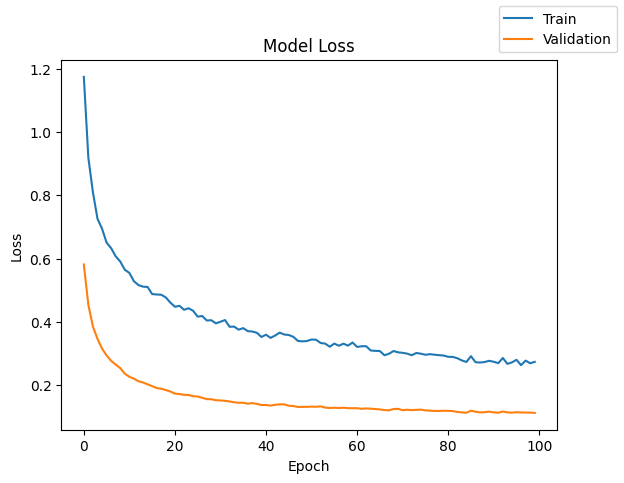

In [112]:
#plot model's loss
plot(history, 'loss')

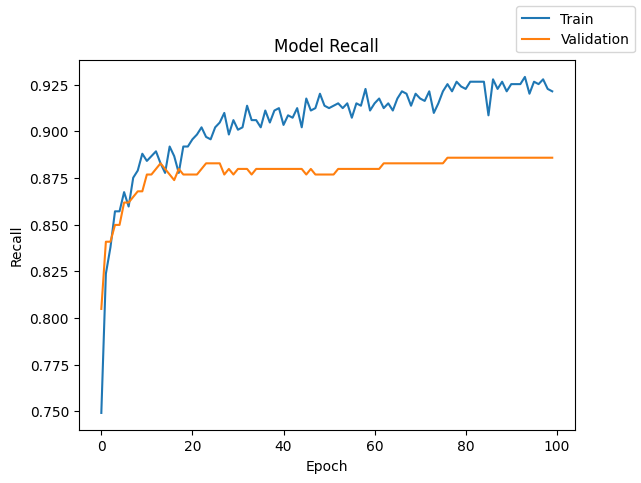

In [114]:
#plot model's recall
plot(history, 'recall')

* Validation and training loss fall dramatically until about the 10th epoch before slowing and plateauing
* Training loss oscillates a bit after that
* Validation loss remains consistently lower than training loss the whole time
* For recall, both see dramatic increases until the 10th epoch
* Then, training recall continues rising, with oscillations
*Validation recall continues rising less dramatically before mostly plateauing after the 20th epoch

In [115]:
#add model to our results df
results.loc[10] = [
  2, #hidden layers
  [64, 128], #neurons/layer
  ["relu", "relu"], #activation function
  epochs, #epochs
  batch_size, #batch size
  "Adam", #optimizer
  [0.0001, "-"], # learning rate, momentum
  ["He", "He", "Xav"], #weight initializer
  ["Batch norm", "Dropout (0.2), Class weights"], #regularization
  history.history["loss"][-1], #train loss
  history.history["val_loss"][-1], #val loss
  history.history["recall"][-1], #train recall
  history.history["val_recall"][-1], #val recall
  round(end-start,2) #trt
  ]
results

# hidden layers # neurons - hidden layer  \
0                 1                       64   
1                 2                [64, 128]   
2                 2                 [64, 64]   
3                 2                [64, 128]   
4                 2                [64, 128]   
5                 2                [64, 128]   
6                 2                [64, 128]   
7                 2                [64, 128]   
8                 2                [64, 128]   
9                 2                [64, 128]   
10                2                [64, 128]   

   activation function - hidden layer   # epochs  batch size     optimizer  \
0                                 relu        50         100           SGD   
1                         [relu, relu]        50         100           SGD   
2                         [relu, tanh]        50         100           SGD   
3                         [relu, relu]        50         100  SGD with mom   
4                         [relu, relu]        50         100  SGD with mom   
5                         [relu, relu]        50         100          Adam   
6                         [relu, relu]       100         100          Adam   
7                         [relu, relu]       100         100          Adam   
8                         [relu, relu]       100         100          Adam   
9                         [relu, relu]       100         100          Adam   
10                        [relu, relu]       100         100          Adam   

   learning rate, momentum weight initializer  \
0               [0.001, -]                  -   
1               [0.001, -]    [Xav, Xav, Xav]   
2               [0.001, -]    [Xav, Xav, Xav]   
3             [0.001, 0.9]    [Xav, Xav, Xav]   
4            [0.0001, 0.9]    [Xav, Xav, Xav]   
5               [0.001, -]    [Xav, Xav, Xav]   
6              [0.0001, -]    [Xav, Xav, Xav]   
7              [0.0001, -]    [Xav, Xav, Xav]   
8              [0.0001, -]    [Xav, Xav, Xav]   
9              [0.0001, -]    [Xav, Xav, Xav]   
10             [0.0001, -]      [He, He, Xav]   

                                regularization  train loss  validation loss  \
0                                            -    0.051616         0.066721   
1                                            -    0.043756         0.060069   
2                                            -    0.042877         0.054599   
3                                            -    0.019997         0.058326   
4                                            -    0.085880         0.092282   
5                                            -    0.007018         0.099477   
6                                            -    0.022984         0.056675   
7                                Dropout (0.2)    0.037275         0.052004   
8                  [Batch norm, Dropout (0.2)]    0.033385         0.048827   
9   [Batch norm, Dropout (0.2), Class weights]    0.228398         0.102819   
10  [Batch norm, Dropout (0.2), Class weights]    0.273939         0.112600   

    train recall  validation recall  time (secs)  
0       0.832690           0.804805        14.10  
1       0.858430           0.840841        14.28  
2       0.848134           0.828829        14.53  
3       0.925354           0.870871        16.27  
4       0.646075           0.672673        15.04  
5       0.963964           0.867868        15.84  
6       0.909910           0.861862        31.01  
7       0.870013           0.873874        31.34  
8       0.885457           0.873874        35.42  
9       0.935650           0.888889        34.58  
10      0.921493           0.885886        34.35

In [192]:
model_10_train_perf = model_performance_classification(model10, X_train, y_train)
model_10_train_perf


438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step


Accuracy    Recall  Precision  F1 Score
0  0.985571  0.962683   0.911299  0.935249

In [193]:
model_10_val_perf = model_performance_classification(model10, X_val, y_val)
model_10_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step


Accuracy    Recall  Precision  F1 Score
0    0.9825  0.937032   0.904089  0.919816

#Model 11

Plan:

* Adjusting class weights for imbalanced class distribution
* Two hidden layers -- 64, 128
* activation function -- relu, relu
* Adam optimizer
* Reduced learning rate of 1e-4 and increase epochs to 100
* L2 regularization

In [116]:
#calculate class weights
cw = (y_train.shape[0]) / np.bincount(y_train)

#create a dictionary with class indices and their weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: np.float64(1.0587612493382743), 1: np.float64(18.01801801801802)}

In [117]:
#initialize model

#clear keras session
tf.keras.backend.clear_session()

#initialize neural network
model11 = Sequential()

#hidden layer
model11.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],), kernel_regularizer=regularizers.l2(0.001)))

#hidden layer
model11.add(Dense(128, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))

#output layer -- one node for binary target variable, and sigmoid for a binary classification problem
model11.add(Dense(1, activation = 'sigmoid')) #leaving default Xavier initialization for the output layer since it's sigmoid

In [118]:
#looking at model details
model11.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,073 (43.25 KB)

 Trainable params: 11,073 (43.25 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
#defining optimizer
lr = 1e-4
optimizer = keras.optimizers.Adam(learning_rate = lr)

#compile model, set optimizer and loss function -- binary crossentropy for binary target variable, with recall as metric
model11.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['recall'])

In [120]:
#defining batch size and epochs
batch_size = 100
epochs = 100

#fitting model
start = time.time()
history = model11.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = batch_size, epochs = epochs, class_weight = cw_dict, verbose = 2)
end=time.time()

Epoch 1/100
140/140 - 1s - 10ms/step - loss: 1.1971 - recall: 0.8571 - val_loss: 0.5610 - val_recall: 0.8559
Epoch 2/100
140/140 - 0s - 2ms/step - loss: 0.8114 - recall: 0.8932 - val_loss: 0.4556 - val_recall: 0.8589
Epoch 3/100
140/140 - 0s - 2ms/step - loss: 0.7157 - recall: 0.9048 - val_loss: 0.4122 - val_recall: 0.8649
Epoch 4/100
140/140 - 0s - 2ms/step - loss: 0.6675 - recall: 0.9099 - val_loss: 0.3877 - val_recall: 0.8649
Epoch 5/100
140/140 - 0s - 2ms/step - loss: 0.6356 - recall: 0.9099 - val_loss: 0.3711 - val_recall: 0.8709
Epoch 6/100
140/140 - 0s - 2ms/step - loss: 0.6109 - recall: 0.9112 - val_loss: 0.3580 - val_recall: 0.8679
Epoch 7/100
140/140 - 0s - 2ms/step - loss: 0.5905 - recall: 0.9086 - val_loss: 0.3476 - val_recall: 0.8619
Epoch 8/100
140/140 - 0s - 2ms/step - loss: 0.5734 - recall: 0.9086 - val_loss: 0.3391 - val_recall: 0.8619
Epoch 9/100
140/140 - 0s - 2ms/step - loss: 0.5587 - recall: 0.9086 - val_loss: 0.3314 - val_recall: 0.8649
Epoch 10/100
140/140 - 0s -

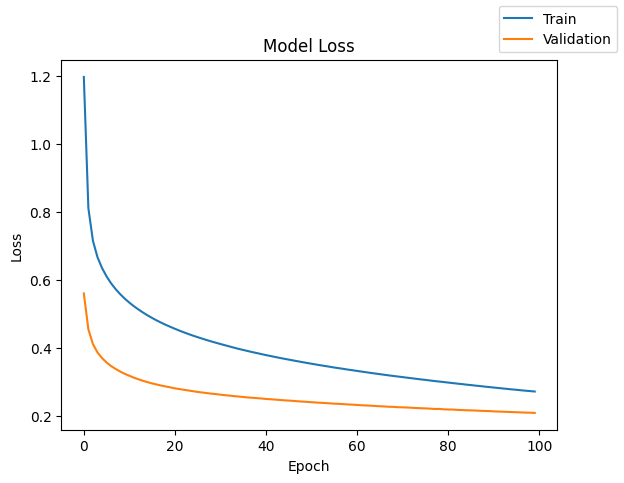

In [121]:
#plot model's loss
plot(history, 'loss')

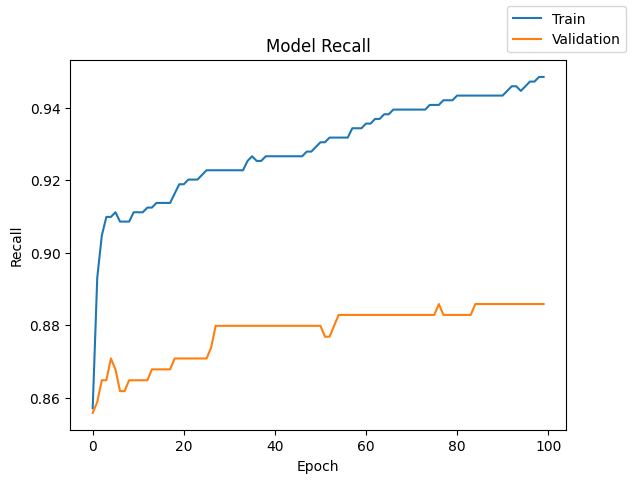

In [122]:
#plot model's recall
plot(history, 'recall')

* Validation and training loss fall dramatically until about the 9th epoch, then slow down
* Validation loss is consistently lower than training loss
* For recall, validation increases greatly until around the 7th epoch, falls, then rises gradually before a flattening trend after the 30th epoch
* Meantime, training recall increases dramatically until about the 7th epoch, then continues rising through the end
* There is a wide gap between the two

In [123]:
#add model to our results df
results.loc[11] = [
  2, #hidden layers
  [64, 128], #neurons/layer
  ["relu", "relu"], #activation function
  epochs, #epochs
  batch_size, #batch size
  "Adam", #optimizer
  [0.0001, "-"], # learning rate, momentum
  ["Xav", "Xav", "Xav"], #weight initializer
  ["L2", "L2", "Class weights"], #regularization
  history.history["loss"][-1], #train loss
  history.history["val_loss"][-1], #val loss
  history.history["recall"][-1], #train recall
  history.history["val_recall"][-1], #val recall
  round(end-start,2) #trt
  ]
results

# hidden layers # neurons - hidden layer  \
0                 1                       64   
1                 2                [64, 128]   
2                 2                 [64, 64]   
3                 2                [64, 128]   
4                 2                [64, 128]   
5                 2                [64, 128]   
6                 2                [64, 128]   
7                 2                [64, 128]   
8                 2                [64, 128]   
9                 2                [64, 128]   
10                2                [64, 128]   
11                2                [64, 128]   

   activation function - hidden layer   # epochs  batch size     optimizer  \
0                                 relu        50         100           SGD   
1                         [relu, relu]        50         100           SGD   
2                         [relu, tanh]        50         100           SGD   
3                         [relu, relu]        50         100  SGD with mom   
4                         [relu, relu]        50         100  SGD with mom   
5                         [relu, relu]        50         100          Adam   
6                         [relu, relu]       100         100          Adam   
7                         [relu, relu]       100         100          Adam   
8                         [relu, relu]       100         100          Adam   
9                         [relu, relu]       100         100          Adam   
10                        [relu, relu]       100         100          Adam   
11                        [relu, relu]       100         100          Adam   

   learning rate, momentum weight initializer  \
0               [0.001, -]                  -   
1               [0.001, -]    [Xav, Xav, Xav]   
2               [0.001, -]    [Xav, Xav, Xav]   
3             [0.001, 0.9]    [Xav, Xav, Xav]   
4            [0.0001, 0.9]    [Xav, Xav, Xav]   
5               [0.001, -]    [Xav, Xav, Xav]   
6              [0.0001, -]    [Xav, Xav, Xav]   
7              [0.0001, -]    [Xav, Xav, Xav]   
8              [0.0001, -]    [Xav, Xav, Xav]   
9              [0.0001, -]    [Xav, Xav, Xav]   
10             [0.0001, -]      [He, He, Xav]   
11             [0.0001, -]    [Xav, Xav, Xav]   

                                regularization  train loss  validation loss  \
0                                            -    0.051616         0.066721   
1                                            -    0.043756         0.060069   
2                                            -    0.042877         0.054599   
3                                            -    0.019997         0.058326   
4                                            -    0.085880         0.092282   
5                                            -    0.007018         0.099477   
6                                            -    0.022984         0.056675   
7                                Dropout (0.2)    0.037275         0.052004   
8                  [Batch norm, Dropout (0.2)]    0.033385         0.048827   
9   [Batch norm, Dropout (0.2), Class weights]    0.228398         0.102819   
10  [Batch norm, Dropout (0.2), Class weights]    0.273939         0.112600   
11                     [L2, L2, Class weights]    0.272880         0.210015   

    train recall  validation recall  time (secs)  
0       0.832690           0.804805        14.10  
1       0.858430           0.840841        14.28  
2       0.848134           0.828829        14.53  
3       0.925354           0.870871        16.27  
4       0.646075           0.672673        15.04  
5       0.963964           0.867868        15.84  
6       0.909910           0.861862        31.01  
7       0.870013           0.873874        31.34  
8       0.885457           0.873874        35.42  
9       0.935650           0.888889        34.58  
10      0.921493           0.885886        34.35  
11      0.948520           0.885886        31.58

In [194]:
model_11_train_perf = model_performance_classification(model11, X_train, y_train)
model_11_train_perf


438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step


Accuracy    Recall  Precision  F1 Score
0  0.988286  0.973811   0.923886  0.947251

In [195]:
model_11_val_perf = model_performance_classification(model11, X_val, y_val)
model_11_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


Accuracy    Recall  Precision  F1 Score
0  0.982333  0.936943   0.902966  0.919162

# Model 12

Plan:

* Early stopping to find optimal version of the best model
* Adjusting class weights for imbalanced class distribution
* Two hidden layers -- 64, 128
* activation function -- relu, relu
* Adam optimizer
*Reduced learning rate of 1e-4 and increase epochs to 800 for early stopping
* Dropout of 0.2
* Batch normalization

In [125]:
#calculate class weights
cw = (y_train.shape[0]) / np.bincount(y_train)

#create a dictionary with class indices and their weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: np.float64(1.0587612493382743), 1: np.float64(18.01801801801802)}

In [126]:
#setting the dropout rate
dropout_rate = 0.2

In [127]:
#build Model 9 again

#introduce early stopping callback -- so we get the best version of our best model
es= keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='min', restore_best_weights= True)

#clear keras session
tf.keras.backend.clear_session()

#initialize neural network
model12 = Sequential()

#hidden layer
model12.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))

#batch normalization
model12.add(BatchNormalization())

#dropout layer
model12.add(Dropout(dropout_rate))

#hidden layer
model12.add(Dense(128, activation = 'relu'))

#output layer -- one node for binary target variable, and sigmoid for a binary classification problem
model12.add(Dense(1, activation = 'sigmoid'))

In [128]:
#looking at model details
model12.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,329 (44.25 KB)

 Trainable params: 11,201 (43.75 KB)

 Non-trainable params: 128 (512.00 B)

In [129]:
#defining optimizer
lr = 1e-4
optimizer = keras.optimizers.Adam(learning_rate = lr)

#compile model, set optimizer and loss function -- binary crossentropy for binary target variable, with recall as metric
model12.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['recall'])

In [131]:
#defining batch size and epochs
batch_size = 100
epochs = 800 #high count combined with early stopping will help find best version of model

#fitting model
start = time.time()
history = model12.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = batch_size, epochs = epochs, callbacks = [es], verbose = 2)
end=time.time()

Epoch 1/800
140/140 - 2s - 11ms/step - loss: 0.3352 - recall: 0.2407 - val_loss: 0.2133 - val_recall: 0.3574
Epoch 2/800
140/140 - 0s - 2ms/step - loss: 0.1789 - recall: 0.2831 - val_loss: 0.1420 - val_recall: 0.4054
Epoch 3/800
140/140 - 0s - 2ms/step - loss: 0.1352 - recall: 0.3861 - val_loss: 0.1141 - val_recall: 0.4775
Epoch 4/800
140/140 - 0s - 3ms/step - loss: 0.1142 - recall: 0.4582 - val_loss: 0.0992 - val_recall: 0.5646
Epoch 5/800
140/140 - 0s - 3ms/step - loss: 0.1010 - recall: 0.5341 - val_loss: 0.0894 - val_recall: 0.6186
Epoch 6/800
140/140 - 0s - 3ms/step - loss: 0.0946 - recall: 0.5598 - val_loss: 0.0826 - val_recall: 0.6667
Epoch 7/800
140/140 - 1s - 4ms/step - loss: 0.0854 - recall: 0.6088 - val_loss: 0.0778 - val_recall: 0.7057
Epoch 8/800
140/140 - 0s - 3ms/step - loss: 0.0808 - recall: 0.6499 - val_loss: 0.0740 - val_recall: 0.7447
Epoch 9/800
140/140 - 0s - 2ms/step - loss: 0.0761 - recall: 0.6641 - val_loss: 0.0706 - val_recall: 0.7568
Epoch 10/800
140/140 - 0s -

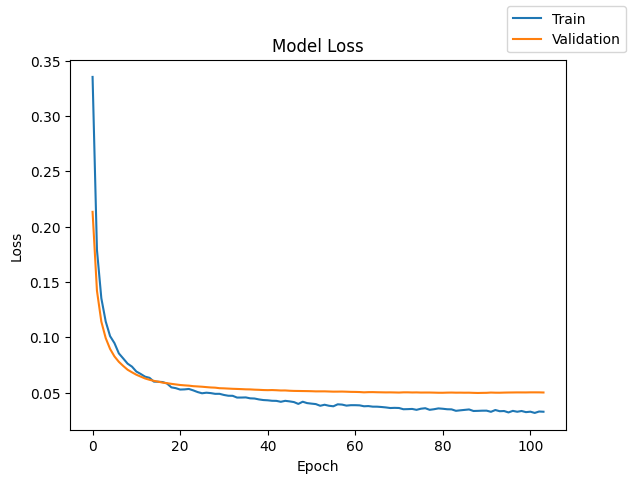

In [132]:
#plot model's loss
plot(history, 'loss')

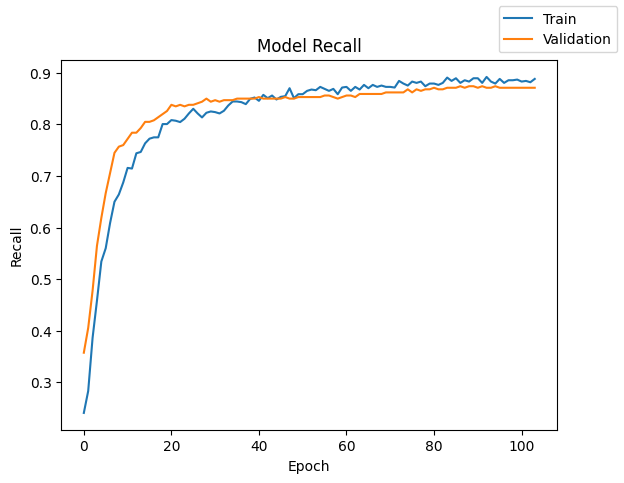

In [133]:
#plot model's recall
plot(history, 'recall')

In [134]:
#add model to our results df
results.loc[12] = [
  2, #hidden layers
  [64, 128], #neurons/layer
  ["relu", "relu"], #activation function
  epochs, #epochs
  batch_size, #batch size
  "Adam", #optimizer
  [0.0001, "-"], # learning rate, momentum
  ["Xav", "Xav", "Xav"], #weight initializer
  ["Batch norm", "Dropout (0.2)", "Class weights"], #regularization
  history.history["loss"][-1], #train loss
  history.history["val_loss"][-1], #val loss
  history.history["recall"][-1], #train recall
  history.history["val_recall"][-1], #val recall
  round(end-start,2) #trt
  ]
results

# hidden layers # neurons - hidden layer  \
0                 1                       64   
1                 2                [64, 128]   
2                 2                 [64, 64]   
3                 2                [64, 128]   
4                 2                [64, 128]   
5                 2                [64, 128]   
6                 2                [64, 128]   
7                 2                [64, 128]   
8                 2                [64, 128]   
9                 2                [64, 128]   
10                2                [64, 128]   
11                2                [64, 128]   
12                2                [64, 128]   

   activation function - hidden layer   # epochs  batch size     optimizer  \
0                                 relu        50         100           SGD   
1                         [relu, relu]        50         100           SGD   
2                         [relu, tanh]        50         100           SGD   
3                         [relu, relu]        50         100  SGD with mom   
4                         [relu, relu]        50         100  SGD with mom   
5                         [relu, relu]        50         100          Adam   
6                         [relu, relu]       100         100          Adam   
7                         [relu, relu]       100         100          Adam   
8                         [relu, relu]       100         100          Adam   
9                         [relu, relu]       100         100          Adam   
10                        [relu, relu]       100         100          Adam   
11                        [relu, relu]       100         100          Adam   
12                        [relu, relu]       800         100          Adam   

   learning rate, momentum weight initializer  \
0               [0.001, -]                  -   
1               [0.001, -]    [Xav, Xav, Xav]   
2               [0.001, -]    [Xav, Xav, Xav]   
3             [0.001, 0.9]    [Xav, Xav, Xav]   
4            [0.0001, 0.9]    [Xav, Xav, Xav]   
5               [0.001, -]    [Xav, Xav, Xav]   
6              [0.0001, -]    [Xav, Xav, Xav]   
7              [0.0001, -]    [Xav, Xav, Xav]   
8              [0.0001, -]    [Xav, Xav, Xav]   
9              [0.0001, -]    [Xav, Xav, Xav]   
10             [0.0001, -]      [He, He, Xav]   
11             [0.0001, -]    [Xav, Xav, Xav]   
12             [0.0001, -]    [Xav, Xav, Xav]   

                                regularization  train loss  validation loss  \
0                                            -    0.051616         0.066721   
1                                            -    0.043756         0.060069   
2                                            -    0.042877         0.054599   
3                                            -    0.019997         0.058326   
4                                            -    0.085880         0.092282   
5                                            -    0.007018         0.099477   
6                                            -    0.022984         0.056675   
7                                Dropout (0.2)    0.037275         0.052004   
8                  [Batch norm, Dropout (0.2)]    0.033385         0.048827   
9   [Batch norm, Dropout (0.2), Class weights]    0.228398         0.102819   
10  [Batch norm, Dropout (0.2), Class weights]    0.273939         0.112600   
11                     [L2, L2, Class weights]    0.272880         0.210015   
12  [Batch norm, Dropout (0.2), Class weights]    0.032637         0.050026   

    train recall  validation recall  time (secs)  
0       0.832690           0.804805        14.10  
1       0.858430           0.840841        14.28  
2       0.848134           0.828829        14.53  
3       0.925354           0.870871        16.27  
4       0.646075           0.672673        15.04  
5       0.963964           0.867868        15.84  
6       0.909910           0.861862        31.01  
7       0.870013           0.873874 

In [196]:
model_12_train_perf = model_performance_classification(model12, X_train, y_train)
model_12_train_perf


438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step


Accuracy    Recall  Precision  F1 Score
0     0.994  0.950186   0.992153  0.970114

In [197]:
model_12_val_perf = model_performance_classification(model12, X_val, y_val)
model_12_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step


Accuracy    Recall  Precision  F1 Score
0  0.992167  0.936496   0.987872  0.960572

# **Model Performance Comparison and Final Model Selection**

Now, in order to select the final model, we will compare the performances of all the models for the training and validation sets.

In [136]:
results

# hidden layers # neurons - hidden layer  \
0                 1                       64   
1                 2                [64, 128]   
2                 2                 [64, 64]   
3                 2                [64, 128]   
4                 2                [64, 128]   
5                 2                [64, 128]   
6                 2                [64, 128]   
7                 2                [64, 128]   
8                 2                [64, 128]   
9                 2                [64, 128]   
10                2                [64, 128]   
11                2                [64, 128]   
12                2                [64, 128]   

   activation function - hidden layer   # epochs  batch size     optimizer  \
0                                 relu        50         100           SGD   
1                         [relu, relu]        50         100           SGD   
2                         [relu, tanh]        50         100           SGD   
3                         [relu, relu]        50         100  SGD with mom   
4                         [relu, relu]        50         100  SGD with mom   
5                         [relu, relu]        50         100          Adam   
6                         [relu, relu]       100         100          Adam   
7                         [relu, relu]       100         100          Adam   
8                         [relu, relu]       100         100          Adam   
9                         [relu, relu]       100         100          Adam   
10                        [relu, relu]       100         100          Adam   
11                        [relu, relu]       100         100          Adam   
12                        [relu, relu]       800         100          Adam   

   learning rate, momentum weight initializer  \
0               [0.001, -]                  -   
1               [0.001, -]    [Xav, Xav, Xav]   
2               [0.001, -]    [Xav, Xav, Xav]   
3             [0.001, 0.9]    [Xav, Xav, Xav]   
4            [0.0001, 0.9]    [Xav, Xav, Xav]   
5               [0.001, -]    [Xav, Xav, Xav]   
6              [0.0001, -]    [Xav, Xav, Xav]   
7              [0.0001, -]    [Xav, Xav, Xav]   
8              [0.0001, -]    [Xav, Xav, Xav]   
9              [0.0001, -]    [Xav, Xav, Xav]   
10             [0.0001, -]      [He, He, Xav]   
11             [0.0001, -]    [Xav, Xav, Xav]   
12             [0.0001, -]    [Xav, Xav, Xav]   

                                regularization  train loss  validation loss  \
0                                            -    0.051616         0.066721   
1                                            -    0.043756         0.060069   
2                                            -    0.042877         0.054599   
3                                            -    0.019997         0.058326   
4                                            -    0.085880         0.092282   
5                                            -    0.007018         0.099477   
6                                            -    0.022984         0.056675   
7                                Dropout (0.2)    0.037275         0.052004   
8                  [Batch norm, Dropout (0.2)]    0.033385         0.048827   
9   [Batch norm, Dropout (0.2), Class weights]    0.228398         0.102819   
10  [Batch norm, Dropout (0.2), Class weights]    0.273939         0.112600   
11                     [L2, L2, Class weights]    0.272880         0.210015   
12  [Batch norm, Dropout (0.2), Class weights]    0.032637         0.050026   

    train recall  validation recall  time (secs)  
0       0.832690           0.804805        14.10  
1       0.858430           0.840841        14.28  
2       0.848134           0.828829        14.53  
3       0.925354           0.870871        16.27  
4       0.646075           0.672673        15.04  
5       0.963964           0.867868        15.84  
6       0.909910           0.861862        31.01  
7       0.870013           0.873874 

* Validation loss score for Model 8 is the lowest of 0.04 followed by model 12 of 0.05
* Test loss score is better for model 12 is 0.032 followed by model 8 of 0.33
Since the dataset is an imbalanced dataset we will look at f1 score as well

In [217]:
models_train_comp_df = pd.concat(
    [
      model_0_train_perf.T,
      model_1_train_perf.T,
      model_2_train_perf.T,
      model_3_train_perf.T,
      model_4_train_perf.T,
      model_5_train_perf.T,
      model_6_train_perf.T,
      model_7_train_perf.T,
      model_8_train_perf.T,
      model_9_train_perf.T,
      model_10_train_perf.T,
      model_11_train_perf.T,
      model_12_train_perf.T

    ], axis=1 # Concatenate horizontally
)
models_train_comp_df.columns = [
    "Model 0",
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6",
    "Model 7",
    "Model 8",
    "Model 9",
    "Model 10",
    "Model 11",
    "Model 12"
]
print("Train set performance comparison:")
models_train_comp_df

Train set performance comparison:


Model 0   Model 1   Model 2   Model 3   Model 4   Model 5  \
Accuracy   0.989643  0.991357  0.991214  0.995643  0.978571  0.997786   
Recall     0.916383  0.929405  0.926301  0.961958  0.822092  0.980657   
Precision  0.983115  0.987085  0.989027  0.996390  0.966075  0.998200   
F1 Score   0.946958  0.956197  0.955241  0.978475  0.879351  0.989251   

            Model 6   Model 7   Model 8   Model 9  Model 10  Model 11  \
Accuracy   0.994786  0.994000  0.994071  0.986929  0.985571  0.988286   
Recall     0.956053  0.951397  0.952041  0.962796  0.962683  0.973811   
Precision  0.993940  0.990849  0.990895  0.920772  0.911299  0.923886   
F1 Score   0.974143  0.970190  0.970564  0.940634  0.935249  0.947251   

           Model 12  
Accuracy   0.994000  
Recall     0.950186  
Precision  0.992153  
F1 Score   0.970114

In [222]:
models_val_comp_df = pd.concat(
    [
      model_0_val_perf.T,
      model_1_val_perf.T,
      model_2_val_perf.T,
      model_3_val_perf.T,
      model_4_val_perf.T,
      model_5_val_perf.T,
      model_6_val_perf.T,
      model_7_val_perf.T,
      model_8_val_perf.T,
      model_9_val_perf.T,
      model_10_val_perf.T,
      model_11_val_perf.T,
      model_12_val_perf.T

    ], axis=1 # Concatenate horizontally
)
models_val_comp_df.columns = [
    "Model 0",
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6",
    "Model 7",
    "Model 8",
    "Model 9",
    "Model 10",
    "Model 11",
    "Model 12"
]
print("Validation set performance comparison:")
models_val_comp_df

Validation set performance comparison:


Model 0   Model 1   Model 2   Model 3   Model 4   Model 5  \
Accuracy   0.987500  0.990000  0.989667  0.990833  0.978833  0.992000   
Recall     0.901520  0.919803  0.913973  0.934377  0.834748  0.933581   
Precision  0.976335  0.983166  0.986120  0.976359  0.953345  0.989319   
F1 Score   0.935333  0.948977  0.946789  0.954273  0.884007  0.959551   

            Model 6   Model 7   Model 8   Model 9  Model 10  Model 11  \
Accuracy   0.990667  0.991667  0.991500  0.981500  0.982500  0.982333   
Recall     0.930049  0.936231  0.936143  0.937915  0.937032  0.936943   
Precision  0.979132  0.982939  0.981316  0.896714  0.904089  0.902966   
F1 Score   0.953093  0.958244  0.957472  0.916140  0.919816  0.919162   

           Model 12  
Accuracy   0.992167  
Recall     0.936496  
Precision  0.987872  
F1 Score   0.960572

In [223]:
models_train_comp_df.loc["F1 Score"] - models_val_comp_df.loc["F1 Score"]

Model 0     0.011625
Model 1     0.007220
Model 2     0.008452
Model 3     0.024202
Model 4    -0.004657
Model 5     0.029699
Model 6     0.021050
Model 7     0.011946
Model 8     0.013091
Model 9     0.024494
Model 10    0.015433
Model 11    0.028089
Model 12    0.009542
Name: F1 Score, dtype: float64

* Lowest f1 score is for Model 12 hence we will pick model 12 as our model

Now, let's check the performance of the final model on the test set.

In [230]:
y_train_pred = model12.predict(X_train)
cr_train = classification_report(y_train, y_train_pred > 0.5)
print(cr_train)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13223
           1       0.99      0.90      0.94       777

    accuracy                           0.99     14000
   macro avg       0.99      0.95      0.97     14000
weighted avg       0.99      0.99      0.99     14000



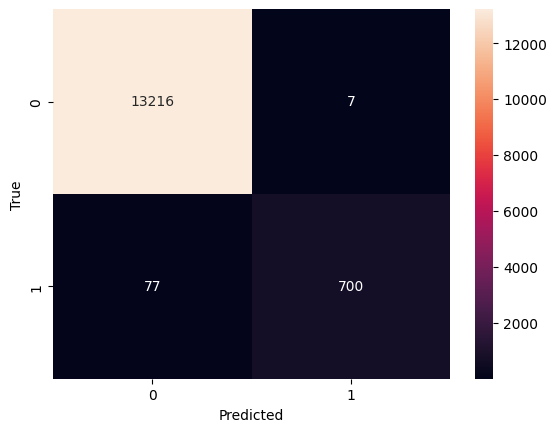

In [231]:
#confusion matrix for training set
cm_train = confusion_matrix(y_train, y_train_pred > 0.5)
sns.heatmap(cm_train, annot = True, fmt = '' )
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

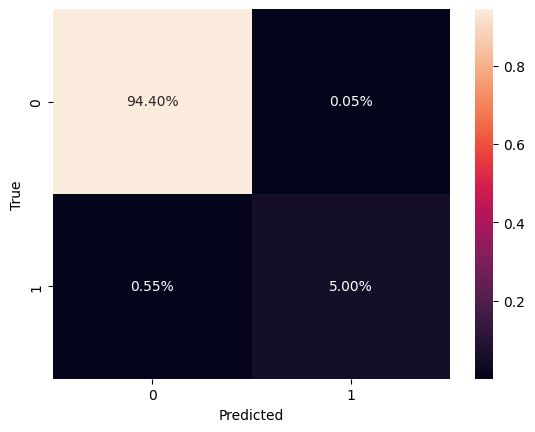

In [232]:
#percentages confusion matrix
sns.heatmap(cm_train/np.sum(cm_train), annot=True, fmt = '.2%')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [234]:
#checking model 12's metrics on the validation set
y_val_pred = model12.predict(X_val)
cr_val = classification_report(y_val, y_val_pred > 0.5)
print(cr_val)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5667
           1       0.98      0.87      0.93       333

    accuracy                           0.99      6000
   macro avg       0.99      0.94      0.96      6000
weighted avg       0.99      0.99      0.99      6000



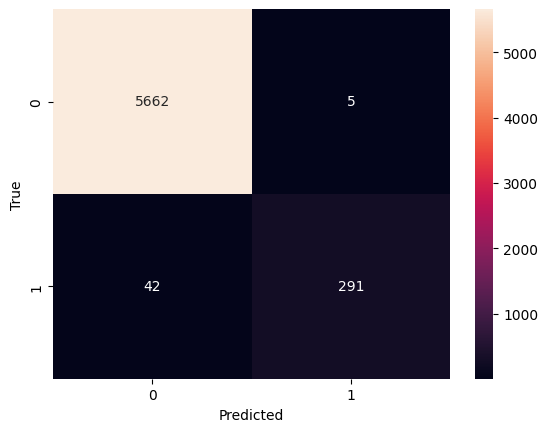

In [235]:
#confusion matrix for validation set
cm_val = confusion_matrix(y_val, y_val_pred > 0.5)
sns.heatmap(cm_val, annot = True, fmt = '' )
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


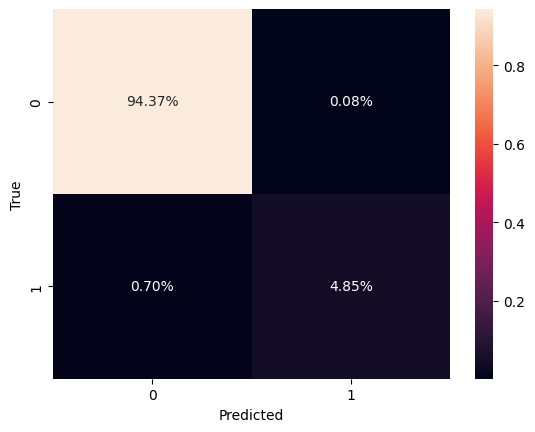

In [236]:
#percentages confusion matrix
sns.heatmap(cm_val/np.sum(cm_val), annot=True, fmt = '.2%')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [237]:
score = model12.evaluate(X_test, y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0524 - recall: 0.8279  


In [238]:
#checking model 12's metrics on the test set
y_test_pred = model12.predict(X_test)
cr_test = classification_report(y_test, y_test_pred > 0.5)
print(cr_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4718
           1       0.98      0.86      0.92       282

    accuracy                           0.99      5000
   macro avg       0.99      0.93      0.96      5000
weighted avg       0.99      0.99      0.99      5000



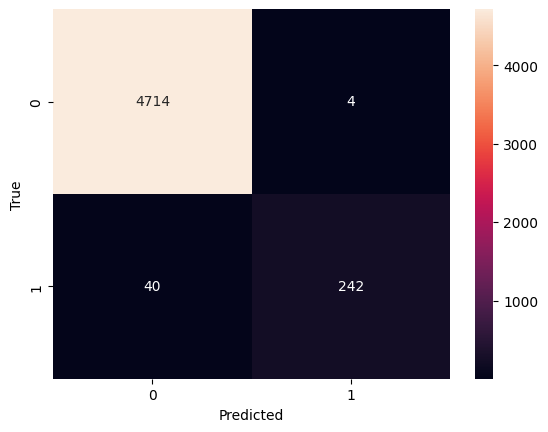

In [240]:
#confusion matrix for test set
cm_test = confusion_matrix(y_test, y_test_pred > 0.5)
sns.heatmap(cm_test, annot=True, fmt = '')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


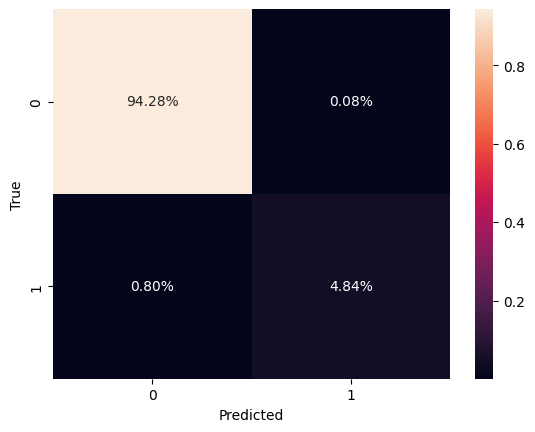

In [241]:
#percentages confusion matrix
sns.heatmap(cm_test/np.sum(cm_test), annot=True, fmt = '.2%')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [229]:
best_model = model12
best_model_test_perf = model_performance_classification(best_model,X_test,y_test)
best_model_test_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step


Accuracy    Recall  Precision  F1 Score
0    0.9912  0.928654   0.987663  0.956011

# **Actionable Insights and Recommendations**

Write down some insights and business recommendations based on your observations:

* Model 12, our final model, achieved a loss score of 0.0523 and a recall score of 0.8279 on the unseen test set
* The loss is a big improvement from Model 9 (0.1026), which is an early version of Model 12, and is very close to Model 12's loss score on the validation set (0.0500)
* The recall score is a bit lower than Model 12's validation recall score (0.8708)
* The classification report shows Model 12 was basically perfect at identifying generators that would not fail, and 86% successful at identifying generators that would fail
* There is room for improvement in this model, given the difference between the test set recall score and the validation recall score. Further optimizations could be attempted on Model 12 -- including adding more hidden layers, adding different numbers of neurons to those layers, adding and removing Batch Normalization and Dropout layers, testing different Dropout levels, further reducing the learning rate and increasing the number of epochs, and re-introducing He initialization (which didn't seem to help much in Model 10, but perhaps it would be more effective on Model 12).
* L1 and L2 regularization could also be introduced; we never tried L1 regularization, so there is opportunity there.
* That said, Model 12 does a great job of minimizing the number of "false negative" generator failure predictions -- only 0.80% of cases the model predicted to not fail, ended up failing (where 0 is "no failure" and 1 is "failure")
* This means the number of cases resulting in costly replacements is very low
ReneWind should maintain an aggressive policy of inspections, since inspections are cheaper than replacements or repairs. In addition to inspecting any generators Model 12 predicts will fail, the company can do spot inspections on a percentage of the generators Model 12 predicts will not fail -- in an effort to catch some of the false negatives that do make it through -- since doing an extra inspection will ultimately be cheaper than doing a replacement, which is what the false negatives will ultimately result in
